In [83]:
import pandas as pd
import plotly as px
import numpy as np
import random
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


In [84]:
def calcola_media_annuale(df):
    return df['consumption'].mean()

In [85]:
def calcola_media_semestrale(df_final):
    periodi_semestrali = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-12-31'))
    ]
    media_semestrale = []
    for start, end in periodi_semestrali:
        media = df_final.loc[start:end].mean()
        media_semestrale.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_semestrale

In [86]:
def calcola_media_trimestrale(df):
    periodi_trimestrali = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-03-31')),
        (pd.Timestamp('2019-04-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-09-30')),
        (pd.Timestamp('2019-10-01'), pd.Timestamp('2019-12-31'))
    ]

    # Calcolare la media per ciascun periodo
    media_trimestrale = []
    for start, end in periodi_trimestrali:
        media = df.loc[start:end].mean()
        media_trimestrale.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_trimestrale

In [87]:
def calcola_media_mensile(df):
    periodi_mensili = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-01-31')),
        (pd.Timestamp('2019-02-01'), pd.Timestamp('2019-02-28')),
        (pd.Timestamp('2019-03-01'), pd.Timestamp('2019-03-31')),
        (pd.Timestamp('2019-04-01'), pd.Timestamp('2019-04-30')),
        (pd.Timestamp('2019-05-01'), pd.Timestamp('2019-05-31')),
        (pd.Timestamp('2019-06-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-07-31')),
        (pd.Timestamp('2019-08-01'), pd.Timestamp('2019-08-31')),
        (pd.Timestamp('2019-09-01'), pd.Timestamp('2019-09-30')),
        (pd.Timestamp('2019-10-01'), pd.Timestamp('2019-10-31')),
        (pd.Timestamp('2019-11-01'), pd.Timestamp('2019-11-30')),
        (pd.Timestamp('2019-12-01'), pd.Timestamp('2019-12-31'))
    ]

    # Calcolare la media per ciascun periodo
    media_mensile = []
    for start, end in periodi_mensili:
        media = df.loc[start:end].mean()
        media_mensile.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_mensile

In [88]:
def read_fixture(fixture: str, rule='T'):
    #Legge CSV
    df = pd.read_csv(f'./data/feed_{fixture}.MYD.csv', delimiter=' ', header=None, names=['date', fixture])
    df['date'] = pd.to_datetime(df['date'], unit='s')
    
    # Rinomina la colonna fixture in 'consumption'
    df.rename(columns={fixture: 'consumption'}, inplace=True)
    df.set_index('date', inplace=True)
    
    # Resample il DataFrame usando la frequenza specificata (minutale 'T')
    df_minutely = df.resample(rule).sum()
    
    # Ora raggruppiamo i dati minutali in giornate
    df_daily = df_minutely.resample('D').sum()

    # Creare un DataFrame vuoto con il range di date specificato
    date_rng = pd.date_range(start='2019-01-01', end='2019-12-31' , freq='D')
    df_final = pd.DataFrame(date_rng, columns=['date'])
    df_final.set_index('date', inplace=True)
    
    # Unire il DataFrame giornaliero con il DataFrame vuoto per assicurarsi che tutte le date siano presenti
    df_final = df_final.join(df_daily, how='left').fillna(0)
    
    return df_final

In [89]:
#CONTROLLO RICORRENZE DEI PATTERN

diz={'0': 125, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 1, 'CHMHLH4_S0': 1, 'CGMHLF3MPP_S0': 1, 'CHMHLG2LM_S0': 1, 'CHMHLH8_S2c': 1, 'CFMHLE5_S1a': 1, 'CHMHLH9_S2a': 2, 'CGMHLE5_S0': 1, 'CFMGLD3MPP_S2f': 1, 'CHMHLG5_S1a': 1, 'CHMHLH8_M1c': 1, 'CGMHLE3LMP_S0': 1, 'CHMHLH6_M1d': 1, 'CEMHLE4_S2a': 1, 'CDMGLD5_S1f': 1, 'CFMHLF5_S2a': 2, 'CFMHLF2MP_S0': 1, 'CDMGLD3PPL_S0': 1, 'CCMDLC3MMP_S2a': 1, 'CCMDLC1M_S0': 1, 'CDMFLC3PPL_P1c': 1, 'CFMHLF7_S2f': 1, 'CAMBLA2PP_P1a': 1, 'CEMGLD3MPP_S2f': 1, 'CDMFLC5_S1f': 1, 'CEMHLE8_S2f': 1, 'CDMGLD3PPM_S0': 1, 'CAMALA1M_S0': 3, 'CDMGLD4_S0': 2, 'CDMGLD3LPP_S0': 1, 'CDMGLD13_M1d': 1, 'CEMHLE3PLM_S0': 1, 'CHMHLH8_S1a': 1, 'CDMFLD2MP_S0': 1, 'CHMHLH8_S2a': 1, 'CCMDLC2MM_S0': 1, 'CFMHLE8_S0': 1, 'CCMDLC2MP_S0': 1, 'CCMDLC2PP_S0': 1, 'CCMDLC2LP_S0': 1, 'CHMHLH3MPP_S0': 1, 'CBMBLC2PL_P1a': 1, 'CCMCLD1M_S0': 1, 'CDMCLE3MMM_S0': 1, 'CEMELF7_S2d': 1, 'CDMCLD5_S1f': 2, 'CFMELH2MM_S0': 1, 'CBMBLB7_S1a': 1, 'CCMBLC3MMM_S2f': 1, 'CBMBLC2MP_S0': 2, 'CEMELG6_S0': 1, 'CFMELH5_S0': 1, 'CAMALA2PP_S0': 5, 'CEMDLF5_S2a': 1, 'CDMDLE7_S2c': 2, 'CEMELF5_M1f': 1, 'CHMHLH3PMP_S2f': 1, 'CBMALB5_M1c': 1, 'CDMDLE7_S2f': 1, 'CFMFLH6_S0': 1, 'CHMHLH9_M1b': 1, 'CHMGLH7_S2c': 1, 'CCMCLD7_S2c': 1, 'CCMCLD2MM_P1f': 1, 'CHMHLH6_S1a': 1, 'CCMBLC4_S0': 1, 'CDMCLD4_M1c': 1, 'CFMDLF6_S2f': 1, 'CCMBLC2PL_S0': 1, 'CDMCLE6_S2a': 1, 'CDMCLD3MPM_S0': 1, 'CEMDLE4_S2a': 1, 'CCMCLD4_S2a': 1, 'CCMCLD2MP_P1f': 1, 'CAMALA3PPP_S2a': 1, 'CDMCLE5_S1f': 1, 'CEMDLF4_S2f': 1, 'CDMCLD1L_S0': 1, 'CDMCLD4_S2f': 1, 'CHMHLH6_S2c': 2, 'CCMCLD9_S2c': 1, 'CBMBLB2PP_S0': 1, 'CGMFLH5_S1a': 1, 'CFMELG4_M1f': 1, 'CGMELG4_S2f': 1, 'CFMELG4_S2f': 1, 'CAMALA4_S2a': 2, 'CDMCLE1M_S0': 1, 'CHMFLH5_M1d': 1, 'CDMELG7_S1f': 1, 'CDMFLH7_M1b': 1, 'CDMFLH8_S1a': 1, 'CBMCLD4_S2a': 1, 'CCMDLF4_S2a': 1, 'CCMDLF9_S2c': 1, 'CBMCLD7_S1f': 1, 'CBMCLD8_S1a': 1, 'CFMHLH12_S2c': 1, 'CBMBLB4_S2f': 1, 'CEMFLH9_S2c': 1, 'CEMGLH8_M1c': 1, 'CHMHLH10_M1b': 1, 'CBMCLD7_S1a': 1, 'CCMDLF7_M1b': 1, 'CCMDLE4_S0': 1, 'CHMHLH11_M2d': 1, 'CBMBLC3MMM_P1c': 1, 'CEMFLH16_M1d': 1, 'CEMFLH11_S2c': 1, 'CBMCLD5_S1f': 1, 'CCMDLF2LM_S0': 1, 'CEMGLH11_S2d': 1, 'CCMCLE11_M2c': 1, 'CAMALA5_M1d': 1, 'CAMALA4_S0': 1, 'CDMELG8_S2a': 1, 'CEMELF1L_S0': 1, 'CAMBLB3MPP_S2a': 1, 'CEMFLG9_S1c': 1, 'CCMCLD2LM_S0': 1, 'CAMALA2MP_S0': 1, 'CHMHLH11_M1a': 1, 'CDMELF7_S1a': 1, 'CFMGLH4_S2a': 1, 'CDMDLE3PLP_S0': 1, 'CGMHLH13_S2d': 1, 'CCMDLD4_S2f': 1, 'CHMHLH11_S2a': 1, 'CEMELF2MP_P1f': 1, 'CDMDLE4_S2a': 1, 'CHMHLH10_S2c': 1, 'CCMCLD4_S2f': 1, 'CCMCLD8_S2c': 1, 'CCMDLD4_M1a': 1, 'CDMELF7_M1d': 1, 'CDMELF4_M1f': 1, 'CDMDLE5_S2c': 1, 'CAMALA5_S2a': 1, 'CCMDLD4_M1c': 1, 'CEMFLG6_S0': 1, 'CEMELF9_S1f': 1, 'CDMDLE7_M1b': 1, 'CFMGLH10_S1c': 1, 'CDMELF2PM_P1f': 1, 'CHMDLE6_M1d': 1, 'CHMHLH16_M1c': 1, 'CDMBLC5_S0': 1, 'CDMBLC1M_S0': 1, 'CCMBLB1P_S0': 1, 'CGMDLE4_S2f': 1, 'CDMBLC3PLP_S2a': 1, 'CFMDLD6_S2a': 1, 'CFMDLD10_M1e': 1, 'CCMBLB2PM_P1a': 1, 'CEMCLC4_P1c': 1, 'CHMFLH3LPP_P1c': 1, 'CDMBLB1M_S0': 1, 'CHMHLH2MP_S0': 1, 'CAMALA2MP_P1a': 1, 'CEMCLD4_S2a': 1, 'CHMHLH6_S2a': 1, 'CDMELF3MPM_S0': 1, 'CBMCLD5_S0': 1, 'CEMGLH10_S2b': 1, 'CDMELF5_S1a': 1, 'CBMCLC4_S2f': 1, 'CCMCLD3PPM_P1a': 1, 'CCMDLE2MM_S0': 1, 'CGMHLH4_S2f': 1, 'CBMCLC2PP_P1a': 1, 'CCMDLE5_S2c': 1, 'CGMHLH7_S2c': 1, 'CAMBLB3PPP_S0': 1, 'CCMCLD2MP_P1a': 1, 'CGMHLH10_M1d': 1, 'CEMGLH11_M1d': 1, 'CEMGLH6_M1a': 1, 'CDMELF2MM_S0': 1, 'CGMHLH8_S2a': 1, 'CCMDLE3PMP_S2f': 1, 'CHMHLH7_S1f': 2, 'CHMHLH8_S2f': 1, 'CFMHLH4_S2f': 1, 'CCMDLE6_S1a': 1, 'CHMHLH5_S0': 1, 'CGMHLH9_S1c': 1, 'CGMHLH8_M1a': 1, 'CEMFLH8_S2c': 1, 'CEMHLH4_S0': 1, 'CAMALA3MMP_P1c': 1, 'CBMELD2MM_S0': 1, 'CGMHLH6_M1c': 1, 'CDMHLH8_S1a': 1, 'CHMHLH4_S2a': 1, 'CBMFLE5_S0': 1, 'CHMHLH6_S1f': 1, 'CEMHLH3MPM_S2f': 1, 'CBMFLE3MPP_S2f': 1, 'CHMHLH10_S2d': 1, 'CHMHLH9_S1a': 1, 'CHMHLH5_S1a': 1, 'CCMHLG5_S1f': 1, 'CCMGLE3MPP_S0': 1, 'CCMHLG4_S0': 1, 'CCMHLG5_M1d': 1, 'CHMHLH8_M1d': 1, 'CAMCLC2PP_S0': 1, 'CBMDLC2PP_S0': 1, 'CEMHLH6_S0': 2, 'CBMFLE3LPP_S2f': 1, 'CCMHLG3LMP_S0': 1, 'CDMHLH4_S0': 1, 'CGMHLH6_S1a': 1, 'CFMHLH10_M1a': 1}

new_diz={}
for key,value in diz.items():
    if value in new_diz:#se lo trova 
        new_diz[value].append(key)
    else:
        new_diz[value]=[]
        new_diz[value].append(key)

for key,value in new_diz.items():
    print(f'{key}:\t{new_diz[key]}\n')


125:	['0']

2:	['CAMALA1P_S0', 'CHMHLH9_S2a', 'CFMHLF5_S2a', 'CDMGLD4_S0', 'CDMCLD5_S1f', 'CBMBLC2MP_S0', 'CDMDLE7_S2c', 'CHMHLH6_S2c', 'CAMALA4_S2a', 'CHMHLH7_S1f', 'CEMHLH6_S0']

1:	['CCMDLB3PMM_S2f', 'CHMHLH4_S0', 'CGMHLF3MPP_S0', 'CHMHLG2LM_S0', 'CHMHLH8_S2c', 'CFMHLE5_S1a', 'CGMHLE5_S0', 'CFMGLD3MPP_S2f', 'CHMHLG5_S1a', 'CHMHLH8_M1c', 'CGMHLE3LMP_S0', 'CHMHLH6_M1d', 'CEMHLE4_S2a', 'CDMGLD5_S1f', 'CFMHLF2MP_S0', 'CDMGLD3PPL_S0', 'CCMDLC3MMP_S2a', 'CCMDLC1M_S0', 'CDMFLC3PPL_P1c', 'CFMHLF7_S2f', 'CAMBLA2PP_P1a', 'CEMGLD3MPP_S2f', 'CDMFLC5_S1f', 'CEMHLE8_S2f', 'CDMGLD3PPM_S0', 'CDMGLD3LPP_S0', 'CDMGLD13_M1d', 'CEMHLE3PLM_S0', 'CHMHLH8_S1a', 'CDMFLD2MP_S0', 'CHMHLH8_S2a', 'CCMDLC2MM_S0', 'CFMHLE8_S0', 'CCMDLC2MP_S0', 'CCMDLC2PP_S0', 'CCMDLC2LP_S0', 'CHMHLH3MPP_S0', 'CBMBLC2PL_P1a', 'CCMCLD1M_S0', 'CDMCLE3MMM_S0', 'CEMELF7_S2d', 'CFMELH2MM_S0', 'CBMBLB7_S1a', 'CCMBLC3MMM_S2f', 'CEMELG6_S0', 'CFMELH5_S0', 'CEMDLF5_S2a', 'CEMELF5_M1f', 'CHMHLH3PMP_S2f', 'CBMALB5_M1c', 'CDMDLE7_S2f', 'CFMF

In [90]:
#TRASFORMA GLI ARRAY DI PATTERN IN ARRAY DA POTER USARE SU MATLAB PER GENERARE NUOVE SETTIMANE
# Inversione del dizionario diz_inverted = {v: k for k, v in diz_patterns.items()}
array_periodo=['CFMFLH6_S0', 'CHMHLH9_M1b', 'CAMALA1M_S0', 'CAMALA1M_S0', 'CDMDLE7_S2c', 'CHMGLH7_S2c', 'CCMCLD7_S2c','CCMCLD2MM_P1f', 'CAMALA2PP_S0', 'CHMHLH6_S1a', 'CCMBLC4_S0', 'CDMCLD4_M1c', 'CFMDLF6_S2f', 'CCMBLC2PL_S0','CDMCLE6_S2a', 'CDMCLD3MPM_S0', 'CEMDLE4_S2a', 'CCMCLD4_S2a', 'CCMCLD2MP_P1f', '0', '0','CAMALA3PPP_S2a', 'CDMCLE5_S1f', 'CEMDLF4_S2f', 'CDMCLD1L_S0', 'CDMCLD4_S2f', 'CHMHLH6_S2c', 'CCMCLD9_S2c']
array_periodo2=['CHMHLH16_M1c', 'CDMBLC5_S0', 'CDMBLC1M_S0', 'CCMBLB1P_S0', 'CGMDLE4_S2f', '0', '0','0', 'CDMBLC3PLP_S2a', '0', 'CFMDLD6_S2a', 'CFMDLD10_M1e', 'CCMBLB2PM_P1a', 'CEMCLC4_P1c','CHMFLH3LPP_P1c', '0', '0', 'CDMBLB1M_S0', '0', '0', 'CHMHLH2MP_S0','0', '0', '0', 'CAMALA2MP_P1a', 'CEMCLD4_S2a', 'CHMHLH6_S2a', 'CAMALA4_S2a']
array_periodo3=['CEMELF1L_S0', 'CAMBLB3MPP_S2a', 'CEMFLG9_S1c', 'CCMCLD2LM_S0', 'CAMALA2MP_S0', 'CHMHLH11_M1a', 'CDMELF7_S1a','CFMGLH4_S2a', 'CDMDLE3PLP_S0', 'CGMHLH13_S2d', 'CCMDLD4_S2f', 'CHMHLH11_S2a', 'CEMELF2MP_P1f', 'CHMHLH9_S2a','CDMDLE4_S2a', 'CHMHLH10_S2c', 'CCMCLD4_S2f', 'CCMCLD8_S2c', 'CAMALA2PP_S0', '0', 'CCMDLD4_M1a','CDMELF7_M1d', 'CDMELF4_M1f', 'CDMDLE5_S2c', 'CAMALA5_S2a', 'CCMDLD4_M1c', 'CEMFLG6_S0', 'CEMELF9_S1f']

diz_pattern={'0': 1, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 3, 'CHMHLH4_S0': 4, 'CGMHLF3MPP_S0': 5, 'CHMHLG2LM_S0': 6, 'CHMHLH8_S2c': 7, 'CFMHLE5_S1a': 8, 'CHMHLH9_S2a': 9, 'CGMHLE5_S0': 10, 'CFMGLD3MPP_S2f': 11, 'CHMHLG5_S1a': 12, 'CHMHLH8_M1c': 13, 'CGMHLE3LMP_S0': 14, 'CHMHLH6_M1d': 15, 'CEMHLE4_S2a': 16, 'CDMGLD5_S1f': 17, 'CFMHLF5_S2a': 18, 'CFMHLF2MP_S0': 19, 'CDMGLD3PPL_S0': 20, 'CCMDLC3MMP_S2a': 21, 'CCMDLC1M_S0': 22, 'CDMFLC3PPL_P1c': 23, 'CFMHLF7_S2f': 24, 'CAMBLA2PP_P1a': 25, 'CEMGLD3MPP_S2f': 26, 'CDMFLC5_S1f': 27, 'CEMHLE8_S2f': 28, 'CDMGLD3PPM_S0': 29, 'CAMALA1M_S0': 30, 'CDMGLD4_S0': 31, 'CDMGLD3LPP_S0': 32, 'CDMGLD13_M1d': 33, 'CEMHLE3PLM_S0': 34, 'CHMHLH8_S1a': 35, 'CDMFLD2MP_S0': 36, 'CHMHLH8_S2a': 37, 'CCMDLC2MM_S0': 38, 'CFMHLE8_S0': 39, 'CCMDLC2MP_S0': 40, 'CCMDLC2PP_S0': 41, 'CCMDLC2LP_S0': 42, 'CHMHLH3MPP_S0': 43, 'CBMBLC2PL_P1a': 44, 'CCMCLD1M_S0': 45, 'CDMCLE3MMM_S0': 46, 'CEMELF7_S2d': 47, 'CDMCLD5_S1f': 48, 'CFMELH2MM_S0': 49, 'CBMBLB7_S1a': 50, 'CCMBLC3MMM_S2f': 51, 'CBMBLC2MP_S0': 52, 'CEMELG6_S0': 53, 'CFMELH5_S0': 54, 'CAMALA2PP_S0': 55, 'CEMDLF5_S2a': 56, 'CDMDLE7_S2c': 57, 'CEMELF5_M1f': 58, 'CHMHLH3PMP_S2f': 59, 'CBMALB5_M1c': 60, 'CDMDLE7_S2f': 61, 'CFMFLH6_S0': 62, 'CHMHLH9_M1b': 63, 'CHMGLH7_S2c': 64, 'CCMCLD7_S2c': 65, 'CCMCLD2MM_P1f': 66, 'CHMHLH6_S1a': 67, 'CCMBLC4_S0': 68, 'CDMCLD4_M1c': 69, 'CFMDLF6_S2f': 70, 'CCMBLC2PL_S0': 71, 'CDMCLE6_S2a': 72, 'CDMCLD3MPM_S0': 73, 'CEMDLE4_S2a': 74, 'CCMCLD4_S2a': 75, 'CCMCLD2MP_P1f': 76, 'CAMALA3PPP_S2a': 77, 'CDMCLE5_S1f': 78, 'CEMDLF4_S2f': 79, 'CDMCLD1L_S0': 80, 'CDMCLD4_S2f': 81, 'CHMHLH6_S2c': 82, 'CCMCLD9_S2c': 83, 'CBMBLB2PP_S0': 84, 'CGMFLH5_S1a': 85, 'CFMELG4_M1f': 86, 'CGMELG4_S2f': 87, 'CFMELG4_S2f': 88, 'CAMALA4_S2a': 89, 'CDMCLE1M_S0': 90, 'CHMFLH5_M1d': 91, 'CDMELG7_S1f': 92, 'CDMFLH7_M1b': 93, 'CDMFLH8_S1a': 94, 'CBMCLD4_S2a': 95, 'CCMDLF4_S2a': 96, 'CCMDLF9_S2c': 97, 'CBMCLD7_S1f': 98, 'CBMCLD8_S1a': 99, 'CFMHLH12_S2c': 100, 'CBMBLB4_S2f': 101, 'CEMFLH9_S2c': 102, 'CEMGLH8_M1c': 103, 'CHMHLH10_M1b': 104, 'CBMCLD7_S1a': 105, 'CCMDLF7_M1b': 106, 'CCMDLE4_S0': 107, 'CHMHLH11_M2d': 108, 'CBMBLC3MMM_P1c': 109, 'CEMFLH16_M1d': 110, 'CEMFLH11_S2c': 111, 'CBMCLD5_S1f': 112, 'CCMDLF2LM_S0': 113, 'CEMGLH11_S2d': 114, 'CCMCLE11_M2c': 115, 'CAMALA5_M1d': 116, 'CAMALA4_S0': 117, 'CDMELG8_S2a': 118, 'CEMELF1L_S0': 119, 'CAMBLB3MPP_S2a': 120, 'CEMFLG9_S1c': 121, 'CCMCLD2LM_S0': 122, 'CAMALA2MP_S0': 123, 'CHMHLH11_M1a': 124, 'CDMELF7_S1a': 125, 'CFMGLH4_S2a': 126, 'CDMDLE3PLP_S0': 127, 'CGMHLH13_S2d': 128, 'CCMDLD4_S2f': 129, 'CHMHLH11_S2a': 130, 'CEMELF2MP_P1f': 131, 'CDMDLE4_S2a': 132, 'CHMHLH10_S2c': 133, 'CCMCLD4_S2f': 134, 'CCMCLD8_S2c': 135, 'CCMDLD4_M1a': 136, 'CDMELF7_M1d': 137, 'CDMELF4_M1f': 138, 'CDMDLE5_S2c': 139, 'CAMALA5_S2a': 140, 'CCMDLD4_M1c': 141, 'CEMFLG6_S0': 142, 'CEMELF9_S1f': 143, 'CDMDLE7_M1b': 144, 'CFMGLH10_S1c': 145, 'CDMELF2PM_P1f': 146, 'CHMDLE6_M1d': 147, 'CHMHLH16_M1c': 148, 'CDMBLC5_S0': 149, 'CDMBLC1M_S0': 150, 'CCMBLB1P_S0': 151, 'CGMDLE4_S2f': 152, 'CDMBLC3PLP_S2a': 153, 'CFMDLD6_S2a': 154, 'CFMDLD10_M1e': 155, 'CCMBLB2PM_P1a': 156, 'CEMCLC4_P1c': 157, 'CHMFLH3LPP_P1c': 158, 'CDMBLB1M_S0': 159, 'CHMHLH2MP_S0': 160, 'CAMALA2MP_P1a': 161, 'CEMCLD4_S2a': 162, 'CHMHLH6_S2a': 163, 'CDMELF3MPM_S0': 164, 'CBMCLD5_S0': 165, 'CEMGLH10_S2b': 166, 'CDMELF5_S1a': 167, 'CBMCLC4_S2f': 168, 'CCMCLD3PPM_P1a': 169, 'CCMDLE2MM_S0': 170, 'CGMHLH4_S2f': 171, 'CBMCLC2PP_P1a': 172, 'CCMDLE5_S2c': 173, 'CGMHLH7_S2c': 174, 'CAMBLB3PPP_S0': 175, 'CCMCLD2MP_P1a': 176, 'CGMHLH10_M1d': 177, 'CEMGLH11_M1d': 178, 'CEMGLH6_M1a': 179, 'CDMELF2MM_S0': 180, 'CGMHLH8_S2a': 181, 'CCMDLE3PMP_S2f': 182, 'CHMHLH7_S1f': 183, 'CHMHLH8_S2f': 184, 'CFMHLH4_S2f': 185, 'CCMDLE6_S1a': 186, 'CHMHLH5_S0': 187, 'CGMHLH9_S1c': 188, 'CGMHLH8_M1a': 189, 'CEMFLH8_S2c': 190, 'CEMHLH4_S0': 191, 'CAMALA3MMP_P1c': 192, 'CBMELD2MM_S0': 193, 'CGMHLH6_M1c': 194, 'CDMHLH8_S1a': 195, 'CHMHLH4_S2a': 196, 'CBMFLE5_S0': 197, 'CHMHLH6_S1f': 198, 'CEMHLH3MPM_S2f': 199, 'CBMFLE3MPP_S2f': 200, 'CHMHLH10_S2d': 201, 'CHMHLH9_S1a': 202, 'CHMHLH5_S1a': 203, 'CCMHLG5_S1f': 204, 'CCMGLE3MPP_S0': 205, 'CCMHLG4_S0': 206, 'CCMHLG5_M1d': 207, 'CHMHLH8_M1d': 208, 'CAMCLC2PP_S0': 209, 'CBMDLC2PP_S0': 210, 'CEMHLH6_S0': 211, 'CBMFLE3LPP_S2f': 212, 'CCMHLG3LMP_S0': 213, 'CDMHLH4_S0': 214, 'CGMHLH6_S1a': 215, 'CFMHLH10_M1a': 216}
array_new=[]
array_stati=[]
# 0 emissioni == stato 1%
# >0 emissioni == stato 2%
for elem in array_periodo3:
    if elem not in diz_pattern:
        print("errore")
        break
    else:
        array_new.append(diz_pattern[elem])
        if elem=='0':
            array_stati.append(1)
        else:
            array_stati.append(2)
print(array_new)
print(array_stati)

[119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 9, 132, 133, 134, 135, 55, 1, 136, 137, 138, 139, 140, 141, 142, 143]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]


In [91]:
#STESSA COSA DEL CODICE SOPRA MA CON LE DOCCIA
array_periodo=['0', 'CHMHLH3PMP_S0', 'CAMALA1P_S0', '0', 'CHMFLH2PP_S0', 'CAMALA3PPP_S0', 'CGMELH1M_S0','0', '0', 'CHMHLH1M_S0', '0', '0', 'CGMFLH1P_S0', '0','0', '0', '0', 'CHMHLH1M_S0', '0', '0', '0','CAMALA1P_S0', 'CHMGLH1M_S0', 'CHMHLH3MPP_S2a', '0', '0', 'CGMFLH1P_S0', '0']
array_periodo2=['CHMFLH2MP_P1f', '0', '0', 'CAMALA1P_S0', '0', '0', '0','0', 'CHMHLH1M_S0', 'CAMALA6_S0', 'CHMGLH2PM_S0', 'CHMHLH4_S2f', '0', 'CAMALA1P_S0','CHMFLG1P_S0', '0', '0', 'CHMHLH1P_S0', '0', '0', '0','0', '0', '0', '0', 'CHMELF2PM_S0', 'CHMDLE1M_S0', 'CAMALA2PP_S0']
array_periodo3=['CDMDLE1P_S0', '0', 'CHMHLH1M_S0', 'CDMELF1M_S0', '0', 'CHMHLH3PMP_S0', 'CBMBLB1P_S0','CHMHLH2PP_S0', 'CBMCLC1P_S0', 'CHMHLH5_S1a', '0', 'CHMHLH4_S0', '0', 'CHMHLH2PM_S0','CAMALA2PP_S0', 'CFMGLH2PP_S0', 'CBMCLC1P_S0', 'CBMBLC1M_S0', '0', '0', 'CCMCLD3PMP_S2a','CEMFLH3PMP_S2f', 'CFMGLH2PP_S0', 'CCMDLD1P_S0', 'CAMBLB6_S2c', 'CAMALB1M_S0', '0', '0']
#{'0': 1, 'CAMALA4_M1f': 7, 'CAMALA3PPP_S0': 5, 'CAMALA2PP_P1a': 51, 'CAMALA2PP_S0': 10, 'CAMALA1P_S0': 4, 'CAMALA4_S0': 94, 'CAMALA6_S0': 70, 'CAMALA5_S1a': 8, 'CAMALA6_S1f': 14, 'CAMALB1M_S0': 66, 'CAMALB3PPP_S0': 43, 'CAMBLB6_S2c': 65, 'CAMBLC1M_S0': 42, 'CBMBLB1P_S0': 56, 'CBMBLC1M_S0': 61, 'CBMCLC3PPP_S2a': 80, 'CBMCLC1P_S0': 57, 'CBMCLD1P_S0': 45, 'CBMCLE1P_S0': 46, 'CBMDLE1P_S0': 47, 'CBMELD1P_S0': 91, 'CCMALA2PM_S0': 3, 'CCMALA1P_S0': 2, 'CCMBLC2MP_S0': 29, 'CCMCLD3PMP_S2a': 62, 'CCMCLD1P_S0': 83, 'CCMDLD1P_S0': 64, 'CCMDLE2MP_S0': 76, 'CCMDLE2PP_S0': 79, 'CCMDLE1P_S0': 89, 'CCMDLF1M_S0': 32, 'CCMDLF1P_S0': 48, 'CCMFLE1P_S0': 92, 'CCMGLE2PP_S0': 99, 'CCMHLF1M_S0': 97, 'CCMHLF4_S0': 98, 'CDMDLE3PPP_S0': 87, 'CDMDLE1P_S0': 54, 'CDMELF1M_S0': 55, 'CDMELG2PP_S0': 85, 'CDMELH1P_S0': 52, 'CDMFLG2PP_P1a': 67, 'CDMFLG1P_S0': 68, 'CDMFLH1M_S0': 31, 'CDMFLH2PP_S0': 44, 'CDMFLH1P_S0': 37, 'CDMFLH4_S2a': 53, 'CDMHLG1P_S0': 100, 'CDMHLH2MP_S0': 101, 'CDMHLH1P_S0': 90, 'CEMFLH3PMP_S2f': 63, 'CEMFLH1P_S0': 77, 'CEMGLH1M_S0': 39, 'CEMHLF1P_S0': 13, 'CEMHLH2MP_P1f': 93, 'CEMHLH2MP_S0': 49, 'CEMHLH1M_S0': 102, 'CEMHLH3PPM_S0': 103, 'CEMHLH2PP_S0': 36, 'CFMDLG1M_S0': 21, 'CFMGLH2PP_S0': 60, 'CFMGLH1P_S0': 86, 'CFMHLH2MM_S0': 38, 'CFMHLH1M_S0': 96, 'CFMHLH2PP_S0': 34, 'CFMHLH1P_S0': 35, 'CFMHLH4_S0': 84, 'CGMELH1M_S0': 25, 'CGMFLH1P_S0': 26, 'CGMHLH3MMP_S0': 104, 'CGMHLH3MPM_S2f': 95, 'CGMHLH1M_S0': 81, 'CGMHLH2PM_S0': 78, 'CGMHLH2PP_S0': 33, 'CGMHLH1P_S0': 30, 'CHMDLE1M_S0': 75, 'CHMELF2PM_S0': 74, 'CHMFLG1P_S0': 73, 'CHMFLH2MP_P1f': 69, 'CHMFLH2PP_S0': 24, 'CHMFLH1P_S0': 20, 'CHMGLH1M_S0': 27, 'CHMGLH2PM_S0': 71, 'CHMGLH1P_S0': 17, 'CHMHLG1P_S0': 6, 'CHMHLH3MPP_S0': 105, 'CHMHLH3MPP_S2a': 28, 'CHMHLH2MP_P1a': 9, 'CHMHLH2MP_P1f': 88, 'CHMHLH2MP_S0': 40, 'CHMHLH1M_S0': 12, 'CHMHLH3PMM_S2a': 41, 'CHMHLH3PMP_S0': 23, 'CHMHLH2PM_S0': 18, 'CHMHLH3PPM_S0': 15, 'CHMHLH2PP_P1f': 22, 'CHMHLH2PP_S0': 19, 'CHMHLH1P_S0': 16, 'CHMHLH4_S0': 59, 'CHMHLH6_S0': 50, 'CHMHLH5_S1a': 58, 'CHMHLH6_S1a': 11, 'CHMHLH6_S2c': 82, 'CHMHLH4_S2f': 72}

diz_pattern={'0': 1, 'CAMALA4_M1f': 7, 'CAMALA3PPP_S0': 5, 'CAMALA2PP_P1a': 51, 'CAMALA2PP_S0': 10, 'CAMALA1P_S0': 4, 'CAMALA4_S0': 94, 'CAMALA6_S0': 70, 'CAMALA5_S1a': 8, 'CAMALA6_S1f': 14, 'CAMALB1M_S0': 66, 'CAMALB3PPP_S0': 43, 'CAMBLB6_S2c': 65, 'CAMBLC1M_S0': 42, 'CBMBLB1P_S0': 56, 'CBMBLC1M_S0': 61, 'CBMCLC3PPP_S2a': 80, 'CBMCLC1P_S0': 57, 'CBMCLD1P_S0': 45, 'CBMCLE1P_S0': 46, 'CBMDLE1P_S0': 47, 'CBMELD1P_S0': 91, 'CCMALA2PM_S0': 3, 'CCMALA1P_S0': 2, 'CCMBLC2MP_S0': 29, 'CCMCLD3PMP_S2a': 62, 'CCMCLD1P_S0': 83, 'CCMDLD1P_S0': 64, 'CCMDLE2MP_S0': 76, 'CCMDLE2PP_S0': 79, 'CCMDLE1P_S0': 89, 'CCMDLF1M_S0': 32, 'CCMDLF1P_S0': 48, 'CCMFLE1P_S0': 92, 'CCMGLE2PP_S0': 99, 'CCMHLF1M_S0': 97, 'CCMHLF4_S0': 98, 'CDMDLE3PPP_S0': 87, 'CDMDLE1P_S0': 54, 'CDMELF1M_S0': 55, 'CDMELG2PP_S0': 85, 'CDMELH1P_S0': 52, 'CDMFLG2PP_P1a': 67, 'CDMFLG1P_S0': 68, 'CDMFLH1M_S0': 31, 'CDMFLH2PP_S0': 44, 'CDMFLH1P_S0': 37, 'CDMFLH4_S2a': 53, 'CDMHLG1P_S0': 100, 'CDMHLH2MP_S0': 101, 'CDMHLH1P_S0': 90, 'CEMFLH3PMP_S2f': 63, 'CEMFLH1P_S0': 77, 'CEMGLH1M_S0': 39, 'CEMHLF1P_S0': 13, 'CEMHLH2MP_P1f': 93, 'CEMHLH2MP_S0': 49, 'CEMHLH1M_S0': 102, 'CEMHLH3PPM_S0': 103, 'CEMHLH2PP_S0': 36, 'CFMDLG1M_S0': 21, 'CFMGLH2PP_S0': 60, 'CFMGLH1P_S0': 86, 'CFMHLH2MM_S0': 38, 'CFMHLH1M_S0': 96, 'CFMHLH2PP_S0': 34, 'CFMHLH1P_S0': 35, 'CFMHLH4_S0': 84, 'CGMELH1M_S0': 25, 'CGMFLH1P_S0': 26, 'CGMHLH3MMP_S0': 104, 'CGMHLH3MPM_S2f': 95, 'CGMHLH1M_S0': 81, 'CGMHLH2PM_S0': 78, 'CGMHLH2PP_S0': 33, 'CGMHLH1P_S0': 30, 'CHMDLE1M_S0': 75, 'CHMELF2PM_S0': 74, 'CHMFLG1P_S0': 73, 'CHMFLH2MP_P1f': 69, 'CHMFLH2PP_S0': 24, 'CHMFLH1P_S0': 20, 'CHMGLH1M_S0': 27, 'CHMGLH2PM_S0': 71, 'CHMGLH1P_S0': 17, 'CHMHLG1P_S0': 6, 'CHMHLH3MPP_S0': 105, 'CHMHLH3MPP_S2a': 28, 'CHMHLH2MP_P1a': 9, 'CHMHLH2MP_P1f': 88, 'CHMHLH2MP_S0': 40, 'CHMHLH1M_S0': 12, 'CHMHLH3PMM_S2a': 41, 'CHMHLH3PMP_S0': 23, 'CHMHLH2PM_S0': 18, 'CHMHLH3PPM_S0': 15, 'CHMHLH2PP_P1f': 22, 'CHMHLH2PP_S0': 19, 'CHMHLH1P_S0': 16, 'CHMHLH4_S0': 59, 'CHMHLH6_S0': 50, 'CHMHLH5_S1a': 58, 'CHMHLH6_S1a': 11, 'CHMHLH6_S2c': 82, 'CHMHLH4_S2f': 72}
array_new=[]
array_stati=[]
# 0 emissioni == stato 1%
# >0 emissioni == stato 2%
for elem in array_periodo:
    if elem not in diz_pattern:
        print("errore")
        break
    else:
        array_new.append(diz_pattern[elem])
        if elem=='0':
            array_stati.append(1)
        else:
            array_stati.append(2)
print(array_new)
print(array_stati)

[1, 23, 4, 1, 24, 5, 25, 1, 1, 12, 1, 1, 26, 1, 1, 1, 1, 12, 1, 1, 1, 4, 27, 28, 1, 1, 26, 1]
[1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1]


In [92]:
#TRASFORMA SETTIMANA GENERATA IN PATTERN 
periodo2=[148, 149, 150, 151, 152, 1, 1, 1, 153, 1, 154, 155, 156, 157, 158, 1, 1, 159, 1, 1, 160, 1, 1, 1, 161, 162, 163, 89]
periodo1=[62, 63, 30, 30, 57, 64, 65, 66, 55, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 1, 1, 77, 78, 79, 80, 81, 82, 83]
periodo3=[119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 9, 132, 133, 134, 135, 55, 1, 136, 137, 138, 139, 140, 141, 142, 143]

seq2=[2, 3, 4, 5, 6, 1, 1, 1, 7, 1, 8, 9, 10, 11, 12, 1, 1, 13, 1, 1, 14, 1, 1, 1, 15, 16, 17, 18]
seq1=[2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 1, 20, 21, 22, 23, 24, 25, 26]
seq3=[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 9, 16, 17, 18, 19, 20, 1, 21, 22, 23, 24, 25, 26, 27, 28]

#settimane generate
#sett1=[15,25,26,5,26,25,13]
sett1=[2,23,25,18,20,20,11]
#sett2=[13    ,17  ,  18   ,  1 ,    4    , 1  ,   1]
sett2=[ 1  ,   3   ,  1    , 2  ,  15  ,  15  ,   1]
#sett3=[16   , 11   , 27  ,  25    ,16 ,   18  ,  17]
sett3=[6    , 8   , 13  ,  10  ,  26   , 13    , 6]

# Inversione del dizionario
diz_pattern={'0': 1, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 3, 'CHMHLH4_S0': 4, 'CGMHLF3MPP_S0': 5, 'CHMHLG2LM_S0': 6, 'CHMHLH8_S2c': 7, 'CFMHLE5_S1a': 8, 'CHMHLH9_S2a': 9, 'CGMHLE5_S0': 10, 'CFMGLD3MPP_S2f': 11, 'CHMHLG5_S1a': 12, 'CHMHLH8_M1c': 13, 'CGMHLE3LMP_S0': 14, 'CHMHLH6_M1d': 15, 'CEMHLE4_S2a': 16, 'CDMGLD5_S1f': 17, 'CFMHLF5_S2a': 18, 'CFMHLF2MP_S0': 19, 'CDMGLD3PPL_S0': 20, 'CCMDLC3MMP_S2a': 21, 'CCMDLC1M_S0': 22, 'CDMFLC3PPL_P1c': 23, 'CFMHLF7_S2f': 24, 'CAMBLA2PP_P1a': 25, 'CEMGLD3MPP_S2f': 26, 'CDMFLC5_S1f': 27, 'CEMHLE8_S2f': 28, 'CDMGLD3PPM_S0': 29, 'CAMALA1M_S0': 30, 'CDMGLD4_S0': 31, 'CDMGLD3LPP_S0': 32, 'CDMGLD13_M1d': 33, 'CEMHLE3PLM_S0': 34, 'CHMHLH8_S1a': 35, 'CDMFLD2MP_S0': 36, 'CHMHLH8_S2a': 37, 'CCMDLC2MM_S0': 38, 'CFMHLE8_S0': 39, 'CCMDLC2MP_S0': 40, 'CCMDLC2PP_S0': 41, 'CCMDLC2LP_S0': 42, 'CHMHLH3MPP_S0': 43, 'CBMBLC2PL_P1a': 44, 'CCMCLD1M_S0': 45, 'CDMCLE3MMM_S0': 46, 'CEMELF7_S2d': 47, 'CDMCLD5_S1f': 48, 'CFMELH2MM_S0': 49, 'CBMBLB7_S1a': 50, 'CCMBLC3MMM_S2f': 51, 'CBMBLC2MP_S0': 52, 'CEMELG6_S0': 53, 'CFMELH5_S0': 54, 'CAMALA2PP_S0': 55, 'CEMDLF5_S2a': 56, 'CDMDLE7_S2c': 57, 'CEMELF5_M1f': 58, 'CHMHLH3PMP_S2f': 59, 'CBMALB5_M1c': 60, 'CDMDLE7_S2f': 61, 'CFMFLH6_S0': 62, 'CHMHLH9_M1b': 63, 'CHMGLH7_S2c': 64, 'CCMCLD7_S2c': 65, 'CCMCLD2MM_P1f': 66, 'CHMHLH6_S1a': 67, 'CCMBLC4_S0': 68, 'CDMCLD4_M1c': 69, 'CFMDLF6_S2f': 70, 'CCMBLC2PL_S0': 71, 'CDMCLE6_S2a': 72, 'CDMCLD3MPM_S0': 73, 'CEMDLE4_S2a': 74, 'CCMCLD4_S2a': 75, 'CCMCLD2MP_P1f': 76, 'CAMALA3PPP_S2a': 77, 'CDMCLE5_S1f': 78, 'CEMDLF4_S2f': 79, 'CDMCLD1L_S0': 80, 'CDMCLD4_S2f': 81, 'CHMHLH6_S2c': 82, 'CCMCLD9_S2c': 83, 'CBMBLB2PP_S0': 84, 'CGMFLH5_S1a': 85, 'CFMELG4_M1f': 86, 'CGMELG4_S2f': 87, 'CFMELG4_S2f': 88, 'CAMALA4_S2a': 89, 'CDMCLE1M_S0': 90, 'CHMFLH5_M1d': 91, 'CDMELG7_S1f': 92, 'CDMFLH7_M1b': 93, 'CDMFLH8_S1a': 94, 'CBMCLD4_S2a': 95, 'CCMDLF4_S2a': 96, 'CCMDLF9_S2c': 97, 'CBMCLD7_S1f': 98, 'CBMCLD8_S1a': 99, 'CFMHLH12_S2c': 100, 'CBMBLB4_S2f': 101, 'CEMFLH9_S2c': 102, 'CEMGLH8_M1c': 103, 'CHMHLH10_M1b': 104, 'CBMCLD7_S1a': 105, 'CCMDLF7_M1b': 106, 'CCMDLE4_S0': 107, 'CHMHLH11_M2d': 108, 'CBMBLC3MMM_P1c': 109, 'CEMFLH16_M1d': 110, 'CEMFLH11_S2c': 111, 'CBMCLD5_S1f': 112, 'CCMDLF2LM_S0': 113, 'CEMGLH11_S2d': 114, 'CCMCLE11_M2c': 115, 'CAMALA5_M1d': 116, 'CAMALA4_S0': 117, 'CDMELG8_S2a': 118, 'CEMELF1L_S0': 119, 'CAMBLB3MPP_S2a': 120, 'CEMFLG9_S1c': 121, 'CCMCLD2LM_S0': 122, 'CAMALA2MP_S0': 123, 'CHMHLH11_M1a': 124, 'CDMELF7_S1a': 125, 'CFMGLH4_S2a': 126, 'CDMDLE3PLP_S0': 127, 'CGMHLH13_S2d': 128, 'CCMDLD4_S2f': 129, 'CHMHLH11_S2a': 130, 'CEMELF2MP_P1f': 131, 'CDMDLE4_S2a': 132, 'CHMHLH10_S2c': 133, 'CCMCLD4_S2f': 134, 'CCMCLD8_S2c': 135, 'CCMDLD4_M1a': 136, 'CDMELF7_M1d': 137, 'CDMELF4_M1f': 138, 'CDMDLE5_S2c': 139, 'CAMALA5_S2a': 140, 'CCMDLD4_M1c': 141, 'CEMFLG6_S0': 142, 'CEMELF9_S1f': 143, 'CDMDLE7_M1b': 144, 'CFMGLH10_S1c': 145, 'CDMELF2PM_P1f': 146, 'CHMDLE6_M1d': 147, 'CHMHLH16_M1c': 148, 'CDMBLC5_S0': 149, 'CDMBLC1M_S0': 150, 'CCMBLB1P_S0': 151, 'CGMDLE4_S2f': 152, 'CDMBLC3PLP_S2a': 153, 'CFMDLD6_S2a': 154, 'CFMDLD10_M1e': 155, 'CCMBLB2PM_P1a': 156, 'CEMCLC4_P1c': 157, 'CHMFLH3LPP_P1c': 158, 'CDMBLB1M_S0': 159, 'CHMHLH2MP_S0': 160, 'CAMALA2MP_P1a': 161, 'CEMCLD4_S2a': 162, 'CHMHLH6_S2a': 163, 'CDMELF3MPM_S0': 164, 'CBMCLD5_S0': 165, 'CEMGLH10_S2b': 166, 'CDMELF5_S1a': 167, 'CBMCLC4_S2f': 168, 'CCMCLD3PPM_P1a': 169, 'CCMDLE2MM_S0': 170, 'CGMHLH4_S2f': 171, 'CBMCLC2PP_P1a': 172, 'CCMDLE5_S2c': 173, 'CGMHLH7_S2c': 174, 'CAMBLB3PPP_S0': 175, 'CCMCLD2MP_P1a': 176, 'CGMHLH10_M1d': 177, 'CEMGLH11_M1d': 178, 'CEMGLH6_M1a': 179, 'CDMELF2MM_S0': 180, 'CGMHLH8_S2a': 181, 'CCMDLE3PMP_S2f': 182, 'CHMHLH7_S1f': 183, 'CHMHLH8_S2f': 184, 'CFMHLH4_S2f': 185, 'CCMDLE6_S1a': 186, 'CHMHLH5_S0': 187, 'CGMHLH9_S1c': 188, 'CGMHLH8_M1a': 189, 'CEMFLH8_S2c': 190, 'CEMHLH4_S0': 191, 'CAMALA3MMP_P1c': 192, 'CBMELD2MM_S0': 193, 'CGMHLH6_M1c': 194, 'CDMHLH8_S1a': 195, 'CHMHLH4_S2a': 196, 'CBMFLE5_S0': 197, 'CHMHLH6_S1f': 198, 'CEMHLH3MPM_S2f': 199, 'CBMFLE3MPP_S2f': 200, 'CHMHLH10_S2d': 201, 'CHMHLH9_S1a': 202, 'CHMHLH5_S1a': 203, 'CCMHLG5_S1f': 204, 'CCMGLE3MPP_S0': 205, 'CCMHLG4_S0': 206, 'CCMHLG5_M1d': 207, 'CHMHLH8_M1d': 208, 'CAMCLC2PP_S0': 209, 'CBMDLC2PP_S0': 210, 'CEMHLH6_S0': 211, 'CBMFLE3LPP_S2f': 212, 'CCMHLG3LMP_S0': 213, 'CDMHLH4_S0': 214, 'CGMHLH6_S1a': 215, 'CFMHLH10_M1a': 216}
diz_inverted = {v: k for k, v in diz_pattern.items()}

pattern1=[]
for elem in sett1:
    pattern1.append(diz_inverted[periodo1[seq1.index(elem)]])

pattern2=[]
for elem in sett2:
    pattern2.append(diz_inverted[periodo2[seq2.index(elem)]])

pattern3=[]
for elem in sett3:
    pattern3.append(diz_inverted[periodo3[seq3.index(elem)]])

print(pattern1)
print(pattern2)
print(pattern3)

['CFMFLH6_S0', 'CDMCLD1L_S0', 'CHMHLH6_S2c', 'CCMCLD4_S2a', 'CAMALA3PPP_S2a', 'CAMALA3PPP_S2a', 'CCMBLC4_S0']
['0', 'CDMBLC5_S0', '0', 'CHMHLH16_M1c', 'CAMALA2MP_P1a', 'CAMALA2MP_P1a', '0']
['CAMALA2MP_S0', 'CDMELF7_S1a', 'CCMDLD4_S2f', 'CFMGLH4_S2a', 'CCMDLD4_M1c', 'CCMDLD4_S2f', 'CAMALA2MP_S0']


In [93]:
#TRASFORMA SETTIMANA GENERATA IN PATTERN PER DOCCIA
periodo2=[69, 1, 1, 4, 1, 1, 1, 1, 12, 70, 71, 72, 1, 4, 73, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 74, 75, 10]
periodo1=[1, 23, 4, 1, 24, 5, 25, 1, 1, 12, 1, 1, 26, 1, 1, 1, 1, 12, 1, 1, 1, 4, 27, 28, 1, 1, 26, 1]
periodo3=[54, 1, 12, 55, 1, 23, 56, 19, 57, 58, 1, 59, 1, 18, 10, 60, 57, 61, 1, 1, 62, 63, 60, 64, 65, 66, 1, 1]

seq2=[2, 1, 1, 4, 1, 1, 1, 1, 3, 5, 6, 7, 1, 4, 8, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 11, 12, 10]
seq1=[1, 2, 4, 1, 3, 5, 6, 1, 1, 7, 1, 1, 8, 1, 1, 1, 1, 7, 1, 1, 1, 4, 9, 10, 1, 1, 8, 1]
seq3=[2, 1, 3, 4, 1, 5, 6, 7, 8, 9, 1, 10, 1, 11, 12, 13, 8, 14, 1, 1, 15, 16, 13, 17, 18, 19, 1, 1]

#settimane generate
sett1=[2,1,1,8,8,8,5]
#sett1=[8,4,1,1,1,3,6]
sett2=[8    ,4  ,  1   ,  1 ,    1    , 1  ,   1]
#sett2=[ 1  ,   1   ,  1    , 1  ,  1 ,  1 ,   11]
sett3=[15   , 8   , 15  ,  1    ,2 ,   5  ,  14]
#sett3=[1    , 1  , 19  ,  5  ,  4   , 13    , 3]

# Inversione del dizionario
diz_pattern={'0': 1, 'CAMALA4_M1f': 7, 'CAMALA3PPP_S0': 5, 'CAMALA2PP_P1a': 51, 'CAMALA2PP_S0': 10, 'CAMALA1P_S0': 4, 'CAMALA4_S0': 94, 'CAMALA6_S0': 70, 'CAMALA5_S1a': 8, 'CAMALA6_S1f': 14, 'CAMALB1M_S0': 66, 'CAMALB3PPP_S0': 43, 'CAMBLB6_S2c': 65, 'CAMBLC1M_S0': 42, 'CBMBLB1P_S0': 56, 'CBMBLC1M_S0': 61, 'CBMCLC3PPP_S2a': 80, 'CBMCLC1P_S0': 57, 'CBMCLD1P_S0': 45, 'CBMCLE1P_S0': 46, 'CBMDLE1P_S0': 47, 'CBMELD1P_S0': 91, 'CCMALA2PM_S0': 3, 'CCMALA1P_S0': 2, 'CCMBLC2MP_S0': 29, 'CCMCLD3PMP_S2a': 62, 'CCMCLD1P_S0': 83, 'CCMDLD1P_S0': 64, 'CCMDLE2MP_S0': 76, 'CCMDLE2PP_S0': 79, 'CCMDLE1P_S0': 89, 'CCMDLF1M_S0': 32, 'CCMDLF1P_S0': 48, 'CCMFLE1P_S0': 92, 'CCMGLE2PP_S0': 99, 'CCMHLF1M_S0': 97, 'CCMHLF4_S0': 98, 'CDMDLE3PPP_S0': 87, 'CDMDLE1P_S0': 54, 'CDMELF1M_S0': 55, 'CDMELG2PP_S0': 85, 'CDMELH1P_S0': 52, 'CDMFLG2PP_P1a': 67, 'CDMFLG1P_S0': 68, 'CDMFLH1M_S0': 31, 'CDMFLH2PP_S0': 44, 'CDMFLH1P_S0': 37, 'CDMFLH4_S2a': 53, 'CDMHLG1P_S0': 100, 'CDMHLH2MP_S0': 101, 'CDMHLH1P_S0': 90, 'CEMFLH3PMP_S2f': 63, 'CEMFLH1P_S0': 77, 'CEMGLH1M_S0': 39, 'CEMHLF1P_S0': 13, 'CEMHLH2MP_P1f': 93, 'CEMHLH2MP_S0': 49, 'CEMHLH1M_S0': 102, 'CEMHLH3PPM_S0': 103, 'CEMHLH2PP_S0': 36, 'CFMDLG1M_S0': 21, 'CFMGLH2PP_S0': 60, 'CFMGLH1P_S0': 86, 'CFMHLH2MM_S0': 38, 'CFMHLH1M_S0': 96, 'CFMHLH2PP_S0': 34, 'CFMHLH1P_S0': 35, 'CFMHLH4_S0': 84, 'CGMELH1M_S0': 25, 'CGMFLH1P_S0': 26, 'CGMHLH3MMP_S0': 104, 'CGMHLH3MPM_S2f': 95, 'CGMHLH1M_S0': 81, 'CGMHLH2PM_S0': 78, 'CGMHLH2PP_S0': 33, 'CGMHLH1P_S0': 30, 'CHMDLE1M_S0': 75, 'CHMELF2PM_S0': 74, 'CHMFLG1P_S0': 73, 'CHMFLH2MP_P1f': 69, 'CHMFLH2PP_S0': 24, 'CHMFLH1P_S0': 20, 'CHMGLH1M_S0': 27, 'CHMGLH2PM_S0': 71, 'CHMGLH1P_S0': 17, 'CHMHLG1P_S0': 6, 'CHMHLH3MPP_S0': 105, 'CHMHLH3MPP_S2a': 28, 'CHMHLH2MP_P1a': 9, 'CHMHLH2MP_P1f': 88, 'CHMHLH2MP_S0': 40, 'CHMHLH1M_S0': 12, 'CHMHLH3PMM_S2a': 41, 'CHMHLH3PMP_S0': 23, 'CHMHLH2PM_S0': 18, 'CHMHLH3PPM_S0': 15, 'CHMHLH2PP_P1f': 22, 'CHMHLH2PP_S0': 19, 'CHMHLH1P_S0': 16, 'CHMHLH4_S0': 59, 'CHMHLH6_S0': 50, 'CHMHLH5_S1a': 58, 'CHMHLH6_S1a': 11, 'CHMHLH6_S2c': 82, 'CHMHLH4_S2f': 72}
diz_inverted = {v: k for k, v in diz_pattern.items()}

pattern1=[]
for elem in sett1:
    pattern1.append(diz_inverted[periodo1[seq1.index(elem)]])

pattern2=[]
for elem in sett2:
    pattern2.append(diz_inverted[periodo2[seq2.index(elem)]])

pattern3=[]
for elem in sett3:
    pattern3.append(diz_inverted[periodo3[seq3.index(elem)]])

print(pattern1)
print(pattern2)
print(pattern3)

['CHMHLH3PMP_S0', '0', '0', 'CGMFLH1P_S0', 'CGMFLH1P_S0', 'CGMFLH1P_S0', 'CAMALA3PPP_S0']
['CHMFLG1P_S0', 'CAMALA1P_S0', '0', '0', '0', '0', '0']
['CCMCLD3PMP_S2a', 'CBMCLC1P_S0', 'CCMCLD3PMP_S2a', '0', 'CDMDLE1P_S0', 'CHMHLH3PMP_S0', 'CBMBLC1M_S0']


In [94]:
#OTTENIAMO IL VALORE DELLE EMISSIONI IN QUEL GIORNO IN BASE AL PATTERN E IL PERIODO 
def max_emissione(pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese):
    maxvalue=minvalue=0

    #TO DO: ottenere questi array in modo dinamico  
    valori_mensile=[2,3,4,5,6,8] #valori da cui scegliere se abbiamo CH
    percentuali_mensile=[0.289,0.395,0.105,0.132,0.053,0.026] #percentuali (somma=1)

    valori_trimestrale=[2,3,4,5,6,7,9,11] #valori da cui scegliere se abbiamo MH
    percentuali_trimestrale=[0.1176,0.4118,0.2353,0.0882,0.0441,0.0735,0.0147,0.0147] #la somma qui e' 0,9999

    valori_semestrale=[2,3,4,5,6,16] #valori da cui scegliere se abbiamo LH
    percentuali_semestrale=[0.257,0.371,0.143,0.157,0.057,0.014] #la somma qui e' 0,9999

    temp1 = pattern[pattern.index('C') + 1]#carattere che ci specifica il tipo di emissione secondo la media mensile
    temp2 = pattern[pattern.index('M') + 1]
    temp3 = pattern[pattern.index('L') + 1]

    #MEDIA MENSILE

    num_max1=num_min1=0
    if temp1=="A":
        num_min1=0
        num_max1=mm_array[mese-1]/4
    elif temp1=="B":
        num_min1=mm_array[mese-1]/4
        num_max1=mm_array[mese-1]/2
    elif temp1=="C":
        num_min1=mm_array[mese-1]/2
        num_max1=mm_array[mese-1]*(3/4)
    elif temp1=="D":
        num_min1=mm_array[mese-1]*(3/4)
        num_max1=mm_array[mese-1]
    elif temp1=="E":
        num_min1=mm_array[mese-1]
        num_max1=mm_array[mese-1]*(5/4)
    elif temp1=="F":
        num_min1=mm_array[mese-1]*(5/4)
        num_max1=mm_array[mese-1]*(3/2)
    elif temp1=="G":
        num_min1=mm_array[mese-1]*(3/2)
        num_max1=mm_array[mese-1]*(7/4)
    elif temp1=="H":
        num_min1=mm_array[mese-1]*(7/4)
        scelta = random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
        num_max1=mm_array[mese-1]*scelta

    #MEDIA TRIMESTRALE
    num_max2=num_min2=0
    trimestre=0
    
    #trimestrale
    if (mese)<=3: trimestre=mt_array[0]
    elif (mese)<=6: trimestre=mt_array[1]
    elif (mese)<=9: trimestre=mt_array[2]
    else: trimestre=mt_array[3]

    if temp2=="A":
        num_min2=0
        num_max2=trimestre/4
    elif temp2=="B":
        num_min2=trimestre/4
        num_max2=trimestre/2  
    elif temp2=="C":
        num_min2=trimestre/2
        num_max2=trimestre*(3/4)
    elif temp2=="D":
        num_min2=trimestre*(3/4)
        num_max2=trimestre
    elif temp2=="E":
        num_min2=trimestre
        num_max2=trimestre*(5/4)
    elif temp2=="F":
        num_min2=trimestre*(5/4)
        num_max2=trimestre*(3/2)
    elif temp2=="G":
        num_min2=trimestre*(3/2)
        num_max2=trimestre*(7/4)
    elif temp2=="H":
        num_min2=trimestre*(7/4)
        scelta = random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
        num_max2=trimestre*scelta
    
    #MEDIA SEMESTRALE
    num_max3=num_min3=0
    semestrale=0
    #semestrale
    if (mese)<=6: semestrale=ms_array[0]
    else: semestrale=ms_array[1]

    if temp3=="A":
        num_min3=0
        num_max3=semestrale/4
    elif temp3=="B":
        num_min3=semestrale/4
        num_max3=semestrale/2
    elif temp3=="C":
        num_min3=semestrale/2
        num_max3=semestrale*(3/4)
    elif temp3=="D":
        num_min3=semestrale*(3/4)
        num_max3=semestrale
    elif temp3=="E":
        num_min3=semestrale
        num_max3=semestrale*(5/4)
    elif temp3=="F":
        num_min3=semestrale*(5/4)
        num_max3=semestrale*(3/2)
    elif temp3=="G":
        num_min3=semestrale*(3/2)
        num_max3=semestrale*(7/4)
    elif temp3=="H":
        num_min3=semestrale*(7/4)
        scelta = random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
        num_max3=semestrale*scelta
    
    minvalue=max(num_min1,num_min2,num_min3)
    
    if temp1=="H" or temp2=="H" or temp3=="H":#CASO PARTICOLARE CHMHLH
        while(maxvalue-1<minvalue):
            if temp1=="H": num_max1=mm_array[mese-1]*random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
            if temp2=="H": num_max2=trimestre*random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
            if temp3=="H": num_max3=semestrale*random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
            maxvalue=min(num_max1,num_max2 ,num_max3)
    else:
        maxvalue=min(num_max1,num_max2 ,num_max3)

    #DOPO TUTTO QUESTO ABBIAMO IL VALORE MASSIMO CHE SI PUO OTTENERE IN UN PERIODO DEL GENERE CON QUEL PATTERN
    #ORA OTTENIAMO IL VALORE PRECISO DELLE EMISSIONI IN QUEL GIORNO, TRAMITE LA FUNZIONE RANDOM CON UN MINIMO DEL 0,1% DELLA MEDIA ANNUALE

    #DEBUG 
    print(f"dove min1: {num_min1} min2: {num_min2} min3: {num_min3}")
    print(f"min_value per questo pattern: {minvalue}")
    print(f"dove max1: {num_max1} max2: {num_max2} max3: {num_max3}")
    print(f"max_value per questo pattern: {maxvalue}")
        
    #minimo sindacale per la funzione dell'algoritmo, devo avere almeno 1L per ogni intervallo
    #(ma/100)*0.1 minimo giornaliero
    if ((ma/100)*0.1)>num_intervalli:
        min_sindacale=(ma/100)*0.1
    else:
        min_sindacale=num_intervalli

    if min_sindacale>minvalue:
        emissione = int(random.uniform(min_sindacale, maxvalue-1))#minimo per ogni giorno, massimo 
    else:
        emissione = int(random.uniform(minvalue, maxvalue-1))#minimo per ogni giorno, massimo

    return emissione,(maxvalue-1<minvalue)

In [95]:
def max_emissione_shower(pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese):
    maxvalue=minvalue=0

    #TO DO: ottenere questi array in modo dinamico  
    valori_mensile=[2,3,4,5,6,27] #valori da cui scegliere se abbiamo CH
    percentuali_mensile=[9/56 ,18/56 ,17/56 ,8/56 ,3/56 ,1/56 ] #percentuali (somma=1)

    valori_trimestrale=[2,3,4,5,6,7,8,10] #valori da cui scegliere se abbiamo MH
    percentuali_trimestrale=[9/91 ,31/91 ,24/91 ,11/91 ,9/91 ,5/91 ,1/91 ,1/91 ] 

    valori_semestrale=[2,3,4,5,6,7,8,9,11,12,13,15] #valori da cui scegliere se abbiamo LH
    percentuali_semestrale=[ 13/72, 24/72, 10/72, 9/72, 4/72, 2/72, 2/72, 2/72, 2/72, 1/72, 1/72, 2/72] 

    temp1 = pattern[pattern.index('C') + 1]#carattere che ci specifica il tipo di emissione secondo la media mensile
    temp2 = pattern[pattern.index('M') + 1]
    temp3 = pattern[pattern.index('L') + 1]

    #MEDIA MENSILE

    num_max1=num_min1=0
    if temp1=="A":
        num_min1=0
        num_max1=mm_array[mese-1]/4
    elif temp1=="B":
        num_min1=mm_array[mese-1]/4
        num_max1=mm_array[mese-1]/2
    elif temp1=="C":
        num_min1=mm_array[mese-1]/2
        num_max1=mm_array[mese-1]*(3/4)
    elif temp1=="D":
        num_min1=mm_array[mese-1]*(3/4)
        num_max1=mm_array[mese-1]
    elif temp1=="E":
        num_min1=mm_array[mese-1]
        num_max1=mm_array[mese-1]*(5/4)
    elif temp1=="F":
        num_min1=mm_array[mese-1]*(5/4)
        num_max1=mm_array[mese-1]*(3/2)
    elif temp1=="G":
        num_min1=mm_array[mese-1]*(3/2)
        num_max1=mm_array[mese-1]*(7/4)
    elif temp1=="H":
        num_min1=mm_array[mese-1]*(7/4)
        scelta = random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
        num_max1=mm_array[mese-1]*scelta

    #MEDIA TRIMESTRALE
    num_max2=num_min2=0
    trimestre=0
    
    #trimestrale
    if (mese)<=3: trimestre=mt_array[0]
    elif (mese)<=6: trimestre=mt_array[1]
    elif (mese)<=9: trimestre=mt_array[2]
    else: trimestre=mt_array[3]

    if temp2=="A":
        num_min2=0
        num_max2=trimestre/4
    elif temp2=="B":
        num_min2=trimestre/4
        num_max2=trimestre/2  
    elif temp2=="C":
        num_min2=trimestre/2
        num_max2=trimestre*(3/4)
    elif temp2=="D":
        num_min2=trimestre*(3/4)
        num_max2=trimestre
    elif temp2=="E":
        num_min2=trimestre
        num_max2=trimestre*(5/4)
    elif temp2=="F":
        num_min2=trimestre*(5/4)
        num_max2=trimestre*(3/2)
    elif temp2=="G":
        num_min2=trimestre*(3/2)
        num_max2=trimestre*(7/4)
    elif temp2=="H":
        num_min2=trimestre*(7/4)
        scelta = random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
        num_max2=trimestre*scelta
    
    #MEDIA SEMESTRALE
    num_max3=num_min3=0
    semestrale=0
    #semestrale
    if (mese)<=6: semestrale=ms_array[0]
    else: semestrale=ms_array[1]

    if temp3=="A":
        num_min3=0
        num_max3=semestrale/4
    elif temp3=="B":
        num_min3=semestrale/4
        num_max3=semestrale/2
    elif temp3=="C":
        num_min3=semestrale/2
        num_max3=semestrale*(3/4)
    elif temp3=="D":
        num_min3=semestrale*(3/4)
        num_max3=semestrale
    elif temp3=="E":
        num_min3=semestrale
        num_max3=semestrale*(5/4)
    elif temp3=="F":
        num_min3=semestrale*(5/4)
        num_max3=semestrale*(3/2)
    elif temp3=="G":
        num_min3=semestrale*(3/2)
        num_max3=semestrale*(7/4)
    elif temp3=="H":
        num_min3=semestrale*(7/4)
        scelta = random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
        num_max3=semestrale*scelta
    
    minvalue=max(num_min1,num_min2,num_min3)
    
    if temp1=="H" or temp2=="H" or temp3=="H":#CASO PARTICOLARE CHMHLH
        while(maxvalue-1<minvalue):
            if temp1=="H": num_max1=mm_array[mese-1]*random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
            if temp2=="H": num_max2=trimestre*random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
            if temp3=="H": num_max3=semestrale*random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
            maxvalue=min(num_max1,num_max2 ,num_max3)
    else:
        maxvalue=min(num_max1,num_max2 ,num_max3)

    #DOPO TUTTO QUESTO ABBIAMO IL VALORE MASSIMO CHE SI PUO OTTENERE IN UN PERIODO DEL GENERE CON QUEL PATTERN
    #ORA OTTENIAMO IL VALORE PRECISO DELLE EMISSIONI IN QUEL GIORNO, TRAMITE LA FUNZIONE RANDOM CON UN MINIMO DEL 0,1% DELLA MEDIA ANNUALE

    #DEBUG 
    print(f"dove min1: {num_min1} min2: {num_min2} min3: {num_min3}")
    print(f"min_value per questo pattern: {minvalue}")
    print(f"dove max1: {num_max1} max2: {num_max2} max3: {num_max3}")
    print(f"max_value per questo pattern: {maxvalue}")
        
    #minimo sindacale per la funzione dell'algoritmo, devo avere almeno 1L per ogni intervallo
    #(ma/100)*0.1 minimo giornaliero
    if ((ma/100)*0.1)>num_intervalli:
        min_sindacale=(ma/100)*0.1
    else:
        min_sindacale=num_intervalli

    if min_sindacale>minvalue:
        emissione = int(random.uniform(min_sindacale, maxvalue-1))#minimo per ogni giorno, massimo 
    else:
        emissione = int(random.uniform(minvalue, maxvalue-1))#minimo per ogni giorno, massimo

    return emissione,(maxvalue-1<minvalue)

In [96]:
#TIPI SPAZI DEGLI INTERVALLI, IN MODO RANDOMICO (count_l  count_m  count_p)
def tipo_spazi_intervalli(spazi_intervalli, temp_spazio_intervalli):
    count_l = count_m = count_p = 0
    tot = spazi_intervalli
    if tot==0: return count_l, count_m, count_p

    if temp_spazio_intervalli == "S0":
        count_l = tot


    elif temp_spazio_intervalli == "S1a":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore non intero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        count_m = tot-count_l


    elif temp_spazio_intervalli == "S1b":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore non intero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
    
        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1c":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1d":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1e":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1f":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        count_p = tot-count_l

    ############################################################################################
    elif temp_spazio_intervalli == "S2a":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        count_m = tot-count_l


    elif temp_spazio_intervalli == "S2b":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )
        
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2c":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))
        
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2d":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2e":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))
    
        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )
    
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2f":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        count_p = tot-count_l

    ############################################################################################
    elif temp_spazio_intervalli == "M1a":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))
        
        count_m = tot-count_l


    elif temp_spazio_intervalli == "M1b":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            if int((3/4)*(tot-count_l))+1 == tot-count_l-1: count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1c":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1d":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1e":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1f":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        count_p = tot-count_l


    ###############################################################################
    elif temp_spazio_intervalli == "M2a":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        count_m = tot-count_l


    elif temp_spazio_intervalli == "M2b":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2c":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2d":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2e":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "P0":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        count_p = tot-count_l

    ###############################################################
    elif temp_spazio_intervalli == "P1a":
        count_m = tot


    elif temp_spazio_intervalli == "P1b":
        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*tot), tot-1)
        else:#valore non intero
            count_m = random.randint(int((3/4)*tot)+1, tot-1)

        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1c":
        if ((1/2)*(tot)).is_integer():#valore intero
            if ((3/4)*(tot)).is_integer():
                count_m = random.randint(int((1/2)*tot), int((3/4)*tot)-1)
            else:
                count_m = random.randint(int((1/2)*tot), int((3/4)*tot))
        else:#valore non intero
            if ((3/4)*(tot)).is_integer():
                count_m = random.randint(int((1/2)*tot)+1, int((3/4)*tot)-1)
            else:
                count_m = random.randint(int((1/2)*tot)+1, int((3/4)*tot))
        
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1d":
        if ((1/4)*(tot)).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_m = random.randint(int((1/4)*tot), int((1/2)*tot)-1)
            else:
                count_m = random.randint(int((1/4)*tot), int((1/2)*tot))
        else:#valore non intero
            if ((1/2)*tot).is_integer():
                count_m = random.randint(int((1/4)*tot)+1, int((1/2)*tot)-1)
            else:
                count_m = random.randint(int((1/4)*tot)+1, int((1/2)*tot))
        
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1e":
        if ((1/4)*tot).is_integer():
            count_m = random.randint(1, int((1/4)*tot)-1)
        else:
            count_m = random.randint(1, int((1/4)*tot))
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1f":
        count_p = tot

    #print(f"L: {count_l} M: {count_m} P: {count_p}")
    return count_l, count_m, count_p

In [97]:
#CREA GLI INTERVALLI IN MODO CASUALE, SE num_intervalli>3
def random_intervalli(num_intervalli,totale_intervalli):
    gruppi_intervalli = []
    while len(gruppi_intervalli) < num_intervalli:
        # Seleziona casualmente intervalli fino a raggiungere il numero richiesto
        intervalli_scelti = sorted(random.sample(range(totale_intervalli), num_intervalli * 2))
        
        # Raggruppa gli intervalli consecutivi
        gruppi_intervalli = []
        gruppo_corrente = [intervalli_scelti[0]]
        
        for i in range(1, len(intervalli_scelti)):
            if intervalli_scelti[i] == intervalli_scelti[i - 1] + 1:
                # Se l'intervallo è consecutivo al precedente, aggiungilo al gruppo corrente
                gruppo_corrente.append(intervalli_scelti[i])
            else:
                # Se non è consecutivo, salva il gruppo corrente e inizia un nuovo gruppo
                gruppi_intervalli.append(gruppo_corrente)
                gruppo_corrente = [intervalli_scelti[i]]
        
        # Aggiungi l'ultimo gruppo alla lista
        gruppi_intervalli.append(gruppo_corrente)
        
        # Riduci il numero dei gruppi se è superiore al necessario
        if len(gruppi_intervalli) > num_intervalli:
            gruppi_intervalli = random.sample(gruppi_intervalli, num_intervalli)
    
    # Ordinamento in base al primo elemento di ciascuna sotto-lista
    lista_ordinata = sorted(gruppi_intervalli, key=lambda x: x[0])
    return lista_ordinata

In [98]:
#CREA GLI INTERVALLI SAPENDO LA GRANDEZZA DI ESSI, SE num_intervalli<4
def random_intervalli_minore(totale_intervalli,temp_durata_intervalli):
    #se L >3
    #se M= 2 o 3
    #se P= 1

    #OTTENGO GRANDEZZA DEGLI INTERVALLI
    grandezze_intervalli=[]
    temp_sommma=0
    for i, elem in enumerate(temp_durata_intervalli):
        if elem=="P": 
            grandezze_intervalli.append(1)
            temp_sommma+=1
        elif elem=="M":  
            add=random.randint(2,3)
            grandezze_intervalli.append(add)
            temp_sommma+=add
        elif elem=="L": 
            # Dizionario per mappare i caratteri ai loro valori
            valori = {'L': 4, 'M': 3, 'P': 1}
            somma=0
            if i+1<len(temp_durata_intervalli):
                somma = sum(valori[carattere] for carattere in temp_durata_intervalli[i+1:] if carattere in valori)
            max_temp=totale_intervalli-temp_sommma-somma
            if max_temp<4:
                random_intervalli_minore(totale_intervalli,temp_durata_intervalli)
            add=random.randint(4,max_temp)
            grandezze_intervalli.append(add)
            temp_sommma+=add

    if len(grandezze_intervalli) < len(temp_durata_intervalli):
        raise ValueError("La lista di grandezze deve contenere almeno num_intervalli elementi.")

    gruppi_intervalli = []
    
    count=0

    while len(gruppi_intervalli) < len(temp_durata_intervalli) and count<10:
        # Seleziona casualmente i punti di inizio per gli intervalli
        punti_inizio = random.sample(range(totale_intervalli), len(temp_durata_intervalli))

        # Crea gli intervalli basati sui punti di inizio e le rispettive grandezze
        gruppi_intervalli = []
        for i in range(len(temp_durata_intervalli)):
            grandezza = grandezze_intervalli[i]
            punto_inizio = punti_inizio[i]
            intervallo=[]
            for k in range(grandezza):
                intervallo.append(punto_inizio+k)
            gruppi_intervalli.append(intervallo)
        
        # Controlla se ci sono sovrapposizioni
        sovrapposizioni = False
        for i in range(1, len(gruppi_intervalli)):
            if gruppi_intervalli[i][0] <= gruppi_intervalli[i - 1][-1]:
                sovrapposizioni = True
                break
        
        # Se ci sono sovrapposizioni, rigenera gli intervalli
        if sovrapposizioni:
            count+=1
            gruppi_intervalli = []
    #end

    if count==10:
        return random_intervalli_minore(totale_intervalli,temp_durata_intervalli)

    # Ordinamento in base al primo elemento di ciascun intervallo
    lista_ordinata = sorted(gruppi_intervalli, key=lambda x: x[0])
    return lista_ordinata

In [99]:
#CONTROLLA SE RISPETTA GLI SPAZI E SE CON QUALCHE SPOSTAMENTO SI POSSA OTTENERE LA COMBINAZIONE GIUSTA
def check_intervalli(lista_ordinata,spazi,totale_intervalli):
    #a questi valori va aggiunto un +1 poiche facciamo i calcoli solo tra i valori iniziali dell'intervallo
    #CODICE CHE CALCOLA SPAZI E ALGORITMO SAPENDO LE EMISSIONI
    # ris=int(( (intervals[i+1][0]).to_pydatetime() - (intervals[i][1]).to_pydatetime() ).total_seconds()/770)
    # questa riga di codice spiega il +1 in questo codice per ottenere gli stessi tipi di intervalli 

    #L >3
    #P =1
    #M =2,3

    for i in range(len(spazi)):
        prec=lista_ordinata[i] 
        succ=lista_ordinata[i+1]
        #calcolo la differenza tra primo elemento di succ e ultimo elemento di prec
        primo_elem=succ[0]
        prec_elem=prec[-1]
        diff=primo_elem-prec_elem
        tipo_salto=""
        #aggiorno tipo salto
        if diff==2:
            tipo_salto="P"
        elif diff==3 or diff==4:
            tipo_salto="M"
        elif diff>4:
            tipo_salto="L" 
        #controlla se il salto dell'intervallo rispetta quello dell'array spazi
        if tipo_salto!=spazi[i]:#se non rispetto il salto vado avanti di quello che ci serve
            
            if spazi[i]=="P":#DOBBIAMO AVERE SOLO UNO SPAZIO, TRA PRECEDENTE E PROSSIMO 
                for k in range(len(succ)):
                    succ[k]=prec_elem+2+k

            elif spazi[i]=="M":#DOBBIAMO AVERE TRA 3 E 4, TRA PRECEDENTE E PROSSIMO 
                add=random.randint(3,4)
                for k in range(len(succ)):#elemento successivo 
                    succ[k]=prec_elem+add+k

                if (i+2)<len(lista_ordinata) and succ[-1]>lista_ordinata[i+2][0]:
                    for k in range(i+2, len(lista_ordinata)):#sistema tutti gli altri 
                        for elem in lista_ordinata[k]:
                            elem=elem+add
                            if elem>totale_intervalli:#errore 
                                return False
                            
            elif spazi[i]=="L":
                #dopo prec abbiamo tot intervalli
                elementi_dopo_i = sum(len(sotto_lista) for sotto_lista in lista_ordinata[i + 1:])
                sum_spazi=0
                if (i+1)<len(spazi):
                    for temp in spazi[i+1]:
                        if temp=="L":sum_spazi+=5
                        elif temp=="M":sum_spazi+=4
                        elif temp=="P":sum_spazi+=2

                temp_max=totale_intervalli-prec_elem-elementi_dopo_i-sum_spazi
                if temp_max<5: return False #non abbiamo abbastanza spazio per spostare i valori
                add=random.randint(5,temp_max)
                for k in range(len(succ)):#elemento successivo 
                    succ[k]=prec_elem+add+k

                if (i+2)<len(lista_ordinata) and succ[-1]>lista_ordinata[i+2][0]:
                    for k in range(i+2, len(lista_ordinata)):#sistema tutti gli altri 
                        for elem in lista_ordinata[k]:
                            elem=elem+add
                            if elem>totale_intervalli:#errore 
                                return False
    return True

In [100]:
#FUNZIONE PRINCIPALE PER CREARE GLI INTERVALLI, CON SPAZI ED ECC... QUANDO n>3
def scegli_intervalli(num_intervalli, temp_spazio_intervalli,intervallo_durata=770, secondi_giornata=86400):
    spazi_intervalli=num_intervalli-1
    #ottengo gli spazi tra gli intevalli in base al pattern
    count_l,count_m,count_p=tipo_spazi_intervalli(spazi_intervalli, temp_spazio_intervalli)

    # Calcola il numero totale di intervalli in una giornata
    totale_intervalli = secondi_giornata // intervallo_durata
    
    # Verifica che num_intervalli sia coerente con il totale possibile
    if num_intervalli > totale_intervalli:
        raise ValueError("Il numero di intervalli richiesti supera il numero massimo disponibile in una giornata")
    
    while True:
        #crea gli intervalli in modo casuale, grandezza dei singoli intervalli casuale 
        lista_ordinata=random_intervalli(num_intervalli,totale_intervalli)
        #print(lista_ordinata)

        #crea un array che randomizza gli spazi 
        spazi = ['L'] * count_l + ['M'] * count_m + ['P'] * count_p
        random.shuffle(spazi)
        #print(f"spazi: {spazi}\n")

        #controlliamo se rispetta gli spazi, in base all'array appena creato
        if check_intervalli(lista_ordinata,spazi,totale_intervalli):
            break
    
    print(f"spazi: {spazi}\n")
    return sorted(lista_ordinata, key=lambda x: x[0])    

In [101]:
#FUNZIONE PRINCIPALE PER CREARE GLI INTERVALLI, CON SPAZI ED ECC... QUANDO n<4
def scegli_intervalli_minore(num_intervalli, temp_spazio_intervalli ,temp_durata_intervalli,intervallo_durata=770, secondi_giornata=86400):
    spazi_intervalli=num_intervalli-1
    #ottengo gli spazi tra gli intevalli in base al pattern
    count_l,count_m,count_p=tipo_spazi_intervalli(spazi_intervalli, temp_spazio_intervalli)

    # Calcola il numero totale di intervalli in una giornata
    totale_intervalli = secondi_giornata // intervallo_durata
    
    # Verifica che num_intervalli sia coerente con il totale possibile
    if num_intervalli > totale_intervalli:
        raise ValueError("Il numero di intervalli richiesti supera il numero massimo disponibile in una giornata")
    
    while True:
        #crea gli intervalli in modo casuale, grandezza dei singoli intervalli casuale 
        lista_ordinata=random_intervalli_minore(totale_intervalli,temp_durata_intervalli)

        #crea un array che randomizza gli spazi 
        spazi = ['L'] * count_l + ['M'] * count_m + ['P'] * count_p
        random.shuffle(spazi)
        #print(f"spazi: {spazi}\n")

        #controlliamo se rispetta gli spazi, in base all'array appena creato
        if check_intervalli(lista_ordinata,spazi,totale_intervalli):
            break
        
    print(f"spazi: {spazi}\n")
    return lista_ordinata   

In [102]:
#FUNZIONE AUSILIARIE, Genera un numero casuale di punti da m(minimo) a n(massimo)
def get_random_points(max_value, m, n):
    max_value=max_value-1
    if n>1:
        num_points = random.randint(m, n-1)
    else: 
        num_points = 1
    # Seleziona num_points punti casuali unici da 0 a max_value
    return sorted(random.sample(range(max_value + 1), min(num_points, max_value + 1)))

In [103]:
#FUNZIONE AUSILIARIE, divide le emissioni in modo casuale sapendo solo il numero di "addendi" e con un valore minimo "und_value" per emissione
def div_emissioni(inter_emiss,und_value,num_intervalli):
    count=0
    while True and count<5:    
        if num_intervalli >= inter_emiss :
            print("errore div emissioni ")
            return True
        
        # Genera N-1 punti di divisione casuali tra 0 e inter_emiss
        division_points = sorted(random.sample(range(0, inter_emiss), num_intervalli - 1))
        # Aggiungi gli estremi 0 e inter_emiss per calcolare le differenze
        division_points = [0] + division_points + [inter_emiss]
        # Calcola la differenza tra i punti successivi per ottenere i valori degli intervalli
        emissioni = [division_points[i+1] - division_points[i] for i in range(int(num_intervalli))]
        #debug print print(f"emissioni divise: {emissioni}")
        count+=1

        if all(emiss > und_value for emiss in emissioni):
            return emissioni  # Tutte le emissioni soddisfano il requisito
        
    return True

In [104]:
#FUNZIONE PRINCIPALE, DIVISIONE DELLE EMISSIONE IN n INTERVALLI 
def suddividi_emissioni(day_emiss,num_intervalli, intervallo,giorno,mese,ma):
    durata_intervallo = 770
    percvalue=5
    und_value=0
    check_giri=0
    check_value=True
    
    while check_value and check_giri<5:
        check_giri+=1
        check_value=False
        emissioni_gintervalli=div_emissioni(day_emiss,und_value,num_intervalli)#per tutto il giorno
        if emissioni_gintervalli==True:
            check_value=True
            print("errore 1")
            continue
        
        emissioni_finale=[]#contiene tutte le emissioni divise correttamente
        for i in range(num_intervalli):#divide se ci sono intervalli grandi, con piu di 770s
            temp=len(intervallo[i])
            if temp==1:
                emissioni_finale.append(emissioni_gintervalli[i])
            else:#se l'intervallo e' composto da piu intervalli da 770s allora dividiamo ancora le emissioni
                temppppp=div_emissioni(emissioni_gintervalli[i],und_value,temp)
                if temppppp==True:
                    check_value=True
                    break
                emissioni_finale.append(temppppp)
        if emissioni_gintervalli==True or check_value==True:
            print("errore 3")
            continue
        #debug per vedere che il codice funziona
        print(f"divisione dell'emissioni in intervalli: {emissioni_finale}")


        # Creo il dataframe che conterra i dati delle emissioni
        start_date = datetime(2019, mese, giorno, 0, 0, 0)
        end_date=datetime(2019, mese, giorno, 23, 59, 59)
        date_rng = pd.date_range(start=start_date, end=end_date, freq='S')
        df = pd.DataFrame(date_rng, columns=['date'])
        df.set_index('date', inplace=True)
        df['consumption'] = 0  # Imposta il valore iniziale di 'consumption' a 0

        for emiss,inter in zip(emissioni_finale,intervallo):#ciclo che ci fa andare in ogni singolo INTERVALLO 
            #print(f"{emiss} size: {len(emiss)}")
            #print(f"{inter} size: {len(inter)}")

            if isinstance(emiss, int):#singolo elemento
                #per ogni singolo intervallo piccolo di INTERVALLO
                if emiss>durata_intervallo:
                    punti=get_random_points(durata_intervallo, 1, durata_intervallo)
                else:
                    punti=get_random_points(durata_intervallo, 1, emiss)

                temp_emiss=div_emissioni(emiss,und_value,len(punti))
                if temp_emiss==True:
                    print("debug temp esmissioni 1")
                    check_value=True
                    break
                #MODIFICA DEL SINGOLO INTERVALLO
                for singola_emiss,addendo  in zip(temp_emiss,punti):
                    tot_secondi=(inter[0]*durata_intervallo)+addendo
                    temp_date = start_date + pd.Timedelta(seconds=tot_secondi)
                    df.loc[temp_date, 'consumption'] = singola_emiss

            else:#lista 
                for i in range(len(emiss)):
                    if emiss[i]>durata_intervallo: 
                        punti=get_random_points(durata_intervallo, 1, durata_intervallo)
                    else:
                        punti=get_random_points(durata_intervallo, 1, emiss[i])

                    temp_emiss=div_emissioni(emiss[i],und_value,len(punti))
                    if temp_emiss==True:
                        print("debug temp esmissioni 2")
                        check_value=True
                        break
                    #MODIFICA DEL SINGOLO INTERVALLO
                    for singola_emiss,addendo  in zip(temp_emiss,punti):
                        tot_secondi=(inter[i]*durata_intervallo)+addendo #addendo deve essere massimo 769
                        temp_date = start_date + pd.Timedelta(seconds=tot_secondi)
                        df.loc[temp_date, 'consumption'] = singola_emiss


        if check_value!=True:
            #IL DF DEVE RISPETTARE QUESTA CONDIZIONE, come per l'altro algoritmo
            df_max =df.resample('30S').mean()
            max_value = df_max['consumption'].max()
            und_value=(max_value/100)*percvalue
            #controllo della soglia minima
            for index, row in df.iterrows():
                if row['consumption']>0 and row['consumption'] < und_value:
                    check_value=True
                    print("non rispetta und_value")
                    break
                #debug
                #print(f"consumo: {row['consumption']}, under_value: {und_value}")    
    
        
    if check_giri==5:
        return True,emissioni_finale
    
    return df,emissioni_finale    

In [105]:
#FUNZIONE AUSILIARIE, serve per dividere la stringa che ci descrive gli intervalli nel numero degli intervalli
#e la grandezza degli intervalli
def parti_numerica_e_non_numerica(stringa):
    parte_numerica = ""
    indice = 0
    for char in stringa:
        if char.isdigit():
            parte_numerica += char
            indice += 1
        else:
            break
    parte_non_numerica = stringa[indice:]  # Il resto della stringa
    return int(parte_numerica), parte_non_numerica

In [106]:
#CREAZIONE DEL GRAFICO
def grafico(df,max_value,start_date):
    graf=df.resample('30S').mean()
    plt.figure(figsize=(20, 6))

    #Grafico per tutte le emissioni
    plt.plot(graf.index, graf['consumption'], label={'consumption': 'VolumeMedia [L]'}, color='red', linewidth=0.5)

    #Formatta le date sull'asse x
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=770))

    #Tick per i giorni con colore differenti
    plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    plt.tick_params(axis='x', which='minor', colors='red')

    # Impostazioni dell'asse y con tick ogni 100 unità
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
    if max_value>1000:
        plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(50))
    else:
        plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20))
    plt.tick_params(axis='y', which='minor', colors='red')


    #Impostazioni della griglia
    plt.xlabel('Date')
    plt.ylabel('Consumption (L)')
    plt.title(f'Emissioni del pattern {start_date}')
    plt.legend()
    plt.grid(True, which='major', linestyle='-', linewidth=1)
    plt.grid(True, which='minor', linestyle='-', linewidth=5)
    plt.grid(True, which='major', axis='y', linestyle='-', linewidth=1)
    plt.grid(True, which='minor', axis='y', linestyle='-', linewidth=1)
    plt.xticks(rotation=90)

    plt.show() #X CONTROLLI GRAFIIC

    # Chiudere il grafico per liberare memoria
    plt.close()

In [107]:
def scelta_pattern(df_final_sec,day_emiss,mm,mt,ms,num):
    #Intervalli sul grafico 770sec=12,8m, media valori ogni 30sec

    df_inter =df_final_sec.resample('770S').mean() #abbiamo solo emissioni 'importanti'
    
    #VEDE GLI INTERVALLI E DURATA
    in_interval = False
    start_date = None
    end_date = None
    duration=0
    intervals = []
    for date, consumption in df_inter['consumption'].items():
        if consumption > 0:#abbiamo delle emissioni
            if not in_interval:#inizio intervallo
                in_interval = True
                start_date = date
                duration = 1 
            else:#continuo intervallo
                duration += 1
        else:#no emissioni
            if in_interval:
                in_interval = False
                end_date=date
                intervals.append((start_date, end_date, duration))    
    if in_interval:
        end_date=date
        intervals.append((start_date, end_date, duration))
    
    print(f"\tintervalli trovati: {intervals}")

    #CREAZIONE PATTERN
    #ANALISI EMISSIONI 
    #print(f'{day_emiss }')
    #mm
    pattern=""
    if day_emiss<(mm/4):
        pattern+= "CA"
    elif day_emiss<(mm/2):
        pattern+= "CB"
    elif day_emiss<(mm*(3/4)):
        pattern+= "CC"
    elif day_emiss<mm:
        pattern+= "CD"
    elif day_emiss<(mm*(5/4)):
        pattern+= "CE"
    elif day_emiss<(mm*(3/2)):
        pattern+= "CF"
    elif day_emiss<(mm*(7/4)):
        pattern+= "CG"
    else:
        pattern+= "CH"

    #mt
    if day_emiss<(mt/4):
        pattern+= "MA"
    elif day_emiss<(mt/2):
        pattern+= "MB"
    elif day_emiss<(mt*(3/4)):
        pattern+= "MC"
    elif day_emiss<mt:
        pattern+= "MD"
    elif day_emiss<(mt*(5/4)):
        pattern+= "ME"
    elif day_emiss<(mt*(3/2)):
        pattern+= "MF"
    elif day_emiss<(mt*(7/4)):
        pattern+= "MG"
    else:
        pattern+= "MH"

    #ms
    if day_emiss<(ms / 4):
        pattern+= "LA"
    elif day_emiss<(ms / 2):
        pattern+= "LB"
    elif day_emiss<(ms * (3 / 4)):
        pattern+= "LC"
    elif day_emiss<ms:
        pattern+= "LD"
    elif day_emiss<(ms * (5 / 4)):
        pattern+= "LE"
    elif day_emiss<(ms * (3 / 2)):
        pattern+= "LF"
    elif day_emiss<(ms * (7 / 4)):
        pattern+= "LG"
    else:
        pattern+= "LH"
    
    #ANALISI INTERVALLI
    count_intervalli=len(intervals)
    pattern+= str(count_intervalli) #NUMERO DI INTERVALLI 

    #AGGIUNTA SULL'ANANLISI PER MENO DI 4 INTERVALLI
    if count_intervalli<4:#osservazione potrei farlo per tutti o allargare il numero 
        for _,_, durata in intervals:
            if durata>3: pattern += "L"#INTERVALLO LUNGO
            elif durata>1:  pattern += "M"#INTERVALLO MEDIO
            else: pattern += "P"#INTERVALLO PICCOLO     

    pattern += "_"   
    
    #CHANGE
    count_l=0
    count_m=0
    count_p=0
    for i in range(len(intervals) - 1):
        ris=int(( (intervals[i+1][0]).to_pydatetime() - (intervals[i][1]).to_pydatetime() ).total_seconds()/770)
        if ris>3: count_l += 1#intervallo di tempo LUNGO
        elif ris>1:  count_m += 1#intervallo di tempo MEDIO
        else: count_p += 1#intervallo di tempo PICCOLO
        #diff_tra_intervalli.append(  ris )
    
    #debug print count
    #if num==5: 
    print(f'\tspazi: lungo={count_l} medio={count_m} piccolo={count_p}\n')

    tot=count_l+(count_m+count_p)
    #ANALISI GENERALE INTERVALLI
    if count_l==tot: pattern+="S0"#MOLTO MOLTO SPARSO
    elif count_l>=(3/4)*tot:#MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="S1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="S1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="S1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="S1d"
        elif count_m>0: pattern+="S1e"
        elif count_m==0: pattern+="S1f"
    elif count_l>=(1/2)*tot:#SPARSO
        if count_m==(count_m+count_p): pattern+="S2a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="S2b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="S2c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="S2d"
        elif count_m>0: pattern+="S2e"
        elif count_m==0: pattern+="S2f"
    elif count_l>=(1/4)*tot:#MEDIAMENTE SPARSO
        if count_m==(count_m+count_p): pattern+="M1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="M1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="M1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="M1d"
        elif count_m>0: pattern+="M1e"
        elif count_m==0: pattern+="M1f"
    elif count_l>0:#NON MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="M2a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="M2b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="M2c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="M2d"
        elif count_m>0: pattern+="M2e"
        elif count_m==0: pattern+="P0" #CONCENTRATO
    elif count_l==0:#NON MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="P1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="P1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="P1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="P1d"
        elif count_m>0: pattern+="P1e"
        elif count_m==0: pattern+="P1f" #CONCENTRATO
    #print("DEBUG")
    return pattern

In [108]:
def funzione_main(mm_array,mt_array,ms_array,ma, mese_input,giorno ,array_settimana):
    count=0
    for i in range(7): 
    #DIVISIONE DEL PATTERN
        daypattern=array_settimana[i] #da cambiare 0 con i
        max_emiss=0
        if daypattern!="0":
            print("ANALISI PATTERN INSERITO")
            #INTENSITA
            temp_pattern = daypattern[:6]
            #print(f"pattern_intensita: {temp_pattern}")
            
            indice = daypattern.index("_")#INDICE DEL CARATTERE
            #print(indice)

            temp_spazio_intervalli=daypattern[ (indice+1):] #numero spazi= numero interventi - 1
            print(f"\tspazio tra gli intervalli: {temp_spazio_intervalli}")#GRANDEZZA DEGLI SPAZI TRA GLI INTERVALLI
            
            #NUMERO INTERVALLI
            temp_intervalli = daypattern[6:indice]
            num_intervalli,temp_durata_intervalli=parti_numerica_e_non_numerica(temp_intervalli)
            print(f"\tnumero di intervalli: {num_intervalli}")

            #OTTENGO IL VALORE DELLE EMISSIONI IN QUEL GIORNO
            #mese e un possibile array
            if isinstance(mese_input, int):
                mese=mese_input
                day_emiss,x=max_emissione(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)
            else:
                for mese in mese_input:
                    day_emiss,x=max_emissione(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)  
                    print(mese,x) 
                    if x==False: 
                        break 
            
            #DEBUG
            print(f"\temissione giornaliera: {day_emiss}")
            
            print("\nCOSTRUZIONE DEL DATAFRAME...............")
            while True:
                if num_intervalli<4 :
                    print(f"tipo degli intervalli: {temp_durata_intervalli}")
                    intervallo=scegli_intervalli_minore(num_intervalli, temp_spazio_intervalli ,temp_durata_intervalli)
                else:
                    intervallo=scegli_intervalli(num_intervalli, temp_spazio_intervalli)
                
                print(f"intervallo: {intervallo}")

                #DIVISIONE DELLE EMISSIONI, CREAZIONE DEL DATAFRAME PER IL PLOT
                df,emissioni_finale=suddividi_emissioni(day_emiss,num_intervalli, intervallo,giorno,mese,ma)
                #print(f"Dataframe\n{df}")
                if isinstance(df, bool):
                    print("tentativo")
                    continue
                else:
                    break
            
            print("\nDATAFRAME  COSTRUITO")
            print(f"\tintervallo finale: {intervallo}")
            print(f"\tdivisione finale dell'emissioni in intervalli: {emissioni_finale}")
            print(f"\temissione totale giornaliera: {day_emiss}")
            #end 
            start_date = datetime(2019, mese, giorno, 0, 0, 0)
            df_max =df.resample('30S').mean()
            max_value = df_max['consumption'].max()
            print(f"\tpicco di emissione giornaliera: {max_value}")

            #PROVA DEL NOVE, CONTROLLA SE IL DATAFRAME RISPETTA IL PATTERN INSERITO 
            if (mese)<=3: mt=mt_array[0]
            elif (mese)<=6: mt=mt_array[1]
            elif (mese)<=9: mt=mt_array[2]
            else: mt=mt_array[3]

            if (mese)<=6: ms=ms_array[0]
            else: ms=ms_array[1]

            print("\nPROVA DEL NOVE")
            pattern_calcolato=scelta_pattern(df,day_emiss,mm_array[mese-1],mt,ms,1)
            if pattern_calcolato==daypattern:#tutto giusto
                print(f"\tpattern identici: {daypattern}")
            else:
                count+=1
                print(f"\tpattern_nostro: {daypattern}    pattern_calcolato: {pattern_calcolato}")
            grafico(df,max_value,start_date)      
        else:#caso di pattern '0' quindi non faccio i calcoli
            #DEBUG
            print(f"emissione giornaliera: {max_emiss}\n")
    return count

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 6
dove min1: 6644.099999999999 min2: 4987.7967032967035 min3: 6977.762430939227
min_value per questo pattern: 6977.762430939227
dove max1: 8858.8 max2: 7481.695054945056 max3: 8722.203038674033
max_value per questo pattern: 7481.695054945056
4 False
	emissione giornaliera: 7328

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'M', 'L']

intervallo: [[5], [9], [50, 51], [56], [60, 61], [106, 107]]
divisione dell'emissioni in intervalli: [1014, 220, [600, 576], 3282, [356, 1044], [71, 165]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [839, 1368, [123, 485], 999, [1390, 1277], [238, 609]]

DATAFRAME  COSTRUITO
	intervallo finale: [[5], [9], [50, 51], [56], [60, 61], [106, 107]]
	divisione finale dell'emissioni in intervalli: [839, 1368, [123, 485], 999, [1390, 1277], [238, 609]]
	emissione totale giornaliera: 7328
	picco di emissione giornaliera: 7.966666666666667

PROVA DEL

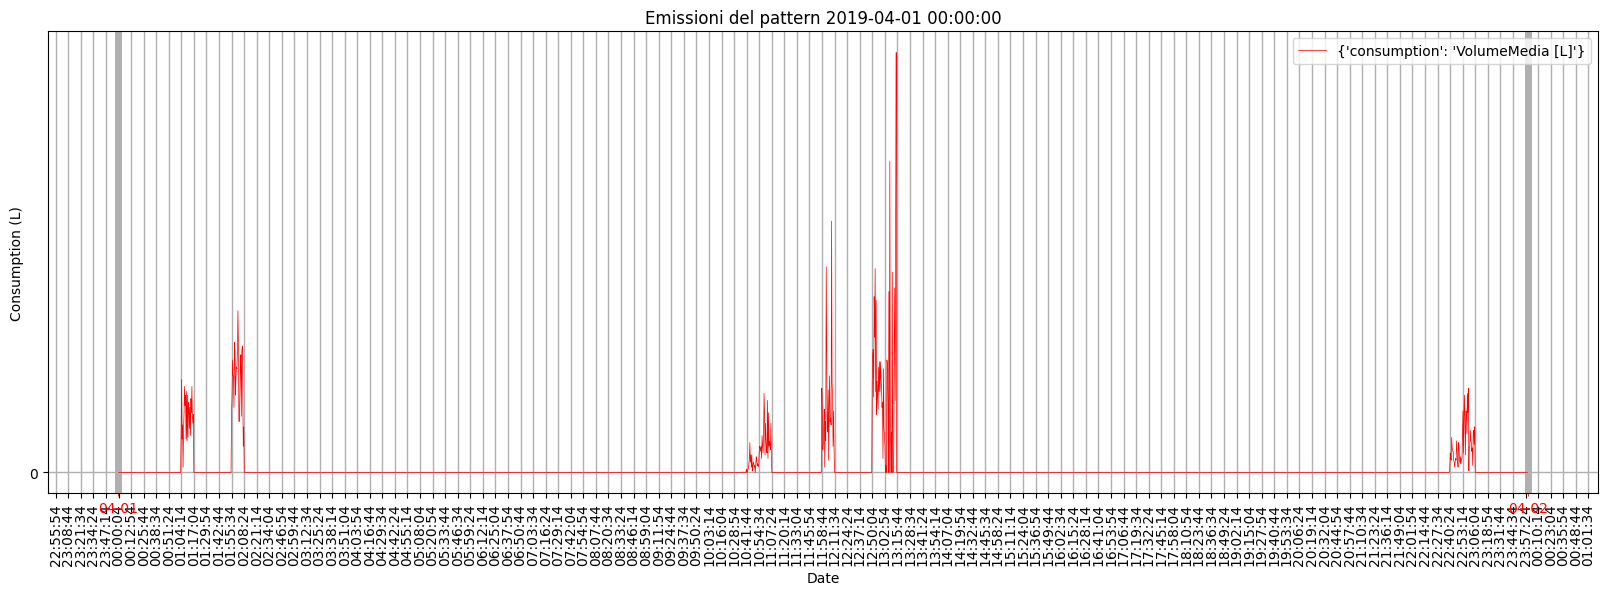

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 6
dove min1: 15502.899999999998 min2: 17457.28846153846 min3: 12211.084254143647
min_value per questo pattern: 17457.28846153846
dove max1: 26576.399999999998 max2: 19951.186813186814 max3: 41866.57458563536
max_value per questo pattern: 19951.186813186814
4 False
	emissione giornaliera: 18184

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'P', 'L', 'L']

intervallo: [[9], [12], [60], [62], [102], [108]]
divisione dell'emissioni in intervalli: [3443, 219, 2236, 3756, 6593, 1937]

DATAFRAME  COSTRUITO
	intervallo finale: [[9], [12], [60], [62], [102], [108]]
	divisione finale dell'emissioni in intervalli: [3443, 219, 2236, 3756, 6593, 1937]
	emissione totale giornaliera: 18184
	picco di emissione giornaliera: 12.2

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 01:55:30', freq='770S'), Timestamp('2019-04-01 02:08:20', freq='770S'), 1), (Timestamp('2019-04-01 02:34:00', freq='770S'),

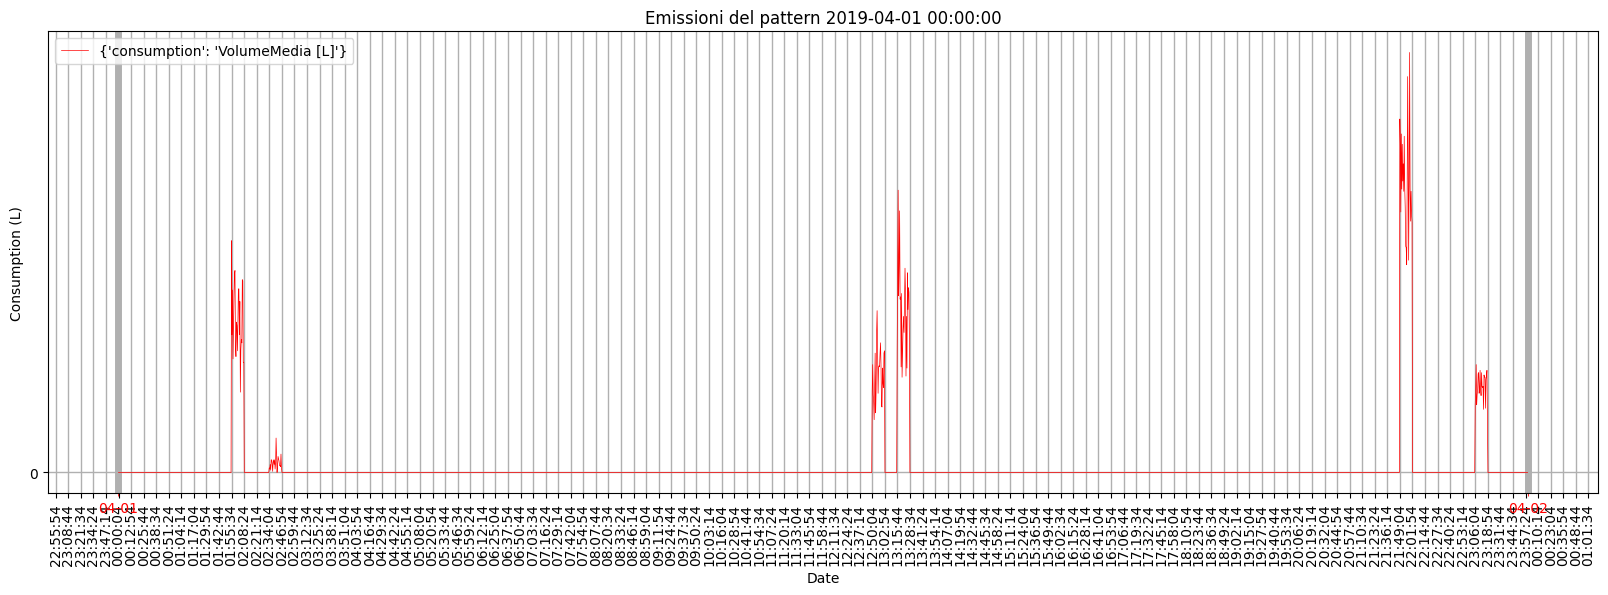

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 9
dove min1: 4429.4 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6644.099999999999 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6644.099999999999
4 False
	emissione giornaliera: 5573

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'L', 'P', 'M', 'P', 'L']

intervallo: [[1], [5], [25], [30], [45], [47, 48], [52], [54], [97]]
divisione dell'emissioni in intervalli: [848, 669, 97, 187, 2169, [1319, 2], 49, 30, 203]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [118, 1269, 281, 49, 1821, [221, 56], 218, 595, 945]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1083, 301, 119, 1699, 211, [129, 233], 669, 844, 285]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [214, 1066, 357, 618, 983, [229, 499], 1078, 247, 282]
debug temp esmissioni 1
divisione dell

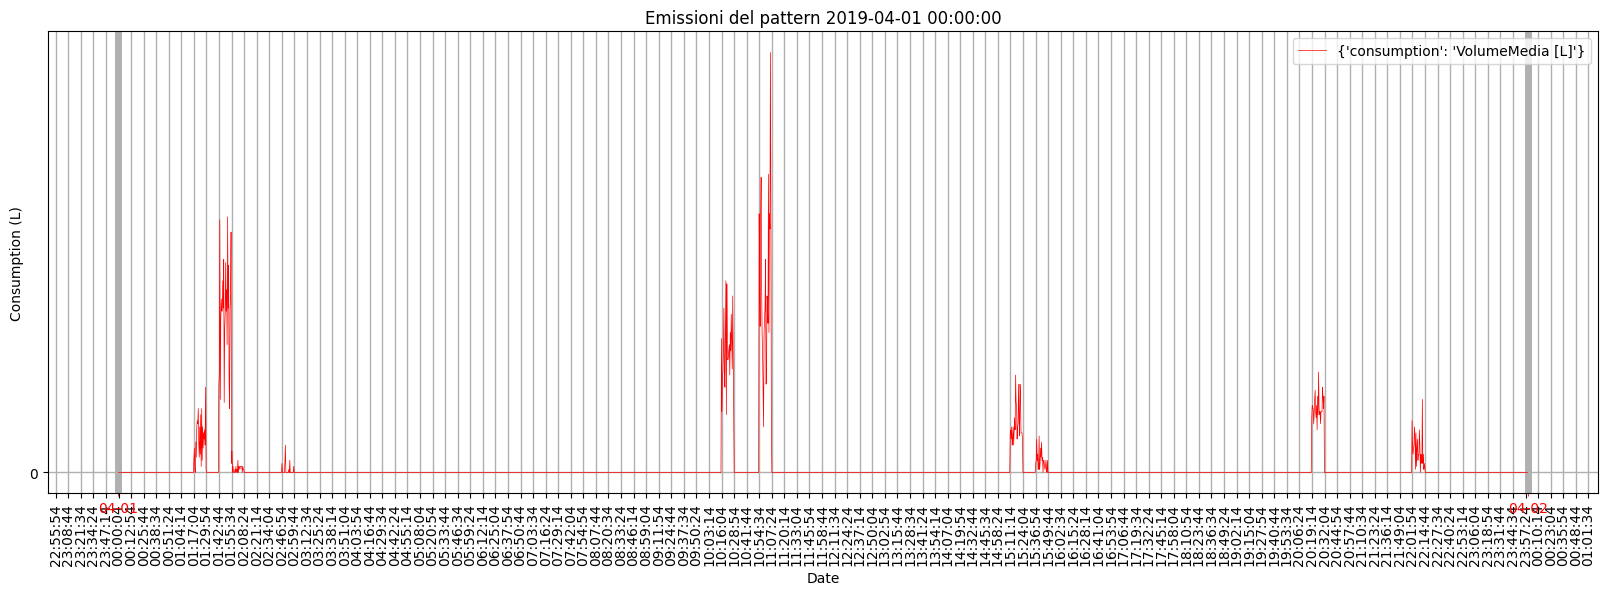

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 7
dove min1: 6644.099999999999 min2: 7481.695054945056 min3: 6977.762430939227
min_value per questo pattern: 7481.695054945056
dove max1: 8858.8 max2: 9975.593406593407 max3: 8722.203038674033
max_value per questo pattern: 8722.203038674033
4 False
	emissione giornaliera: 7639

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'M', 'L', 'P']

intervallo: [[3, 4], [31], [46], [63], [66], [74], [76]]
divisione dell'emissioni in intervalli: [[65, 39], 7, 1452, 1658, 1907, 1322, 1189]

DATAFRAME  COSTRUITO
	intervallo finale: [[3, 4], [31], [46], [63], [66], [74], [76]]
	divisione finale dell'emissioni in intervalli: [[65, 39], 7, 1452, 1658, 1907, 1322, 1189]
	emissione totale giornaliera: 7639
	picco di emissione giornaliera: 3.8666666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 00:38:30', freq='770S'), Timestamp('2019-04-01 01:04:10', freq='770S'), 2), (Timestamp('2019

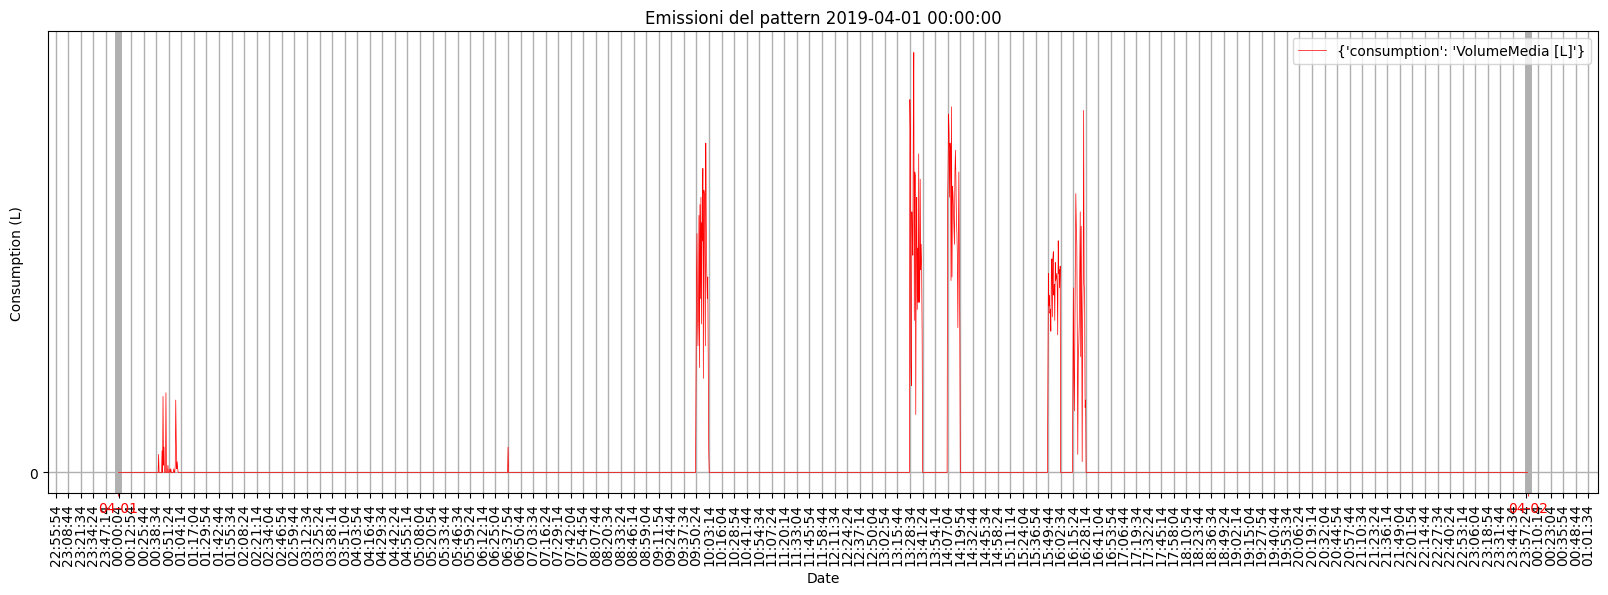

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 9
dove min1: 4429.4 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6644.099999999999 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6644.099999999999
4 False
	emissione giornaliera: 5418

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'M', 'P', 'P', 'L', 'L', 'L', 'M']

intervallo: [[1, 2], [20], [24], [26], [28], [55], [63], [81], [84]]
divisione dell'emissioni in intervalli: [[957, 271], 150, 486, 109, 2107, 83, 75, 99, 1081]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[178, 94], 944, 291, 446, 130, 404, 2275, 51, 605]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [[47, 28], 118, 2306, 15, 50, 1386, 92, 921, 455]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [[838, 307], 118, 275, 87, 843, 593, 758, 1143, 456]
debug temp esmissioni 2
debug temp esmission

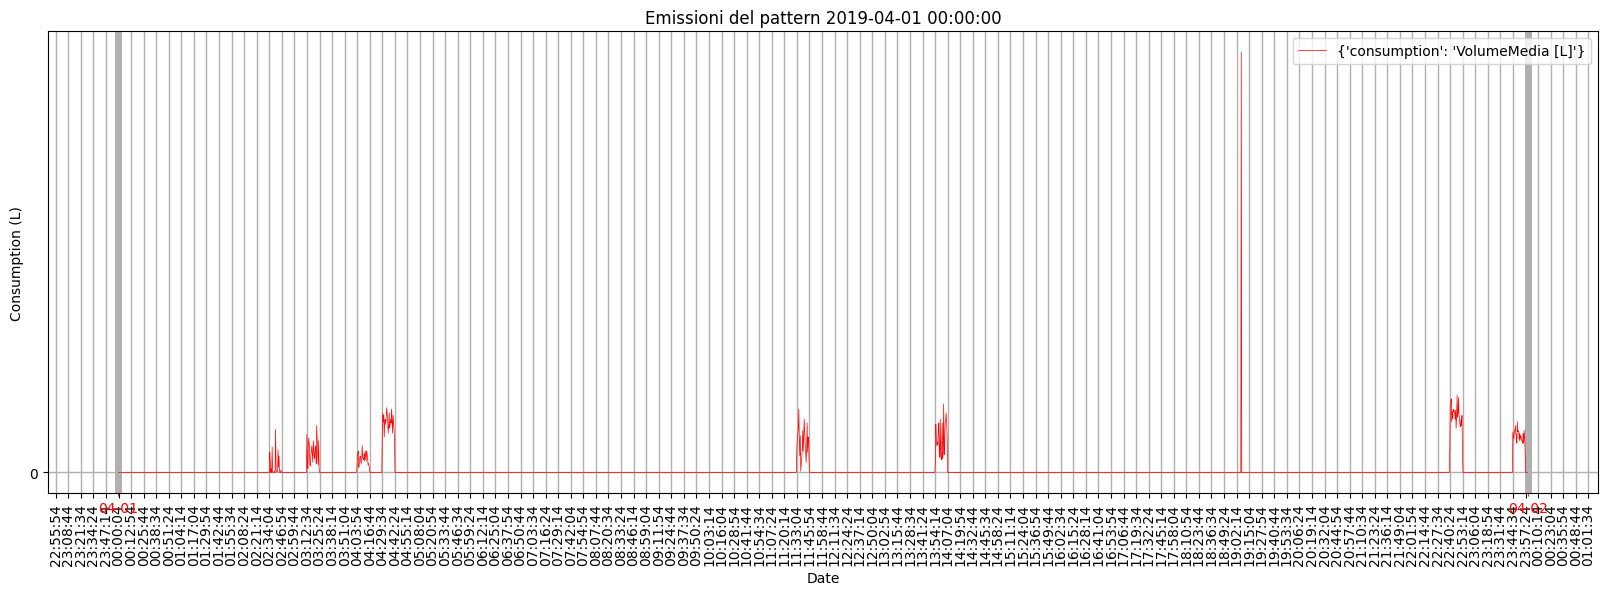

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 6
dove min1: 15502.899999999998 min2: 17457.28846153846 min3: 12211.084254143647
min_value per questo pattern: 17457.28846153846
dove max1: 53152.799999999996 max2: 29926.780219780223 max3: 34888.812154696134
max_value per questo pattern: 29926.780219780223
4 False
	emissione giornaliera: 20614

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'L', 'L', 'M', 'L']

intervallo: [[4], [6], [27], [38], [42], [104]]
divisione dell'emissioni in intervalli: [8533, 1178, 168, 1240, 2239, 7256]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [721, 573, 1568, 4489, 12786, 477]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [5304, 316, 1472, 438, 4768, 8316]
non rispetta und_value
divisione dell'emissioni in intervalli: [2681, 1482, 4716, 5337, 3572, 2826]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1924, 6218, 2046, 1030, 3902, 5494]
debug temp esmissioni 1
t

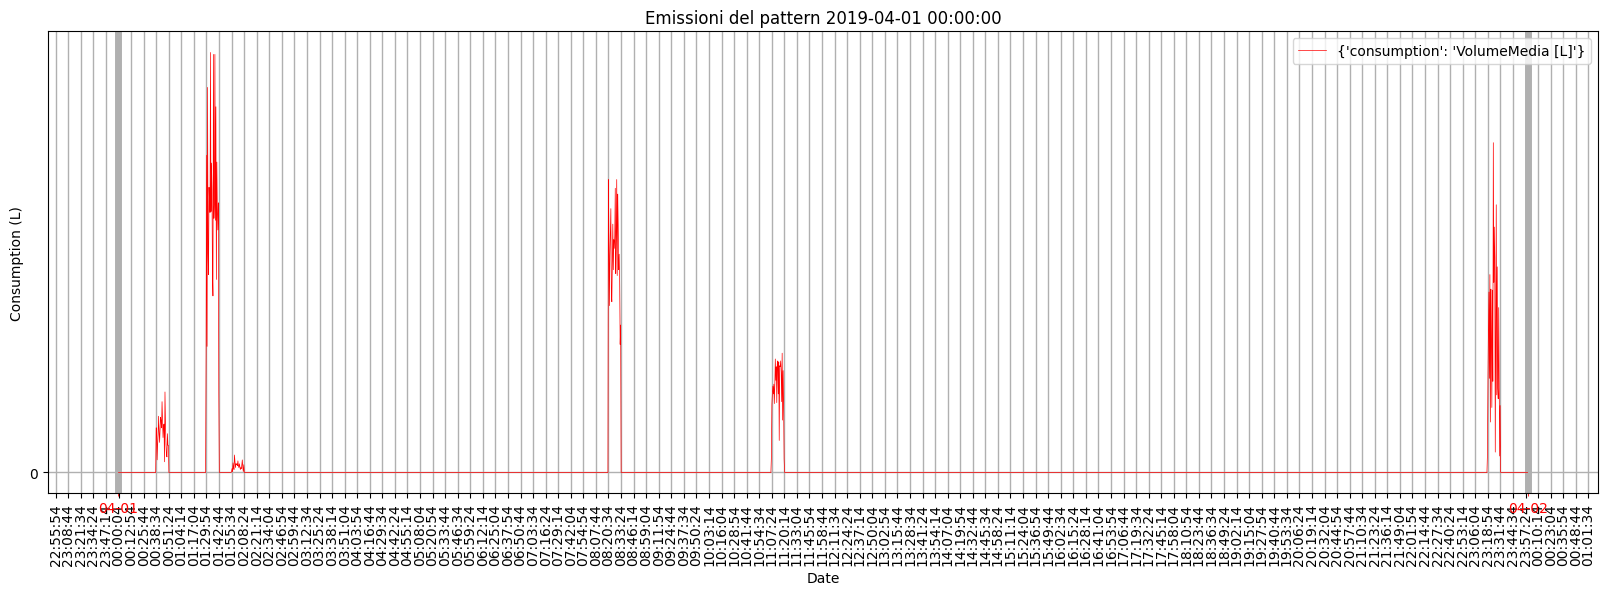

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 6
dove min1: 11073.5 min2: 7481.695054945056 min3: 8722.203038674033
min_value per questo pattern: 11073.5
dove max1: 13288.199999999999 max2: 9975.593406593407 max3: 10466.64364640884
max_value per questo pattern: 9975.593406593407
4 True
dove min1: 9583.064516129032 min2: 7481.695054945056 min3: 8722.203038674033
min_value per questo pattern: 9583.064516129032
dove max1: 11499.677419354837 max2: 9975.593406593407 max3: 10466.64364640884
max_value per questo pattern: 9975.593406593407
5 False
	emissione giornaliera: 9974

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L', 'L', 'P']

intervallo: [[4, 5], [30, 31], [33], [64], [77], [79]]
divisione dell'emissioni in intervalli: [[348, 567], [1582, 1012], 3262, 2605, 538, 60]

DATAFRAME  COSTRUITO
	intervallo finale: [[4, 5], [30, 31], [33], [64], [77], [79]]
	divisione finale dell'emissioni in intervalli: [[348, 567], [1582, 1012], 3262, 2605, 5

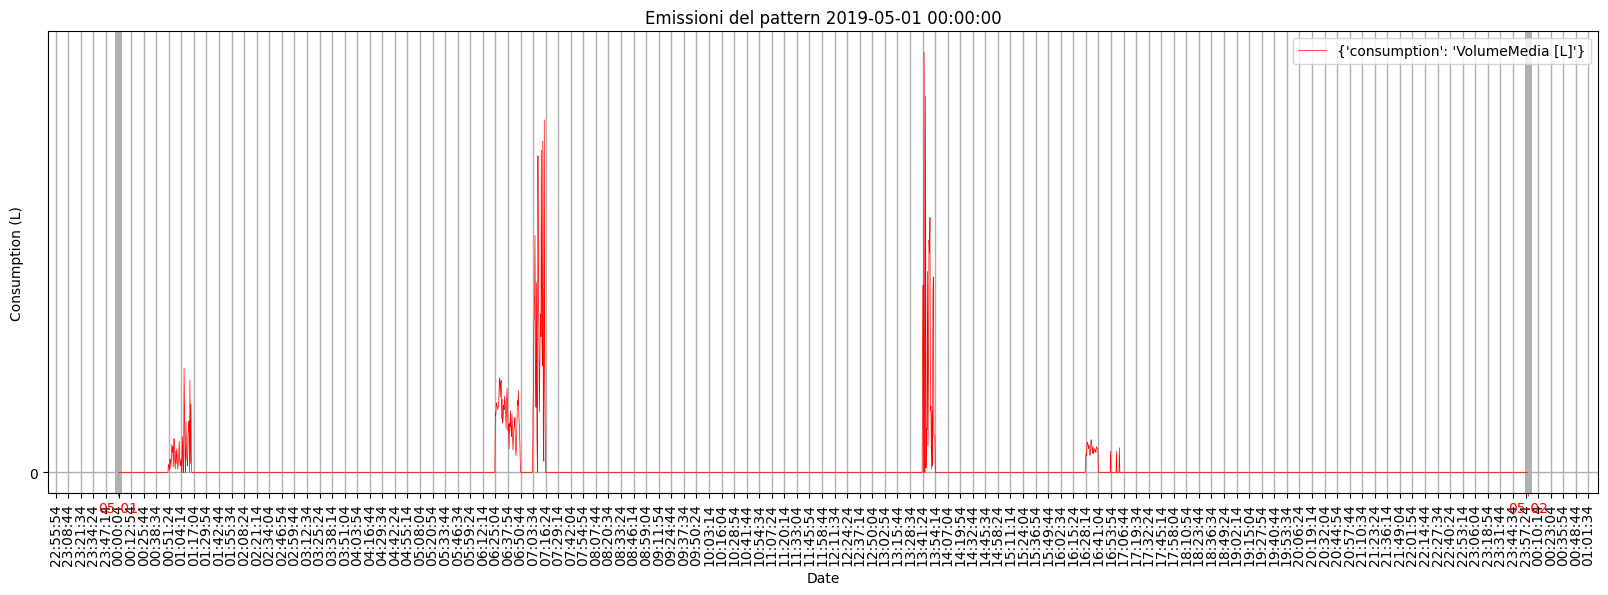

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 11073.5 min2: 12469.491758241758 min3: 12211.084254143647
min_value per questo pattern: 12469.491758241758
dove max1: 13288.199999999999 max2: 14963.390109890111 max3: 41866.57458563536
max_value per questo pattern: 13288.199999999999
4 False
	emissione giornaliera: 13171

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[3], [17, 18], [50], [94], [101], [110]]
divisione dell'emissioni in intervalli: [3557, [3031, 4258], 1396, 610, 55, 264]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [4200, [1634, 109], 1398, 2488, 2493, 849]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1608, [147, 55], 2595, 5802, 1838, 1126]

DATAFRAME  COSTRUITO
	intervallo finale: [[3], [17, 18], [50], [94], [101], [110]]
	divisione finale dell'emissioni in intervalli: [1608, [147, 55], 2595, 5802, 1838, 1126]
	emissione totale giornaliera: 13171


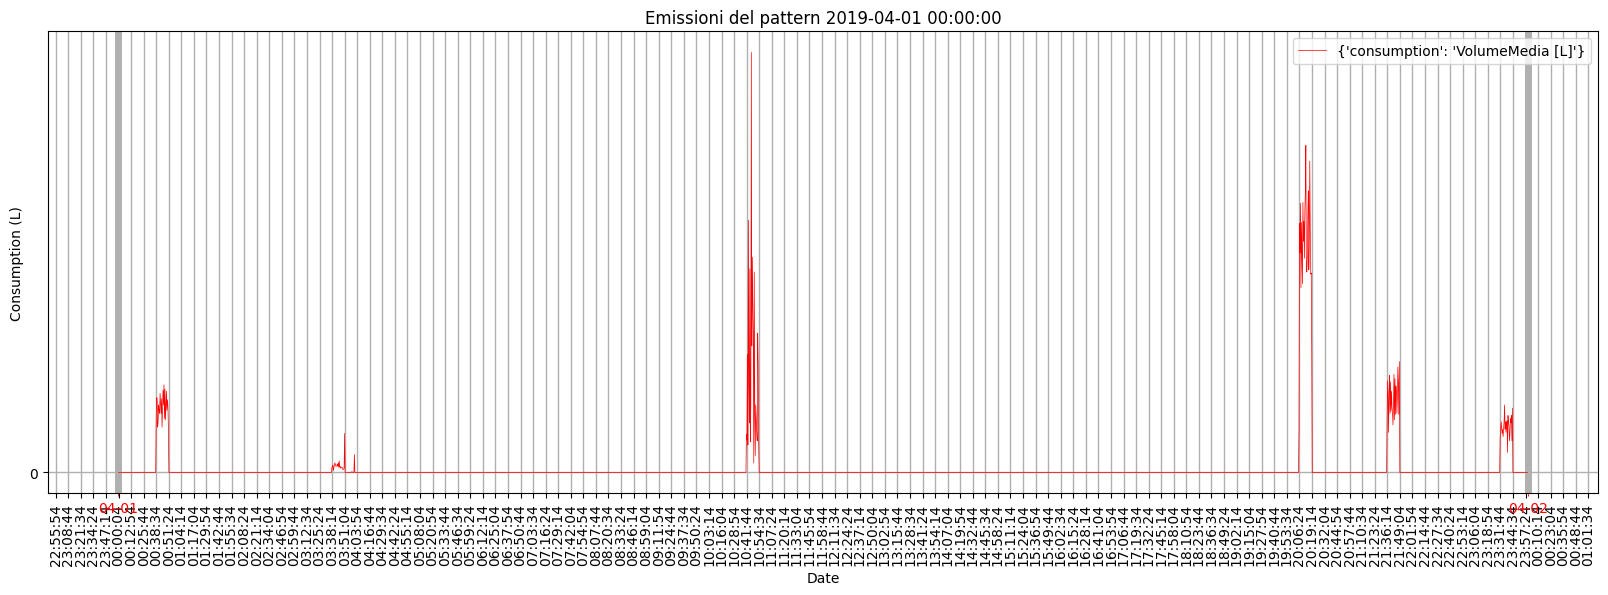

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 6644.099999999999 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 6644.099999999999
dove max1: 8858.8 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6977.762430939227
4 False
	emissione giornaliera: 6926

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: L
spazi: []

intervallo: [[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]]
divisione dell'emissioni in intervalli: [[79, 220, 254, 25, 15, 64, 225, 531, 38, 75, 22, 117, 59, 8, 21, 134, 72, 253, 51, 120, 175, 1, 270, 127, 122, 25, 115, 472, 391, 167, 59, 49, 151, 361, 196, 5, 88, 370, 181, 489, 94, 347, 75, 135, 31, 47]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[45, 182, 194, 62

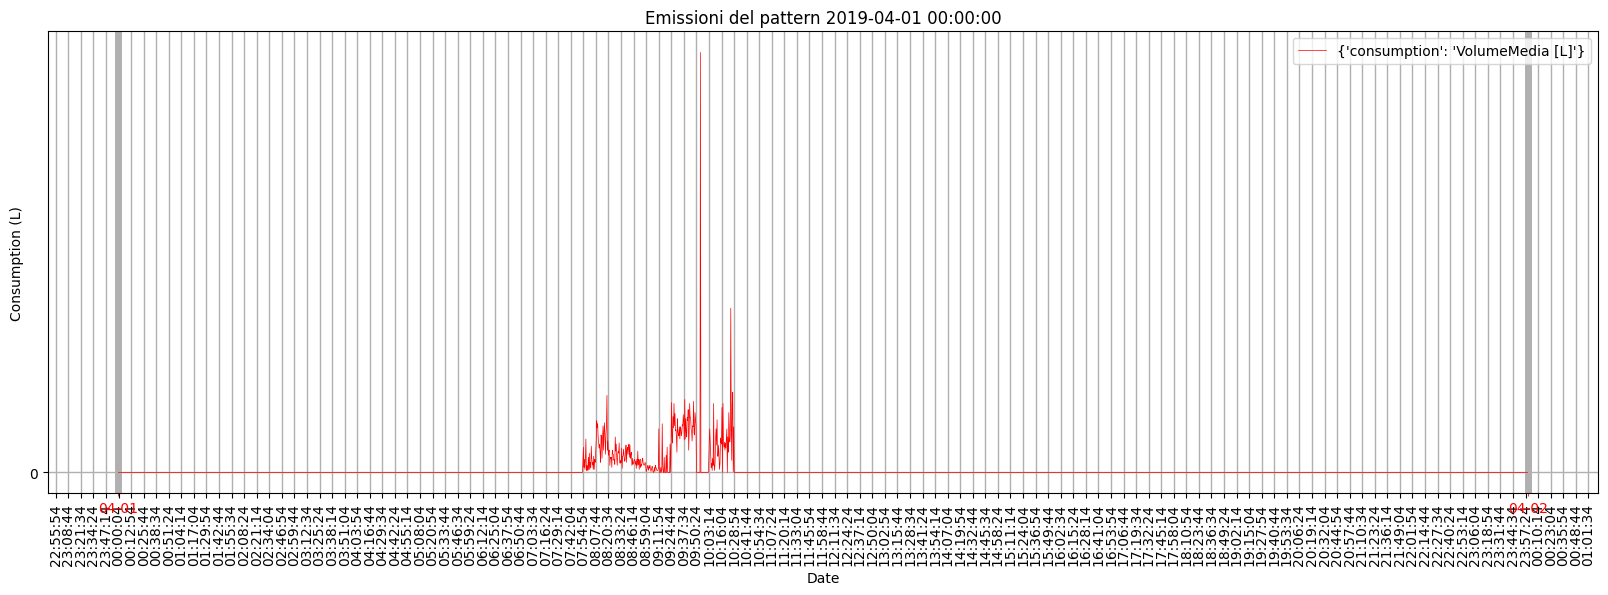

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 6
dove min1: 15502.899999999998 min2: 17457.28846153846 min3: 12211.084254143647
min_value per questo pattern: 17457.28846153846
dove max1: 26576.399999999998 max2: 29926.780219780223 max3: 20933.28729281768
max_value per questo pattern: 20933.28729281768
4 False
	emissione giornaliera: 18841

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'L', 'P']

intervallo: [[1], [4], [31], [52], [100], [102]]
divisione dell'emissioni in intervalli: [4032, 823, 1778, 3268, 5581, 3359]

DATAFRAME  COSTRUITO
	intervallo finale: [[1], [4], [31], [52], [100], [102]]
	divisione finale dell'emissioni in intervalli: [4032, 823, 1778, 3268, 5581, 3359]
	emissione totale giornaliera: 18841
	picco di emissione giornaliera: 9.933333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 00:12:50', freq='770S'), Timestamp('2019-04-01 00:25:40', freq='770S'), 1), (Timestamp('2019-04-01 00:51:20', fre

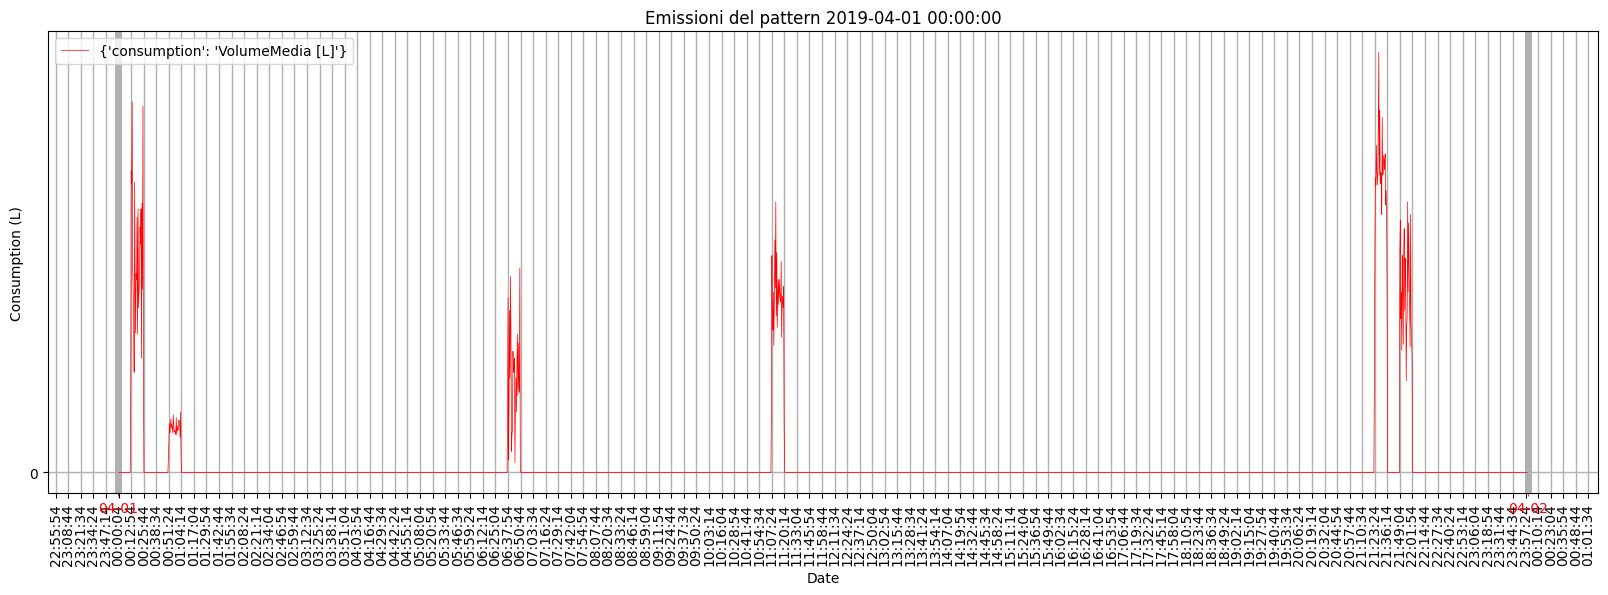

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 4429.4 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6644.099999999999 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6644.099999999999
4 False
	emissione giornaliera: 5555

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'M', 'L']

intervallo: [[30], [38], [41], [68]]
divisione dell'emissioni in intervalli: [138, 557, 4182, 678]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1425, 49, 2939, 1142]

DATAFRAME  COSTRUITO
	intervallo finale: [[30], [38], [41], [68]]
	divisione finale dell'emissioni in intervalli: [1425, 49, 2939, 1142]
	emissione totale giornaliera: 5555
	picco di emissione giornaliera: 13.0

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 06:25:00', freq='770S'), Timestamp('2019-04-01 06:37:50', freq='770S'), 1), (Timestamp('2019-04-01 08:07:40', freq='77

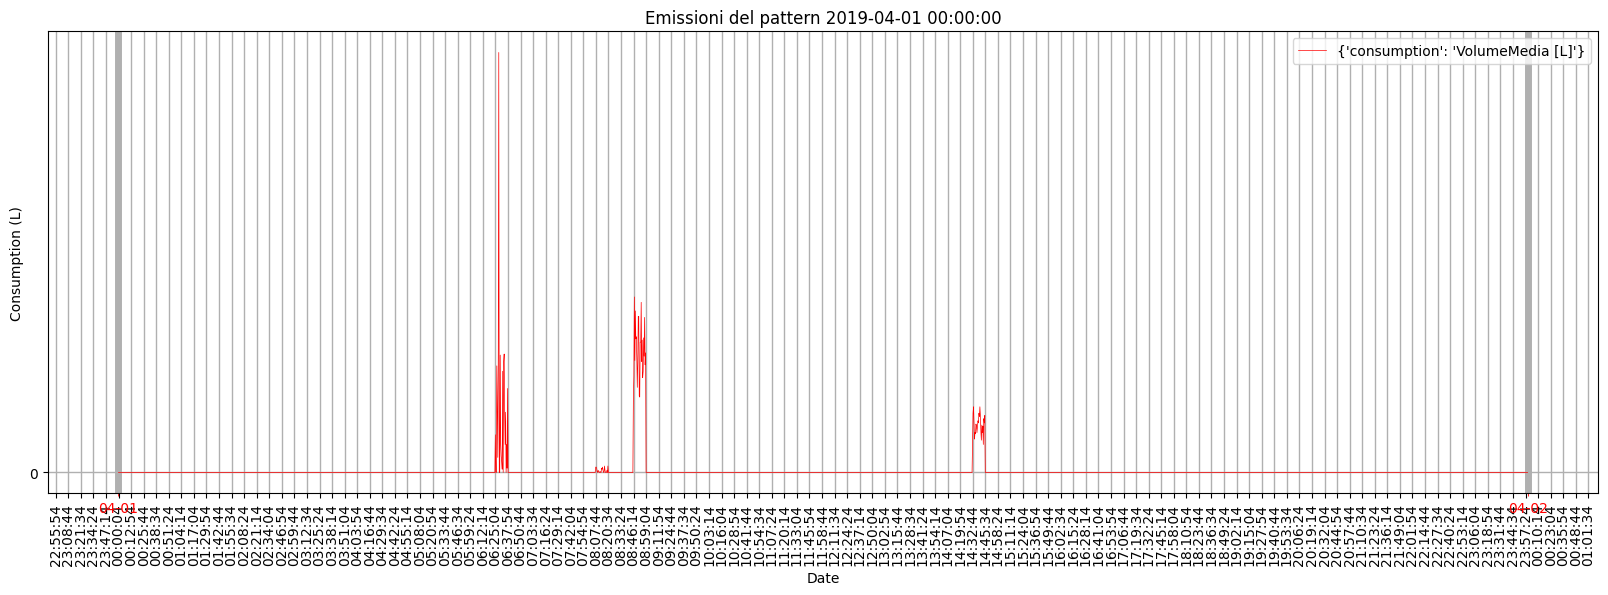

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 3
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2214.7 max2: 2493.8983516483518 max3: 1744.4406077348067
max_value per questo pattern: 1744.4406077348067
4 False
	emissione giornaliera: 1233

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PPP
spazi: ['M', 'L']

intervallo: [[25], [28], [90]]
divisione dell'emissioni in intervalli: [136, 797, 300]

DATAFRAME  COSTRUITO
	intervallo finale: [[25], [28], [90]]
	divisione finale dell'emissioni in intervalli: [136, 797, 300]
	emissione totale giornaliera: 1233
	picco di emissione giornaliera: 1.4333333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 05:20:50', freq='770S'), Timestamp('2019-04-01 05:33:40', freq='770S'), 1), (Timestamp('2019-04-01 05:59:20', freq='770S'), Timestamp('2019-04-01 06:12:10', freq='770S'), 1), (Timestamp('2019-04-01 19:15:00', freq='770S'), Timestamp('2019-04-01 19:27:50'

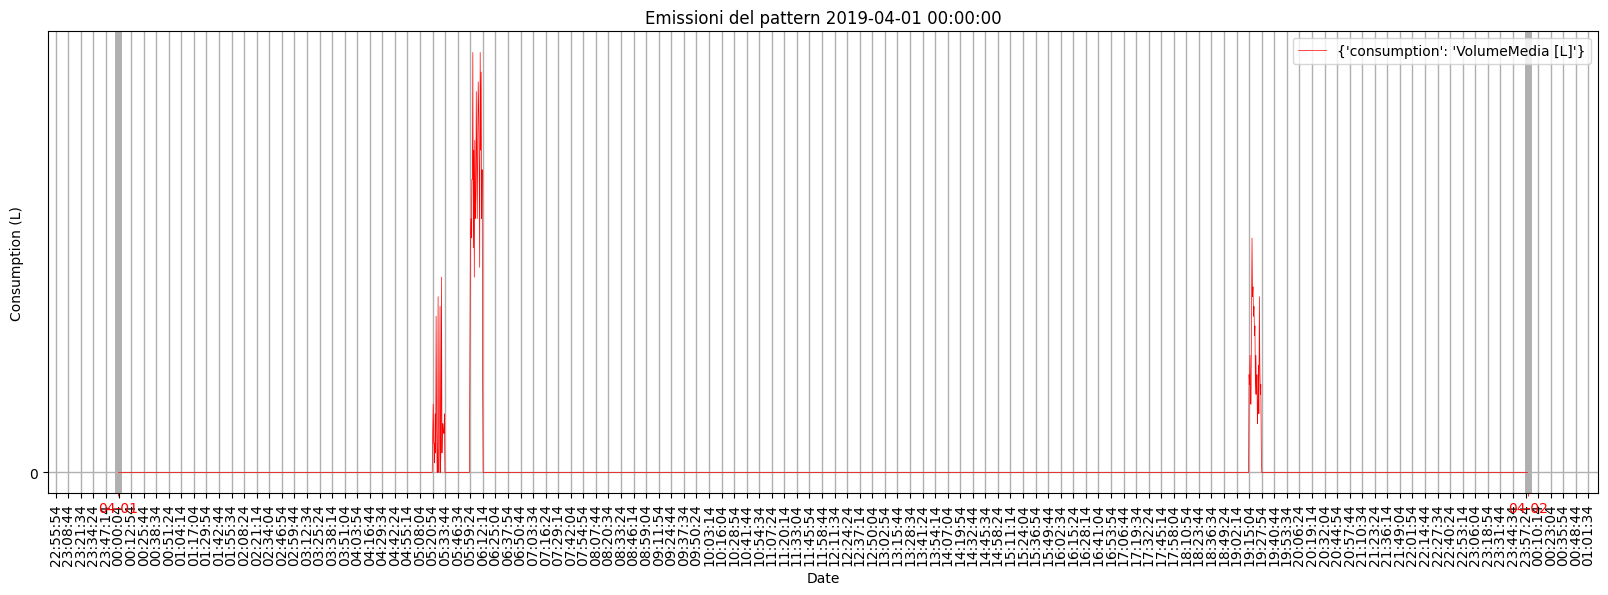

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 3
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2214.7 max2: 2493.8983516483518 max3: 1744.4406077348067
max_value per questo pattern: 1744.4406077348067
4 False
	emissione giornaliera: 11

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PPP
spazi: ['M', 'L']

intervallo: [[5], [8], [110]]
divisione dell'emissioni in intervalli: [3, 6, 2]

DATAFRAME  COSTRUITO
	intervallo finale: [[5], [8], [110]]
	divisione finale dell'emissioni in intervalli: [3, 6, 2]
	emissione totale giornaliera: 11
	picco di emissione giornaliera: 0.13333333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 01:04:10', freq='770S'), Timestamp('2019-04-01 01:17:00', freq='770S'), 1), (Timestamp('2019-04-01 01:42:40', freq='770S'), Timestamp('2019-04-01 01:55:30', freq='770S'), 1), (Timestamp('2019-04-01 23:31:40', freq='770S'), Timestamp('2019-04-01 23:44:30', freq='770S'), 1

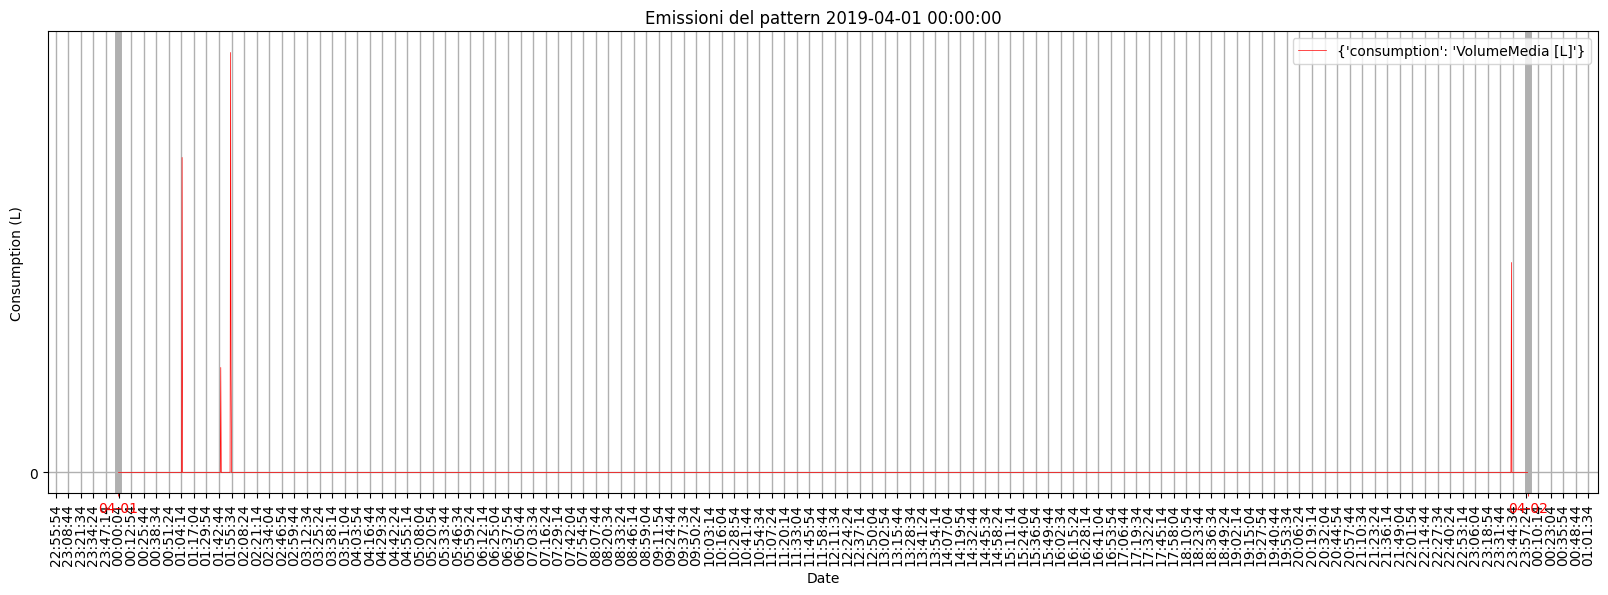

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 4
dove min1: 4429.4 min2: 2493.8983516483518 min3: 3488.8812154696134
min_value per questo pattern: 4429.4
dove max1: 6644.099999999999 max2: 4987.7967032967035 max3: 5233.32182320442
max_value per questo pattern: 4987.7967032967035
4 False
	emissione giornaliera: 4443

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L']

intervallo: [[53], [70], [93], [108, 109]]
divisione dell'emissioni in intervalli: [2591, 350, 1432, [23, 47]]

DATAFRAME  COSTRUITO
	intervallo finale: [[53], [70], [93], [108, 109]]
	divisione finale dell'emissioni in intervalli: [2591, 350, 1432, [23, 47]]
	emissione totale giornaliera: 4443
	picco di emissione giornaliera: 8.9

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 11:20:10', freq='770S'), Timestamp('2019-04-01 11:33:00', freq='770S'), 1), (Timestamp('2019-04-01 14:58:20', freq='770S'), Timestamp('2019-04-01 15:11:10', freq='770S'), 1), (Timestamp('2019

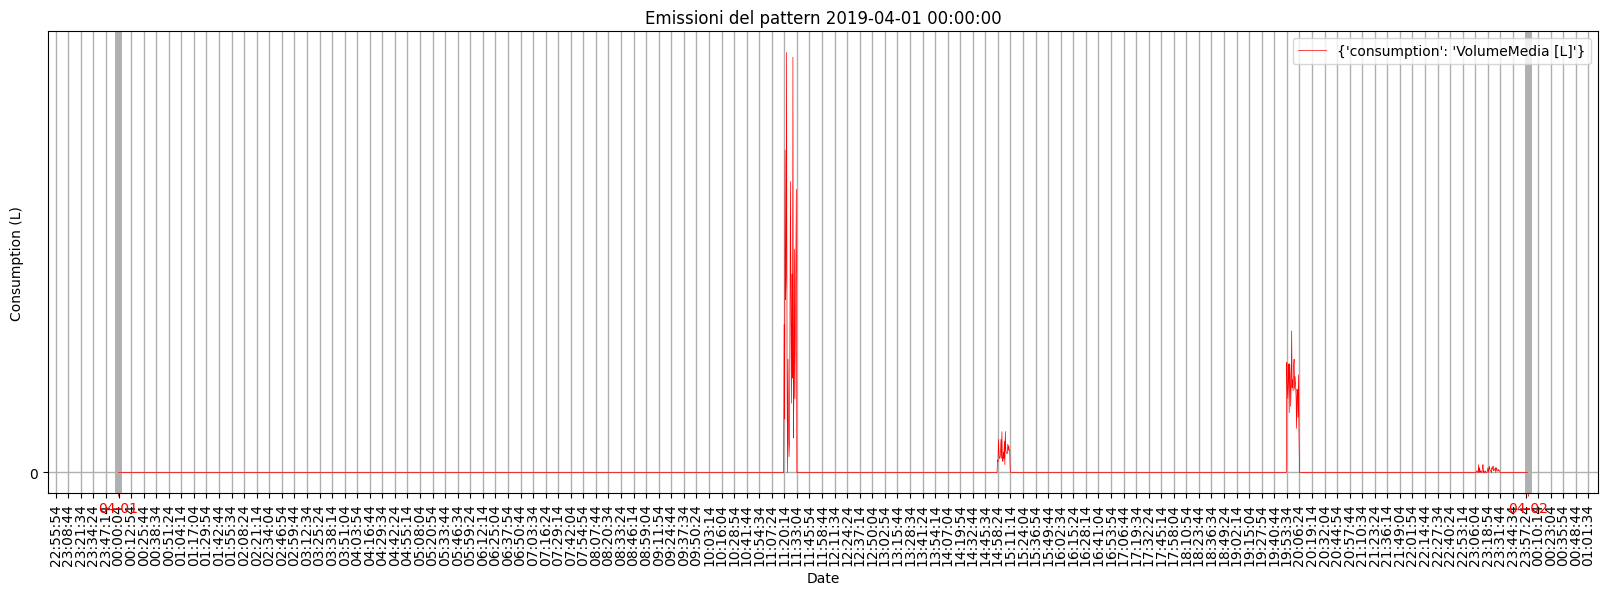

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 2131.185483870968 min2: 1340.8478260869565 min3: 1100.7907608695652
min_value per questo pattern: 2131.185483870968
dove max1: 2841.5806451612902 max2: 2681.695652173913 max3: 2201.5815217391305
max_value per questo pattern: 2201.5815217391305
	emissione giornaliera: 2153

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[74, 75]]
divisione dell'emissioni in intervalli: [[1353, 800]]

DATAFRAME  COSTRUITO
	intervallo finale: [[74, 75]]
	divisione finale dell'emissioni in intervalli: [[1353, 800]]
	emissione totale giornaliera: 2153
	picco di emissione giornaliera: 4.433333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-01 15:49:40', freq='770S'), Timestamp('2019-08-01 16:15:20', freq='770S'), 2)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CDMBLB1M_S0


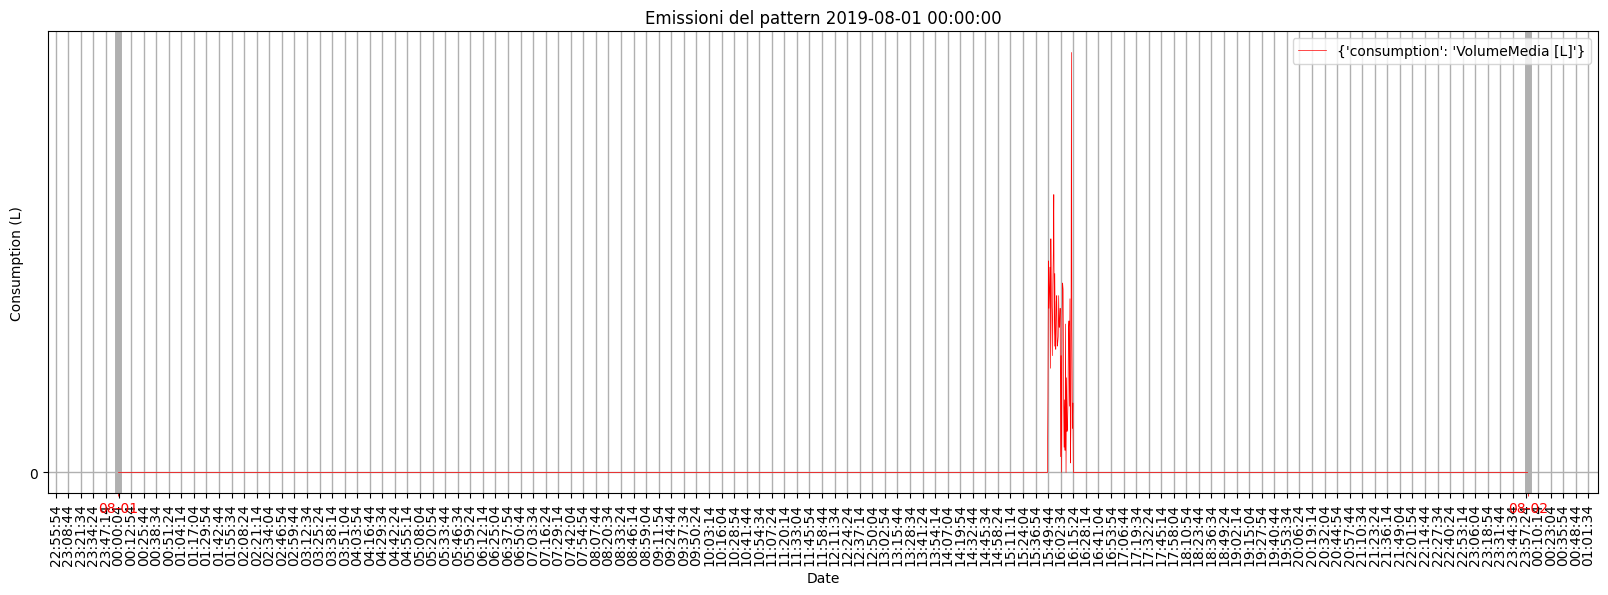

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 6
dove min1: 4972.766129032258 min2: 9385.934782608696 min3: 7705.535326086957
min_value per questo pattern: 9385.934782608696
dove max1: 14207.90322580645 max2: 16090.173913043478 max3: 22015.815217391304
max_value per questo pattern: 14207.90322580645
	emissione giornaliera: 12738

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'L', 'M']

intervallo: [[19], [23], [43], [62, 63], [93], [97]]
divisione dell'emissioni in intervalli: [1964, 746, 599, [3135, 2114], 286, 3894]
non rispetta und_value
divisione dell'emissioni in intervalli: [1526, 325, 2981, [848, 36], 4416, 2606]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2278, 327, 4071, [1154, 117], 2865, 1926]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [4281, 2682, 1428, [1123, 533], 1126, 1565]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [415, 2746, 1852, [834, 657], 5675, 559]
d

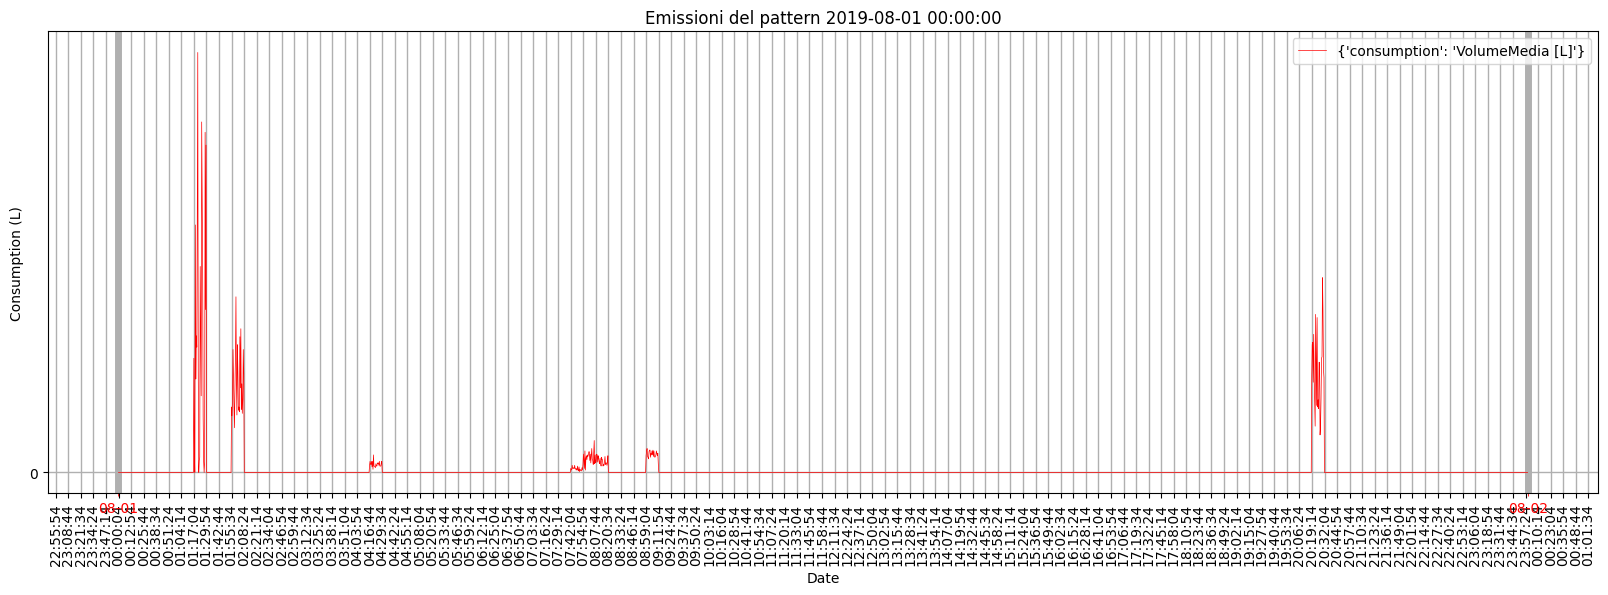

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 710.3951612903226 max2: 1340.8478260869565 max3: 1100.7907608695652
max_value per questo pattern: 710.3951612903226
	emissione giornaliera: 518

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L']

intervallo: [[18], [21], [65], [98]]
divisione dell'emissioni in intervalli: [103, 112, 134, 169]

DATAFRAME  COSTRUITO
	intervallo finale: [[18], [21], [65], [98]]
	divisione finale dell'emissioni in intervalli: [103, 112, 134, 169]
	emissione totale giornaliera: 518
	picco di emissione giornaliera: 5.633333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-01 03:51:00', freq='770S'), Timestamp('2019-08-01 04:03:50', freq='770S'), 1), (Timestamp('2019-08-01 04:29:30', freq='770S'), Timestamp('2019-08-01 04:42:20', freq='770S'), 1), (Timestamp('2019-08-01 13:54:10', freq='770S'), Timestamp('2019-08-01 14:07:00',

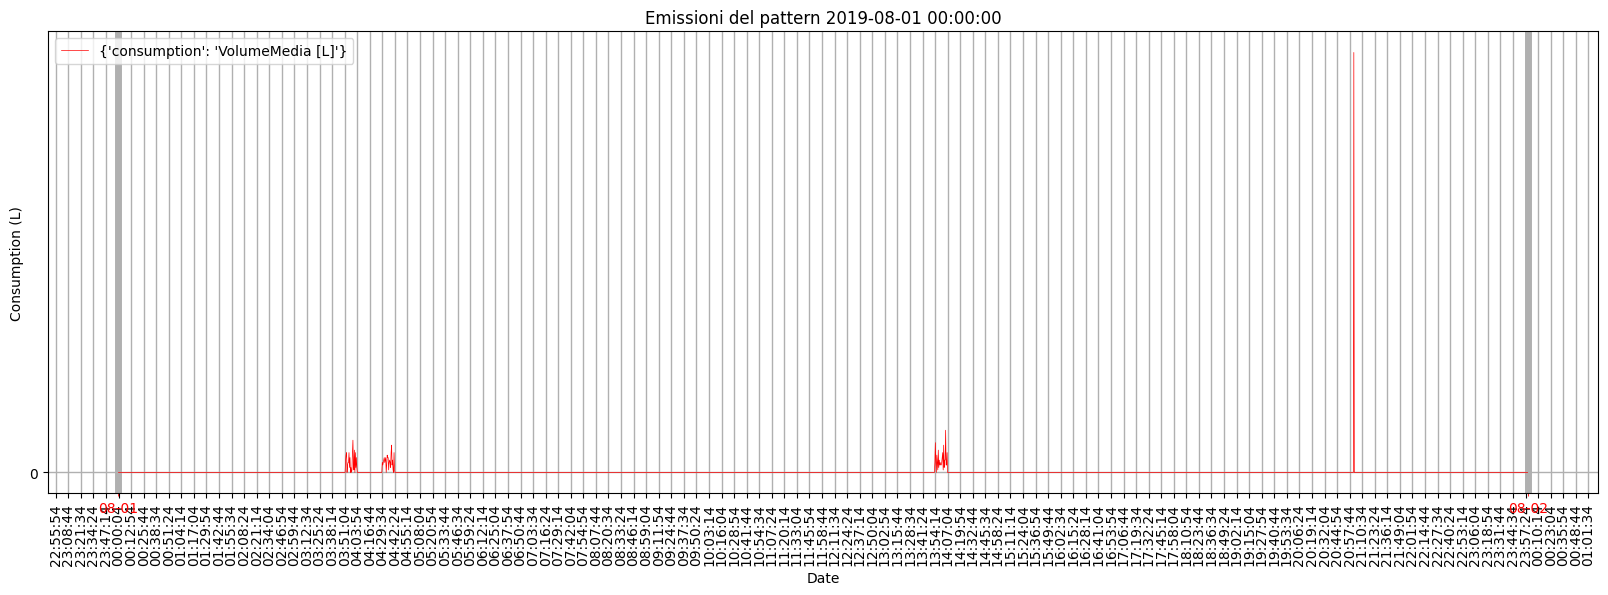

emissione giornaliera: 0

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 2131.185483870968 min2: 1340.8478260869565 min3: 2201.5815217391305
min_value per questo pattern: 2201.5815217391305
dove max1: 2841.5806451612902 max2: 2681.695652173913 max3: 3302.372282608696
max_value per questo pattern: 2681.695652173913
	emissione giornaliera: 2392

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[54, 55, 56]]
divisione dell'emissioni in intervalli: [[406, 262, 1724]]

DATAFRAME  COSTRUITO
	intervallo finale: [[54, 55, 56]]
	divisione finale dell'emissioni in intervalli: [[406, 262, 1724]]
	emissione totale giornaliera: 2392
	picco di emissione giornaliera: 10.666666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-01 11:33:00', freq='770S'), Timestamp('2019-08-01 12:11:30', freq='770S'), 3)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CDMBLC1M_S0


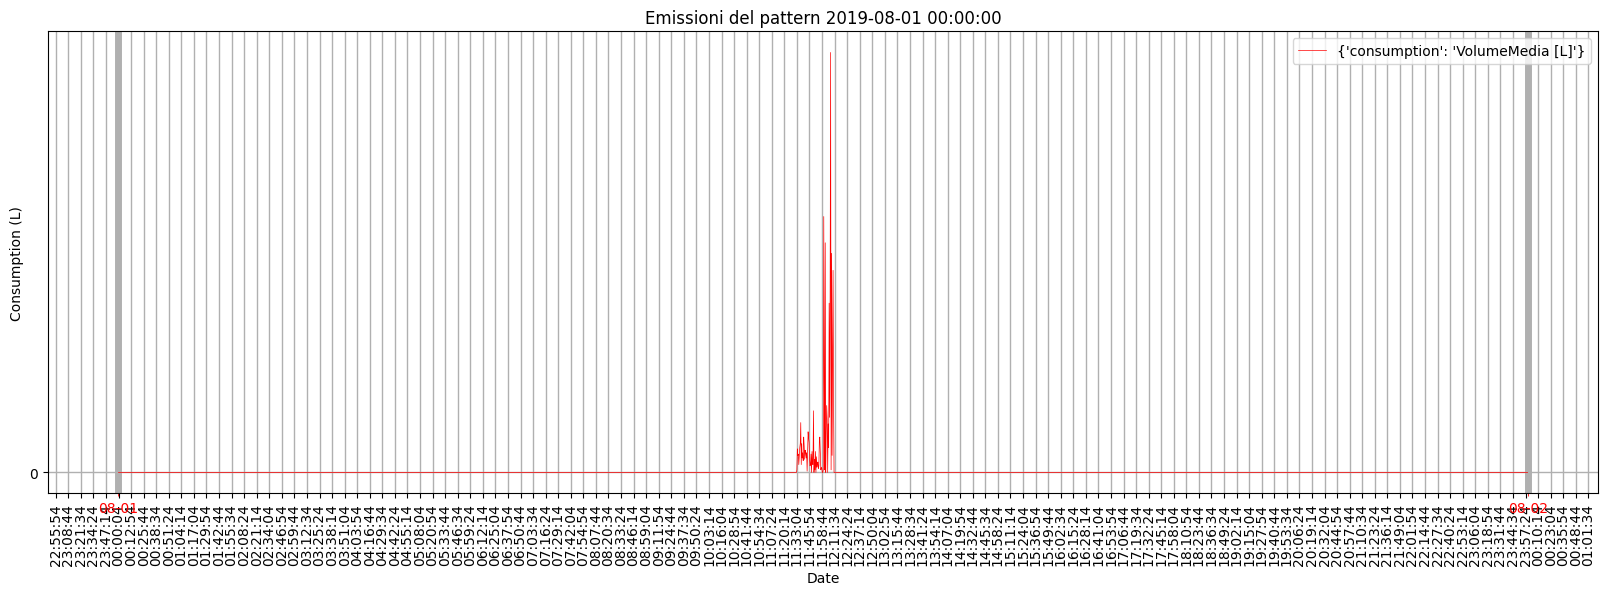

emissione giornaliera: 0

emissione giornaliera: 0

emissione giornaliera: 0

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 5
dove min1: 2131.185483870968 min2: 1340.8478260869565 min3: 2201.5815217391305
min_value per questo pattern: 2201.5815217391305
dove max1: 2841.5806451612902 max2: 2681.695652173913 max3: 3302.372282608696
max_value per questo pattern: 2681.695652173913
	emissione giornaliera: 2392

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L']

intervallo: [[10], [24], [34], [56], [109]]
divisione dell'emissioni in intervalli: [31, 67, 1331, 505, 458]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [166, 316, 269, 855, 786]

DATAFRAME  COSTRUITO
	intervallo finale: [[10], [24], [34], [56], [109]]
	divisione finale dell'emissioni in intervalli: [166, 316, 269, 855, 786]
	emissione totale giornaliera: 2392
	picco di emissione giornaliera: 1.9666666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('20

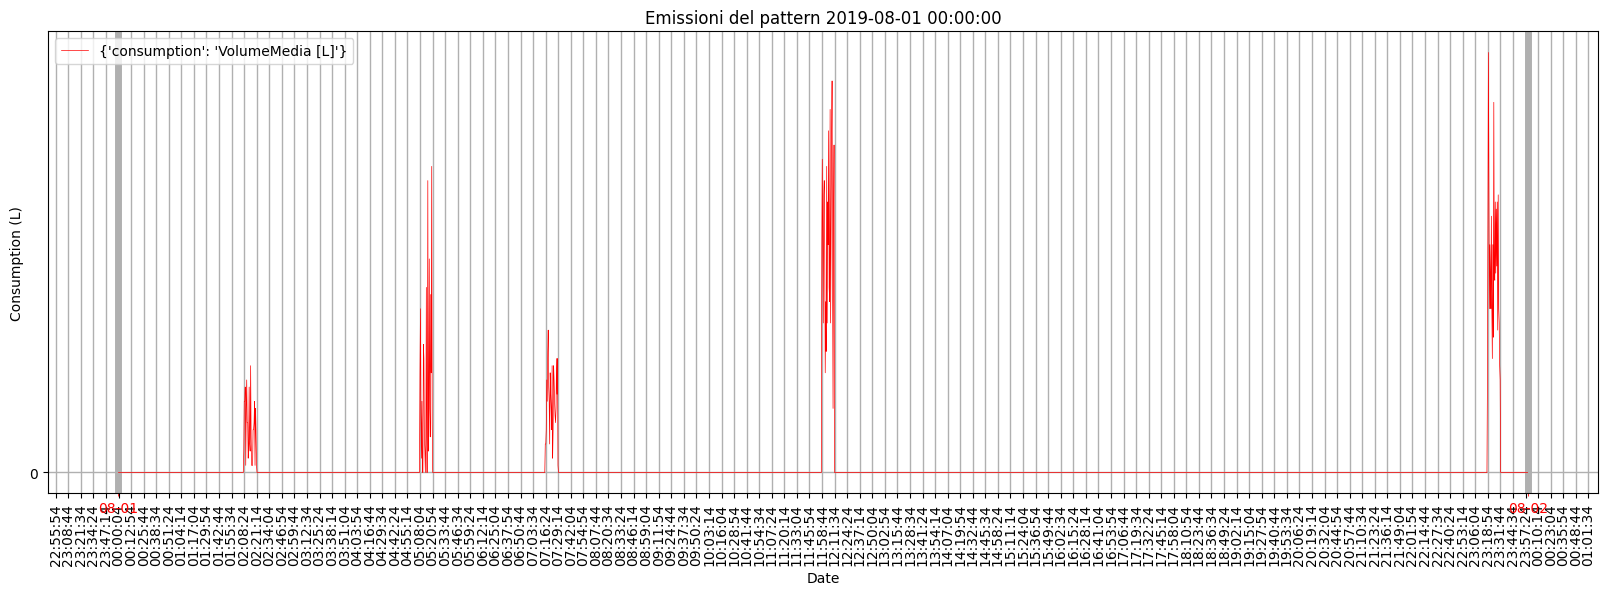

emissione giornaliera: 0

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: M1c
	numero di intervalli: 16
dove min1: 4972.766129032258 min2: 9385.934782608696 min3: 7705.535326086957
min_value per questo pattern: 9385.934782608696
dove max1: 11366.322580645161 max2: 16090.173913043478 max3: 22015.815217391304
max_value per questo pattern: 11366.322580645161
	emissione giornaliera: 10423

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'M', 'P', 'L', 'M', 'L', 'P', 'P', 'L', 'P', 'M', 'M', 'L', 'M', 'L']

intervallo: [[17], [19], [22], [24, 25], [32], [35], [51], [53], [55, 56], [65], [67], [70], [74, 75], [93], [97], [102]]
divisione dell'emissioni in intervalli: [41, 765, 677, [254, 156], 346, 1125, 715, 446, [320, 37], 216, 109, 1675, [1110, 560], 1106, 293, 472]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [36, 146, 2912, [17, 130], 372, 713, 114, 455, [363, 236], 1175, 1550, 473, [234, 395], 762, 162, 178]
debug temp esmissioni 1
divisione dell'emissioni

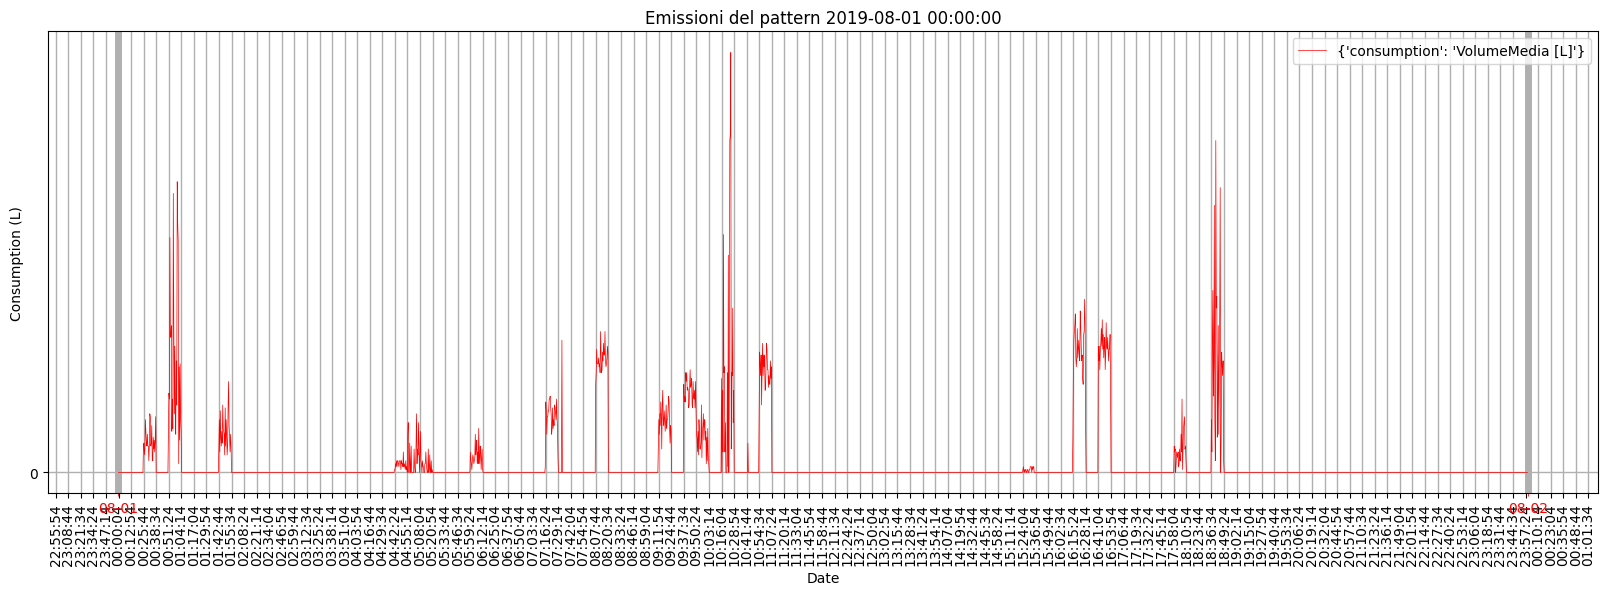

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: P1a
	numero di intervalli: 2
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 710.3951612903226 max2: 1340.8478260869565 max3: 1100.7907608695652
max_value per questo pattern: 710.3951612903226
	emissione giornaliera: 334

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: MP
spazi: ['M']

intervallo: [[22, 23, 24], [28]]
divisione dell'emissioni in intervalli: [[100, 143, 57], 34]

DATAFRAME  COSTRUITO
	intervallo finale: [[22, 23, 24], [28]]
	divisione finale dell'emissioni in intervalli: [[100, 143, 57], 34]
	emissione totale giornaliera: 334
	picco di emissione giornaliera: 3.1333333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-01 04:42:20', freq='770S'), Timestamp('2019-08-01 05:20:50', freq='770S'), 3), (Timestamp('2019-08-01 05:59:20', freq='770S'), Timestamp('2019-08-01 06:12:10', freq='770S'), 1)]
	spazi: lungo=0 medio=1 piccolo=0

	pattern identici: CAMALA2MP_P1a


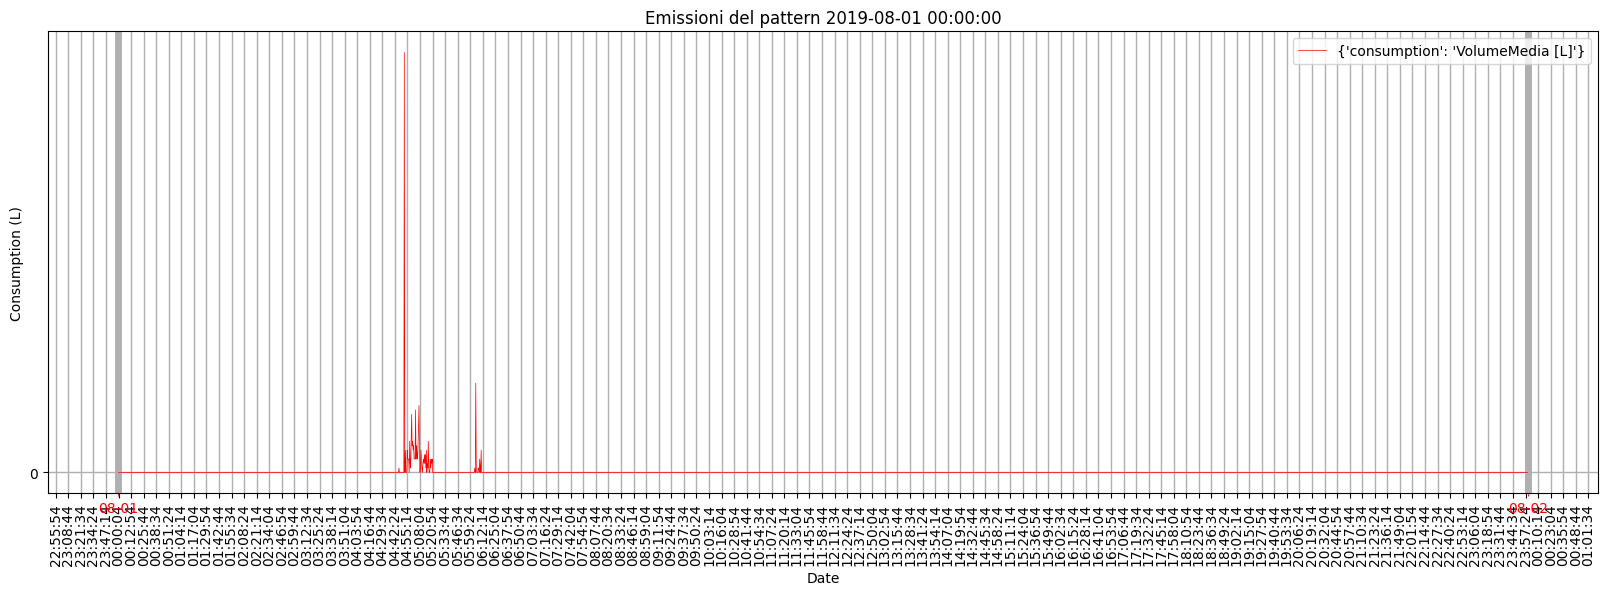

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: P1a
	numero di intervalli: 2
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 710.3951612903226 max2: 1340.8478260869565 max3: 1100.7907608695652
max_value per questo pattern: 710.3951612903226
	emissione giornaliera: 387

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: MP
spazi: ['M']

intervallo: [[22, 23, 24], [27]]
errore div emissioni 
errore 3
divisione dell'emissioni in intervalli: [[166, 150, 30], 41]

DATAFRAME  COSTRUITO
	intervallo finale: [[22, 23, 24], [27]]
	divisione finale dell'emissioni in intervalli: [[166, 150, 30], 41]
	emissione totale giornaliera: 387
	picco di emissione giornaliera: 0.5333333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-01 04:42:20', freq='770S'), Timestamp('2019-08-01 05:20:50', freq='770S'), 3), (Timestamp('2019-08-01 05:46:30', freq='770S'), Timestamp('2019-08-01 05:59:20', freq='770S'), 1)]
	spazi: lungo=0 medio=1 piccolo=0

	patt

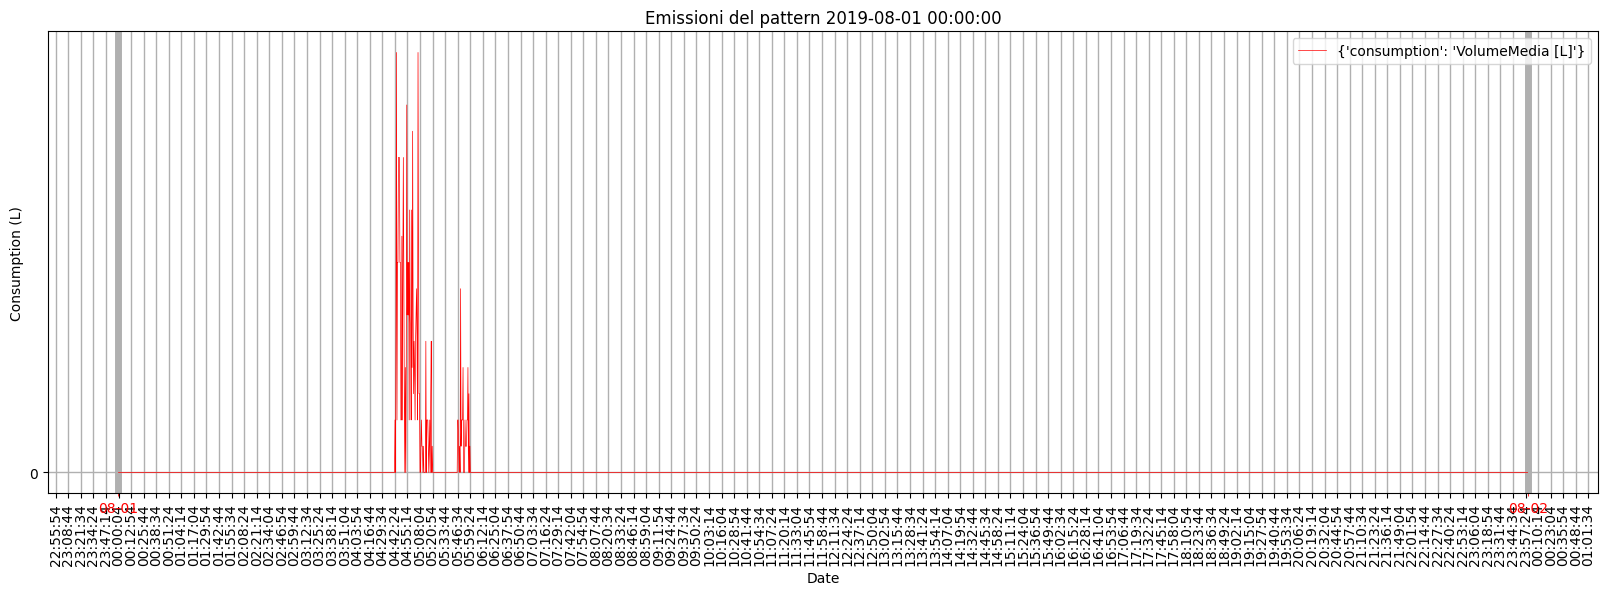

emissione giornaliera: 0

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 4616.25 min2: 4022.5434782608695 min3: 4403.163043478261
min_value per questo pattern: 4616.25
dove max1: 6155.0 max2: 5363.391304347826 max3: 5503.953804347826
max_value per questo pattern: 5363.391304347826
	emissione giornaliera: 5256

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L']

intervallo: [[14], [17], [40, 41], [67]]
divisione dell'emissioni in intervalli: [2325, 1484, [5, 742], 700]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1082, 1248, [2192, 398], 336]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1995, 1789, [34, 19], 1419]

DATAFRAME  COSTRUITO
	intervallo finale: [[14], [17], [40, 41], [67]]
	divisione finale dell'emissioni in intervalli: [1995, 1789, [34, 19], 1419]
	emissione totale giornaliera: 5256
	picco di emissione giornaliera: 4.2

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-0

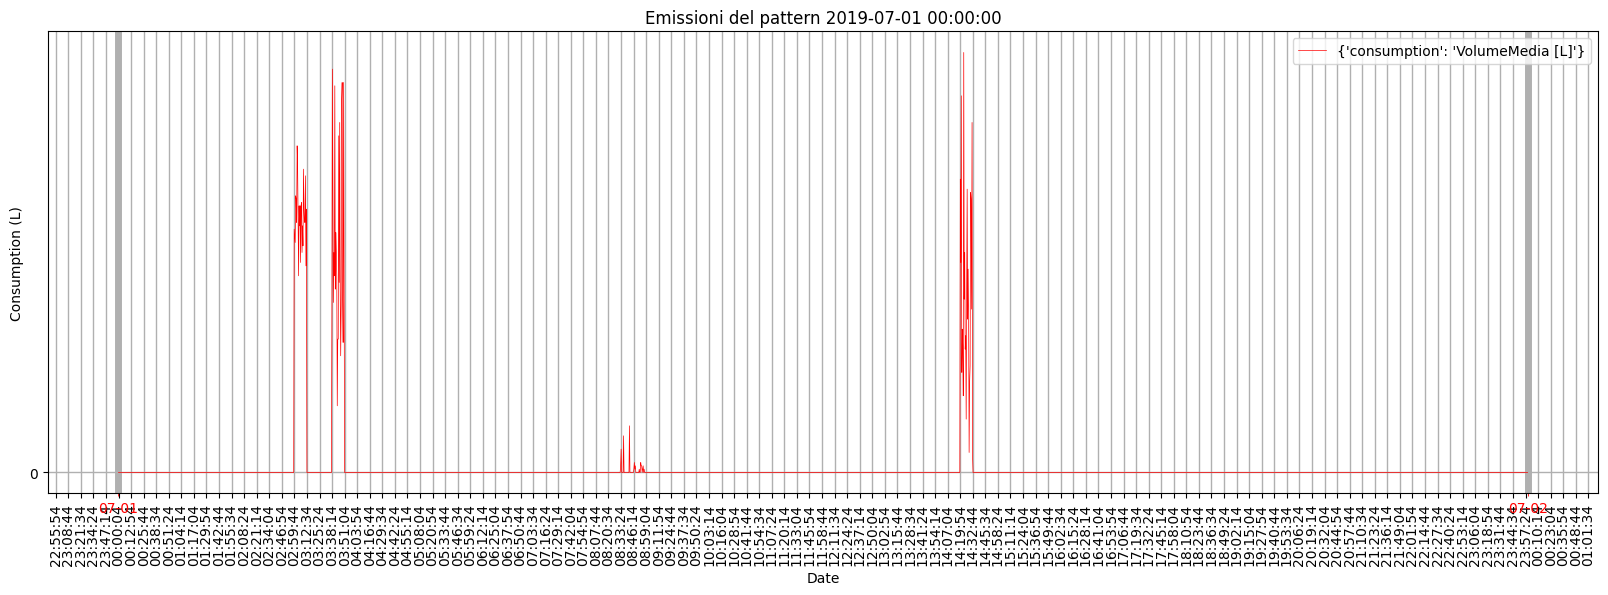

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 3
dove min1: 4616.25 min2: 4022.5434782608695 min3: 4403.163043478261
min_value per questo pattern: 4616.25
dove max1: 6155.0 max2: 5363.391304347826 max3: 5503.953804347826
max_value per questo pattern: 5363.391304347826
	emissione giornaliera: 4841

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PLP
spazi: ['L', 'L']

intervallo: [[45], [51, 52, 53, 54, 55, 56, 57], [100]]
divisione dell'emissioni in intervalli: [597, [194, 121, 380, 526, 718, 1015, 240], 1050]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [2454, [761, 331, 467, 129, 266, 3, 172], 258]

DATAFRAME  COSTRUITO
	intervallo finale: [[45], [51, 52, 53, 54, 55, 56, 57], [100]]
	divisione finale dell'emissioni in intervalli: [2454, [761, 331, 467, 129, 266, 3, 172], 258]
	emissione totale giornaliera: 4841
	picco di emissione giornaliera: 4.533333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07

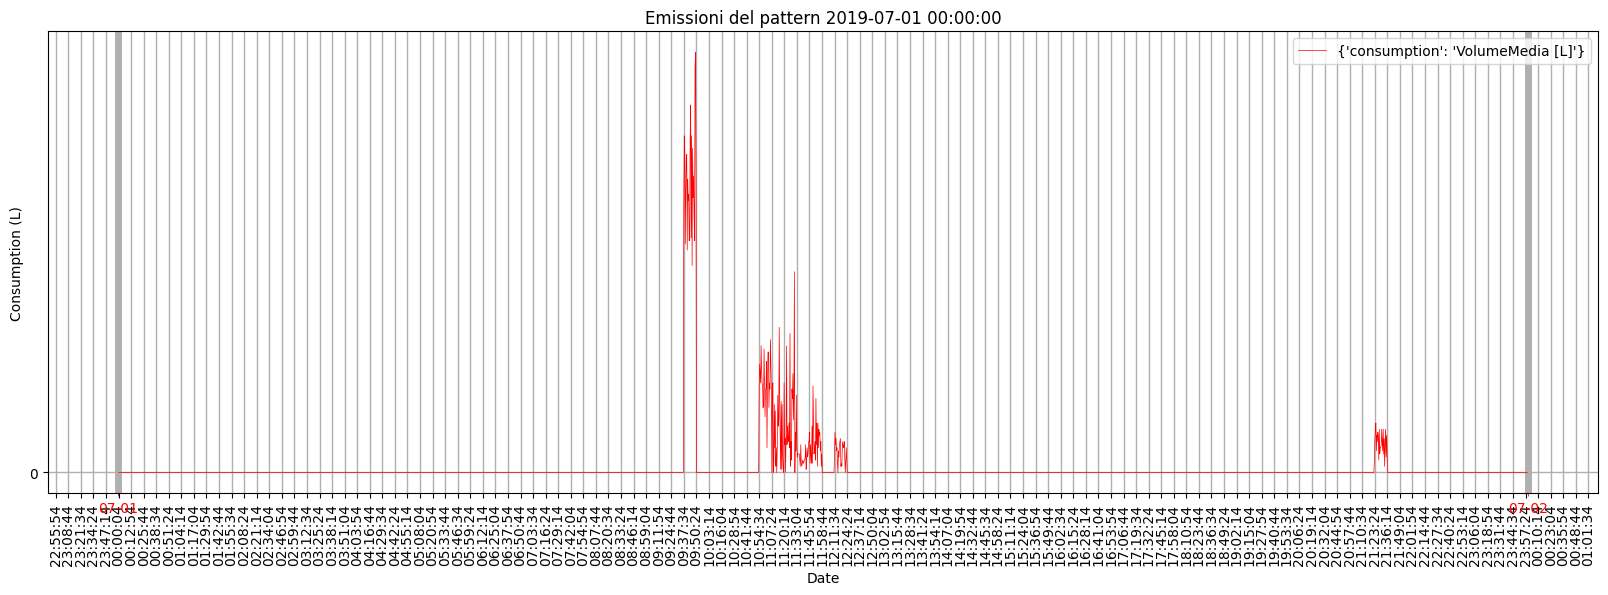

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 6155.0 min2: 6704.239130434782 min3: 6604.744565217392
min_value per questo pattern: 6704.239130434782
dove max1: 7693.75 max2: 8045.086956521739 max3: 7705.535326086957
max_value per questo pattern: 7693.75
	emissione giornaliera: 7051

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[21, 22], [53], [60], [68], [80], [105]]
divisione dell'emissioni in intervalli: [[364, 337], 911, 33, 1399, 2424, 1583]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[143, 272], 3873, 91, 2299, 9, 364]
debug temp esmissioni 2
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [[401, 1580], 18, 2953, 569, 708, 822]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [[561, 1614], 744, 642, 1872, 524, 1094]

DATAFRAME  COSTRUITO
	intervallo finale: [[21, 22], [53], [60], [68], [80], [105]]
	divisione finale dell'emissioni in interval

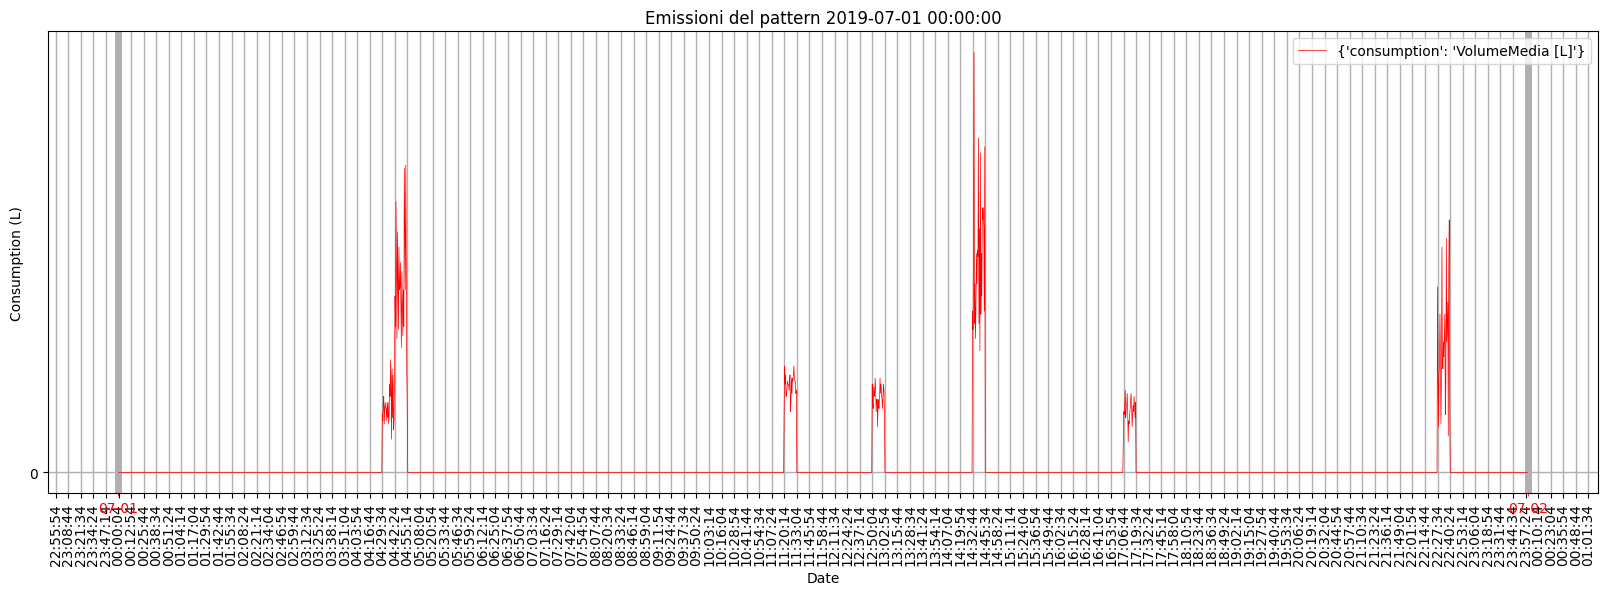

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 5
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 1538.75 max2: 1340.8478260869565 max3: 1100.7907608695652
max_value per questo pattern: 1100.7907608695652
	emissione giornaliera: 235

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'M', 'M']

intervallo: [[24], [48], [71], [74], [77]]
divisione dell'emissioni in intervalli: [66, 24, 41, 62, 42]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [13, 48, 35, 78, 61]

DATAFRAME  COSTRUITO
	intervallo finale: [[24], [48], [71], [74], [77]]
	divisione finale dell'emissioni in intervalli: [13, 48, 35, 78, 61]
	emissione totale giornaliera: 235
	picco di emissione giornaliera: 0.7333333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 05:08:00', freq='770S'), Timestamp('2019-07-01 05:20:50', freq='770S'), 1), (Timestamp('2019-07-01 10:16:00', freq='770S'), Timestamp('2019-07-01 10:28:50', freq

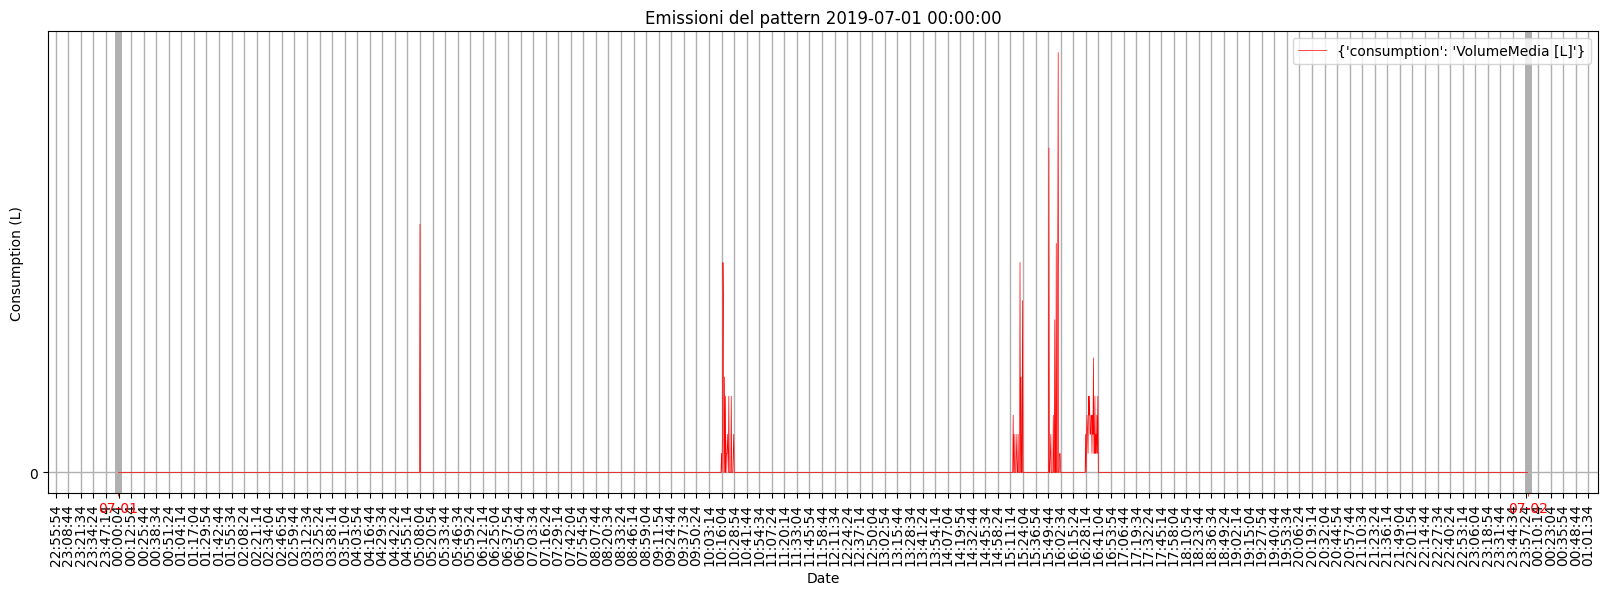

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 4616.25 min2: 4022.5434782608695 min3: 4403.163043478261
min_value per questo pattern: 4616.25
dove max1: 6155.0 max2: 5363.391304347826 max3: 5503.953804347826
max_value per questo pattern: 5363.391304347826
	emissione giornaliera: 5308

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'M']

intervallo: [[8], [73], [80], [84]]
divisione dell'emissioni in intervalli: [2032, 859, 2212, 205]

DATAFRAME  COSTRUITO
	intervallo finale: [[8], [73], [80], [84]]
	divisione finale dell'emissioni in intervalli: [2032, 859, 2212, 205]
	emissione totale giornaliera: 5308
	picco di emissione giornaliera: 4.233333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 01:42:40', freq='770S'), Timestamp('2019-07-01 01:55:30', freq='770S'), 1), (Timestamp('2019-07-01 15:36:50', freq='770S'), Timestamp('2019-07-01 15:49:40', freq='770S'), 1), (Timestamp('2019-07-01 17:06:40', freq='770S

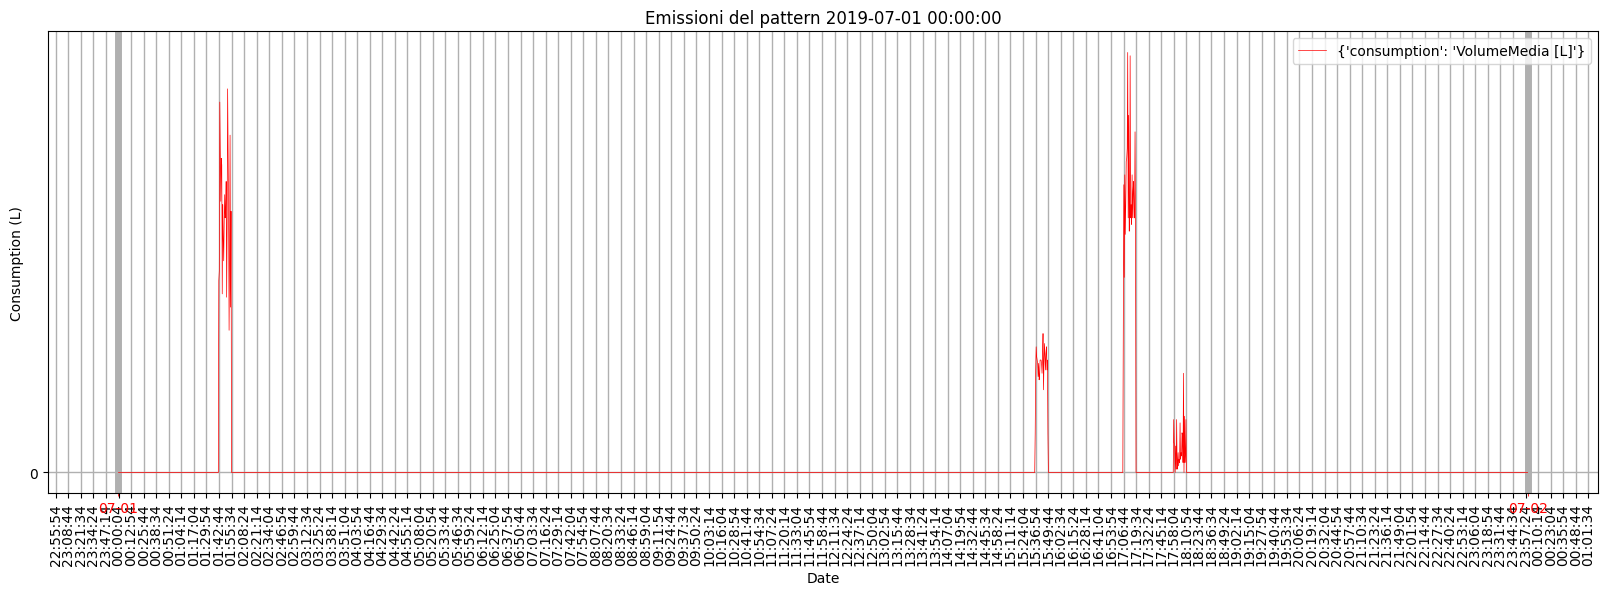

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 4
dove min1: 3077.5 min2: 2681.695652173913 min3: 3302.372282608696
min_value per questo pattern: 3302.372282608696
dove max1: 4616.25 max2: 4022.5434782608695 max3: 4403.163043478261
max_value per questo pattern: 4022.5434782608695
	emissione giornaliera: 3387

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L']

intervallo: [[16], [52], [54], [89]]
divisione dell'emissioni in intervalli: [1102, 803, 980, 502]

DATAFRAME  COSTRUITO
	intervallo finale: [[16], [52], [54], [89]]
	divisione finale dell'emissioni in intervalli: [1102, 803, 980, 502]
	emissione totale giornaliera: 3387
	picco di emissione giornaliera: 3.6666666666666665

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 03:25:20', freq='770S'), Timestamp('2019-07-01 03:38:10', freq='770S'), 1), (Timestamp('2019-07-01 11:07:20', freq='770S'), Timestamp('2019-07-01 11:20:10', freq='770S'), 1), (Timestamp('2019-07-01 11:33:00'

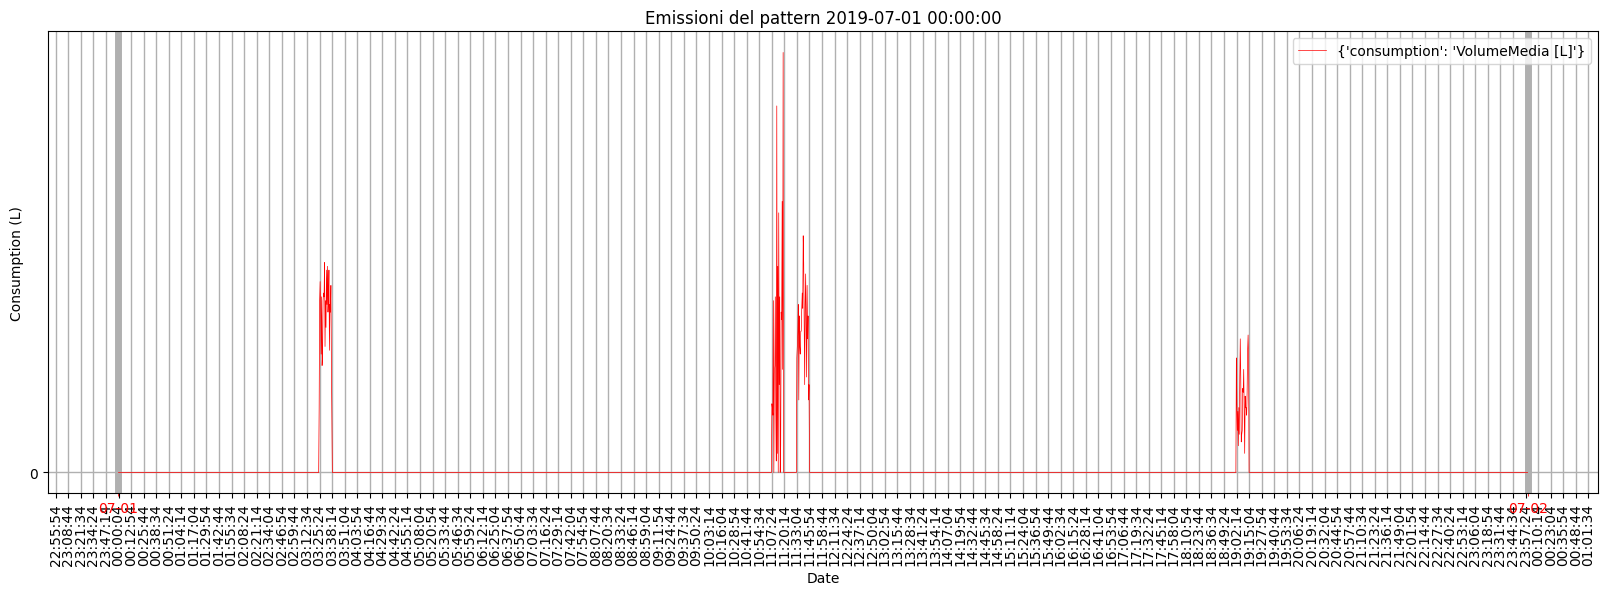

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 10
dove min1: 10771.25 min2: 9385.934782608696 min3: 7705.535326086957
min_value per questo pattern: 10771.25
dove max1: 18465.0 max2: 26816.95652173913 max3: 13209.489130434784
max_value per questo pattern: 13209.489130434784
	emissione giornaliera: 12162

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'L', 'P', 'L', 'L', 'M', 'P']

intervallo: [[4], [7], [14, 15], [20], [38], [40], [65], [92], [95], [97]]
divisione dell'emissioni in intervalli: [1842, 1033, [60, 183], 34, 29, 1945, 431, 479, 981, 5145]

DATAFRAME  COSTRUITO
	intervallo finale: [[4], [7], [14, 15], [20], [38], [40], [65], [92], [95], [97]]
	divisione finale dell'emissioni in intervalli: [1842, 1033, [60, 183], 34, 29, 1945, 431, 479, 981, 5145]
	emissione totale giornaliera: 12162
	picco di emissione giornaliera: 10.4

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 00:51:20', freq='770S'), Timestamp('2019-07-0

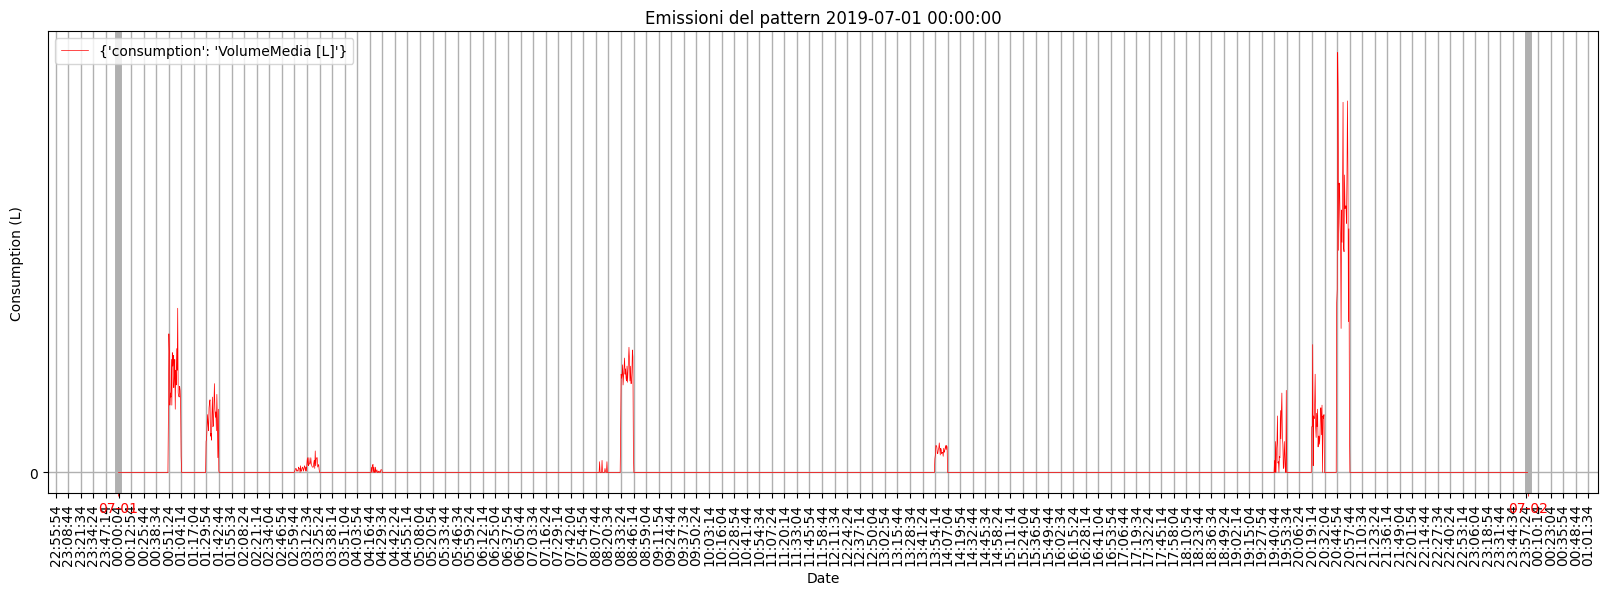

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 2
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 1538.75 max2: 1340.8478260869565 max3: 1100.7907608695652
max_value per questo pattern: 1100.7907608695652
	emissione giornaliera: 823

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: MP
spazi: ['L']

intervallo: [[33, 34], [59]]
divisione dell'emissioni in intervalli: [[170, 422], 231]

DATAFRAME  COSTRUITO
	intervallo finale: [[33, 34], [59]]
	divisione finale dell'emissioni in intervalli: [[170, 422], 231]
	emissione totale giornaliera: 823
	picco di emissione giornaliera: 0.9666666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 07:03:30', freq='770S'), Timestamp('2019-07-01 07:29:10', freq='770S'), 2), (Timestamp('2019-07-01 12:37:10', freq='770S'), Timestamp('2019-07-01 12:50:00', freq='770S'), 1)]
	spazi: lungo=1 medio=0 piccolo=0

	pattern identici: CAMALA2MP_S0


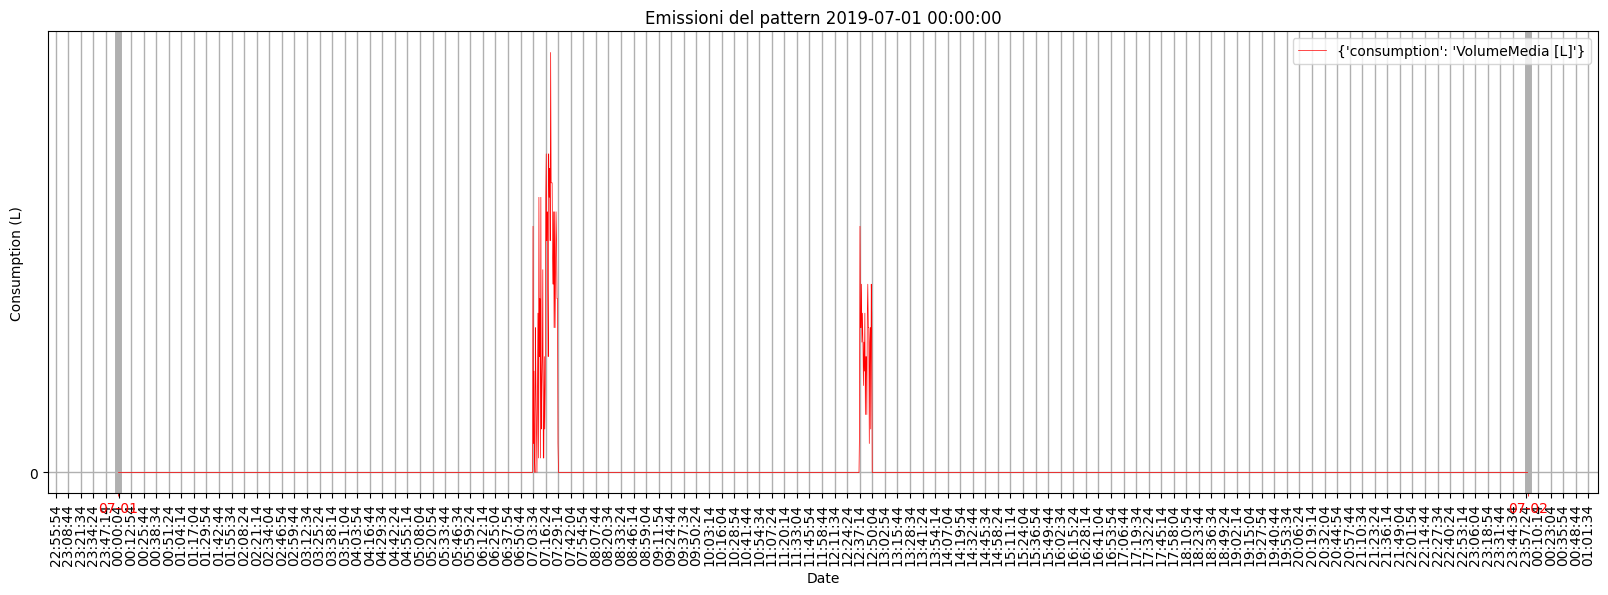

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1a
	numero di intervalli: 7
dove min1: 4616.25 min2: 5363.391304347826 min3: 5503.953804347826
min_value per questo pattern: 5503.953804347826
dove max1: 6155.0 max2: 6704.239130434782 max3: 6604.744565217392
max_value per questo pattern: 6155.0
	emissione giornaliera: 5886

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'M', 'L', 'L', 'L']

intervallo: [[5], [17], [26], [30], [42], [101], [107]]
divisione dell'emissioni in intervalli: [345, 2, 399, 705, 769, 632, 3034]

DATAFRAME  COSTRUITO
	intervallo finale: [[5], [17], [26], [30], [42], [101], [107]]
	divisione finale dell'emissioni in intervalli: [345, 2, 399, 705, 769, 632, 3034]
	emissione totale giornaliera: 5886
	picco di emissione giornaliera: 5.866666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 01:04:10', freq='770S'), Timestamp('2019-07-01 01:17:00', freq='770S'), 1), (Timestamp('2019-07-01 03:38:10', freq='770S'), Timestamp('2019-07

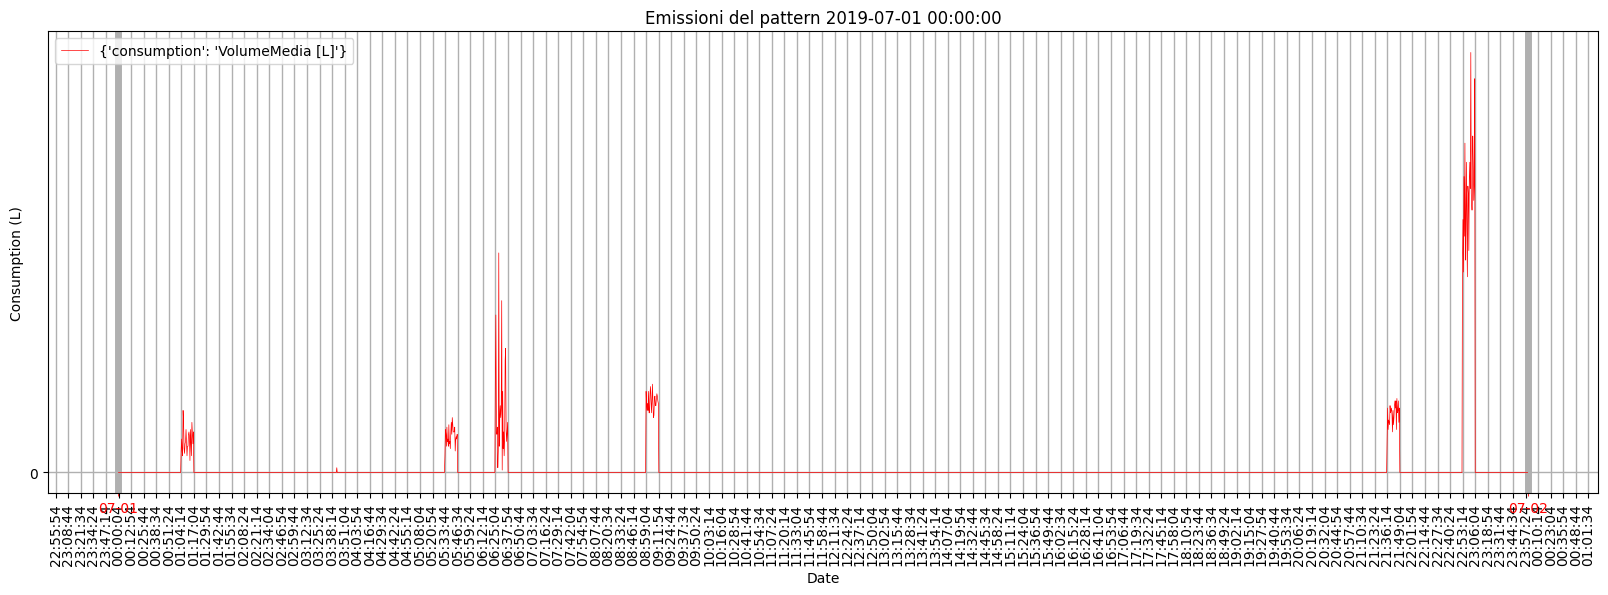

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 4
dove min1: 3077.5 min2: 4022.5434782608695 min3: 3302.372282608696
min_value per questo pattern: 4022.5434782608695
dove max1: 4616.25 max2: 5363.391304347826 max3: 4403.163043478261
max_value per questo pattern: 4403.163043478261
	emissione giornaliera: 4315

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'L', 'L']

intervallo: [[20], [22], [89], [96]]
divisione dell'emissioni in intervalli: [3253, 546, 364, 152]

DATAFRAME  COSTRUITO
	intervallo finale: [[20], [22], [89], [96]]
	divisione finale dell'emissioni in intervalli: [3253, 546, 364, 152]
	emissione totale giornaliera: 4315
	picco di emissione giornaliera: 5.9

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 04:16:40', freq='770S'), Timestamp('2019-07-01 04:29:30', freq='770S'), 1), (Timestamp('2019-07-01 04:42:20', freq='770S'), Timestamp('2019-07-01 04:55:10', freq='770S'), 1), (Timestamp('2019-07-01 19:02:10', freq='770S'),

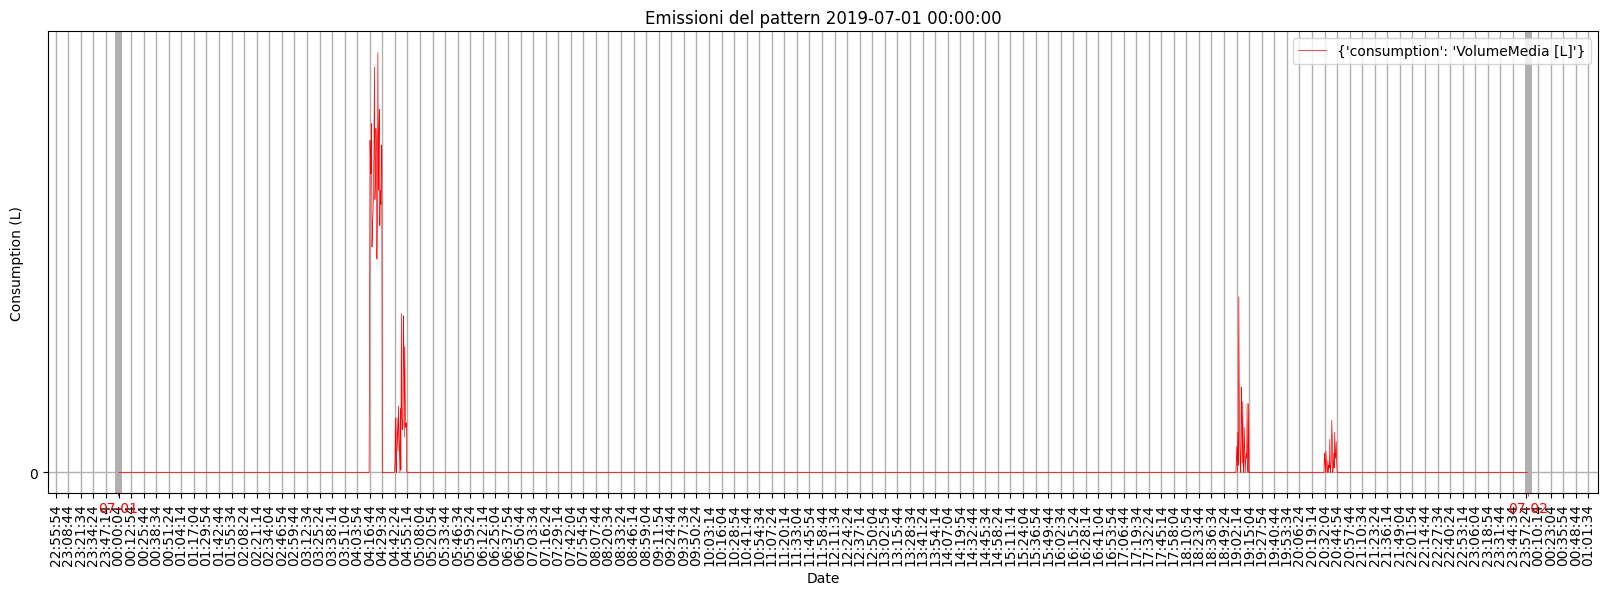

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 7693.75 min2: 8045.086956521739 min3: 7705.535326086957
min_value per questo pattern: 8045.086956521739
dove max1: 9232.5 max2: 9385.934782608696 max3: 8806.326086956522
max_value per questo pattern: 8806.326086956522
	emissione giornaliera: 8313

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L']

intervallo: [[4], [7], [62], [72]]
divisione dell'emissioni in intervalli: [4961, 1553, 280, 1519]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2418, 2500, 1202, 2193]

DATAFRAME  COSTRUITO
	intervallo finale: [[4], [7], [62], [72]]
	divisione finale dell'emissioni in intervalli: [2418, 2500, 1202, 2193]
	emissione totale giornaliera: 8313
	picco di emissione giornaliera: 6.133333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 00:51:20', freq='770S'), Timestamp('2019-07-01 01:04:10', freq='770S'), 1), (Timestamp('2019-07-01 01:29:50', freq='770S

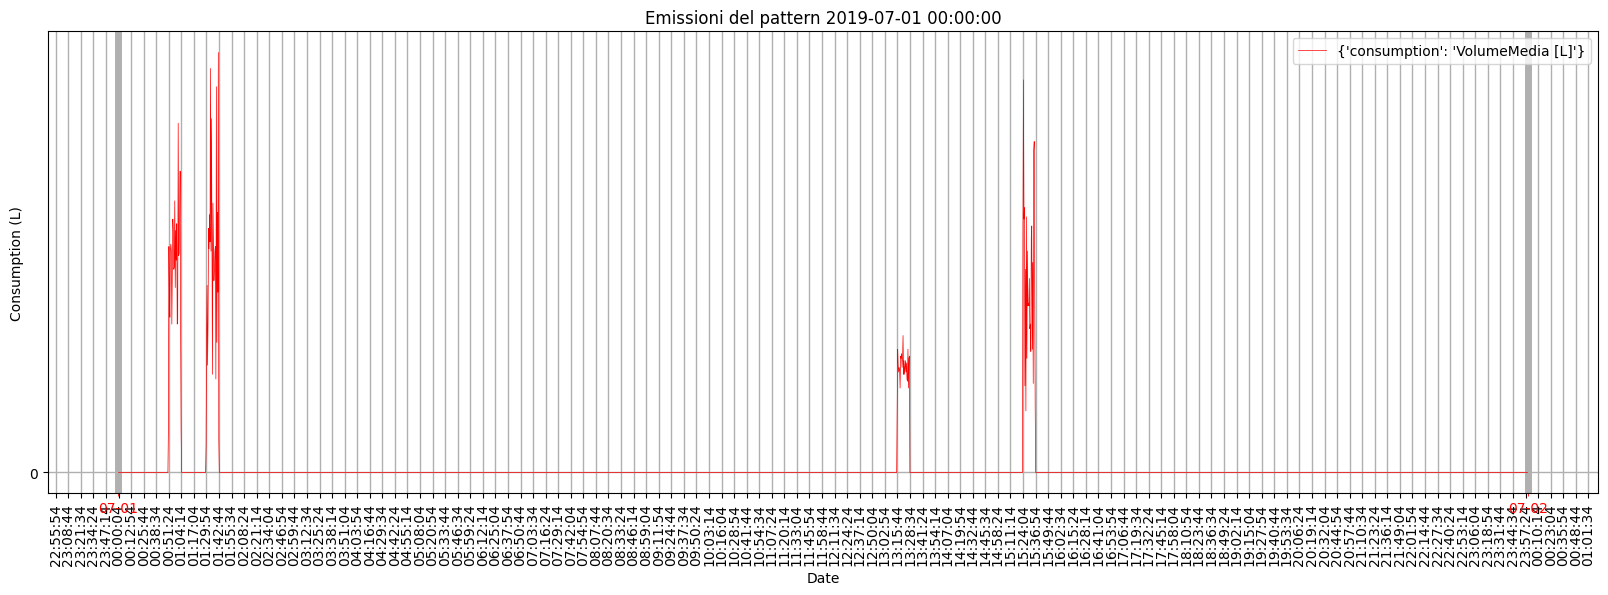

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: M1c
	numero di intervalli: 4
dove min1: 3077.5 min2: 4022.5434782608695 min3: 3302.372282608696
min_value per questo pattern: 4022.5434782608695
dove max1: 4616.25 max2: 5363.391304347826 max3: 4403.163043478261
max_value per questo pattern: 4403.163043478261
	emissione giornaliera: 4305

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'M']

intervallo: [[40], [62], [64], [68]]
divisione dell'emissioni in intervalli: [1609, 65, 2279, 352]

DATAFRAME  COSTRUITO
	intervallo finale: [[40], [62], [64], [68]]
	divisione finale dell'emissioni in intervalli: [1609, 65, 2279, 352]
	emissione totale giornaliera: 4305
	picco di emissione giornaliera: 3.9

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 08:33:20', freq='770S'), Timestamp('2019-07-01 08:46:10', freq='770S'), 1), (Timestamp('2019-07-01 13:15:40', freq='770S'), Timestamp('2019-07-01 13:28:30', freq='770S'), 1), (Timestamp('2019-07-01 13:41:20', freq='770S'),

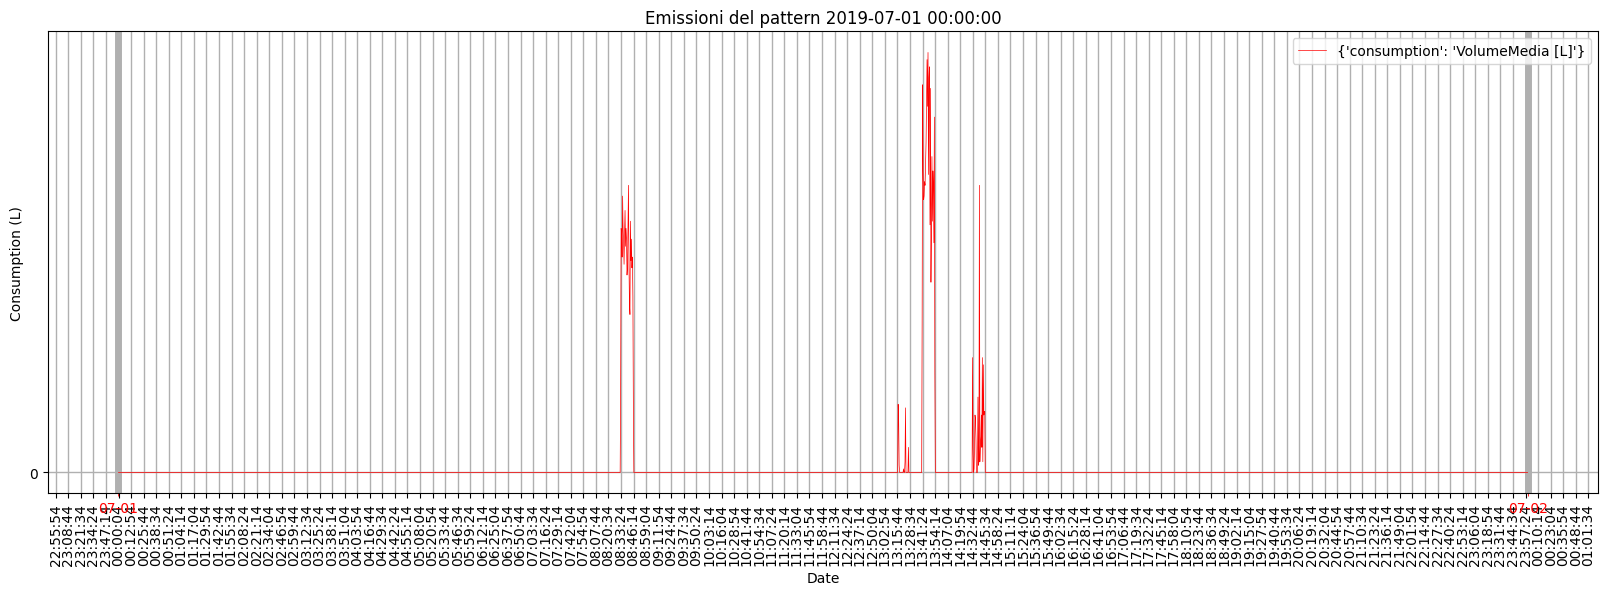

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 4
dove min1: 3077.5 min2: 4022.5434782608695 min3: 3302.372282608696
min_value per questo pattern: 4022.5434782608695
dove max1: 4616.25 max2: 5363.391304347826 max3: 4403.163043478261
max_value per questo pattern: 4403.163043478261
	emissione giornaliera: 4201

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L']

intervallo: [[9], [37], [39], [100]]
divisione dell'emissioni in intervalli: [1102, 284, 2101, 714]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2209, 815, 998, 179]
non rispetta und_value
divisione dell'emissioni in intervalli: [934, 1444, 490, 1333]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1604, 890, 481, 1226]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [7, 82, 3273, 839]
debug temp esmissioni 1
tentativo
spazi: ['L', 'P', 'L']

intervallo: [[55], [93], [95], [105]]
divisione dell'emissioni in intervalli: [58, 143, 1510

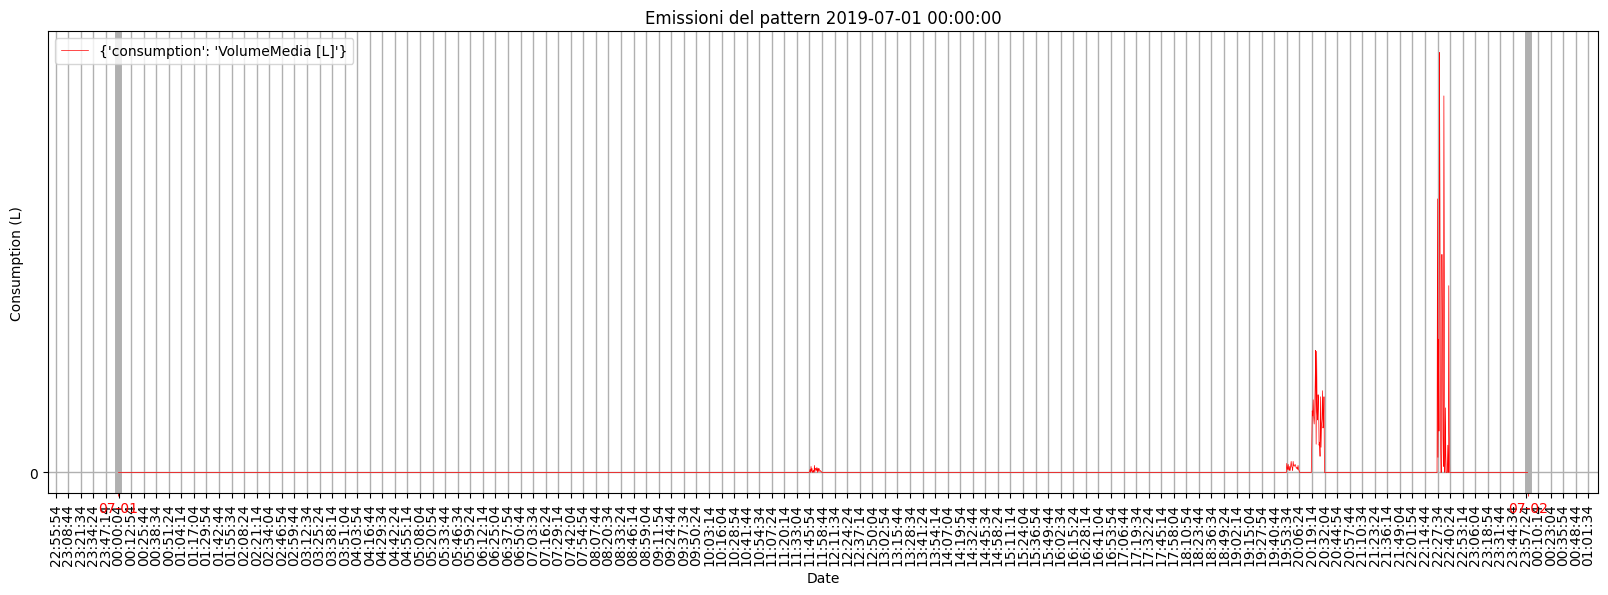

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 2
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 1538.75 max2: 1340.8478260869565 max3: 1100.7907608695652
max_value per questo pattern: 1100.7907608695652
	emissione giornaliera: 524

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: MP
spazi: ['L']

intervallo: [[75, 76, 77], [88]]
divisione dell'emissioni in intervalli: [[217, 6, 267], 34]

DATAFRAME  COSTRUITO
	intervallo finale: [[75, 76, 77], [88]]
	divisione finale dell'emissioni in intervalli: [[217, 6, 267], 34]
	emissione totale giornaliera: 524
	picco di emissione giornaliera: 3.033333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-07-01 16:02:30', freq='770S'), Timestamp('2019-07-01 16:41:00', freq='770S'), 3), (Timestamp('2019-07-01 18:49:20', freq='770S'), Timestamp('2019-07-01 19:02:10', freq='770S'), 1)]
	spazi: lungo=1 medio=0 piccolo=0

	pattern identici: CAMALA2MP_S0


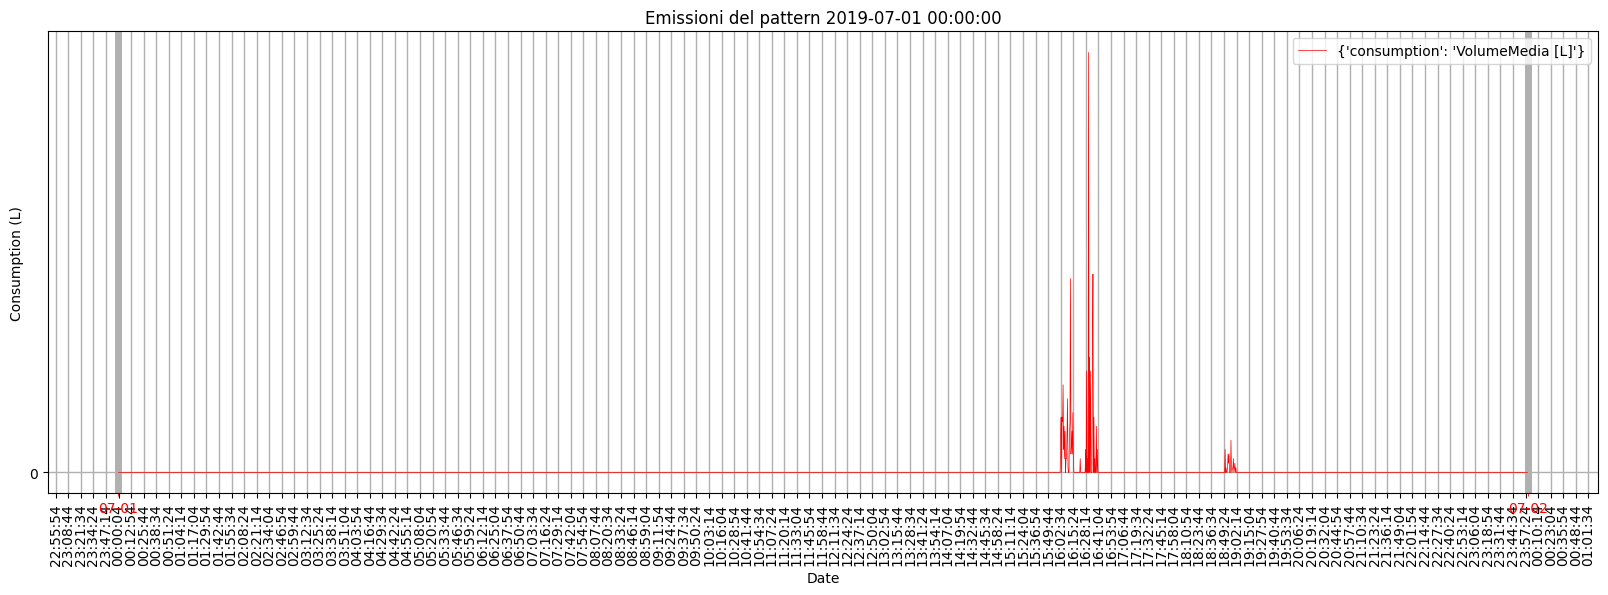

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 11073.5 min2: 12469.491758241758 min3: 12211.084254143647
min_value per questo pattern: 12469.491758241758
dove max1: 13288.199999999999 max2: 14963.390109890111 max3: 34888.812154696134
max_value per questo pattern: 13288.199999999999
	emissione giornaliera: 13078

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[23], [30], [36], [43, 44], [52], [98]]
divisione dell'emissioni in intervalli: [149, 2766, 1990, [762, 686], 1754, 4971]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [1270, 3924, 1861, [663, 953], 2928, 1479]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [7544, 3522, 95, [281, 886], 260, 490]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2040, 6623, 1985, [2, 3], 1761, 664]

DATAFRAME  COSTRUITO
	intervallo finale: [[23], [30], [36], [43, 44], [52], [98]]
	divisione finale dell'emissioni in 

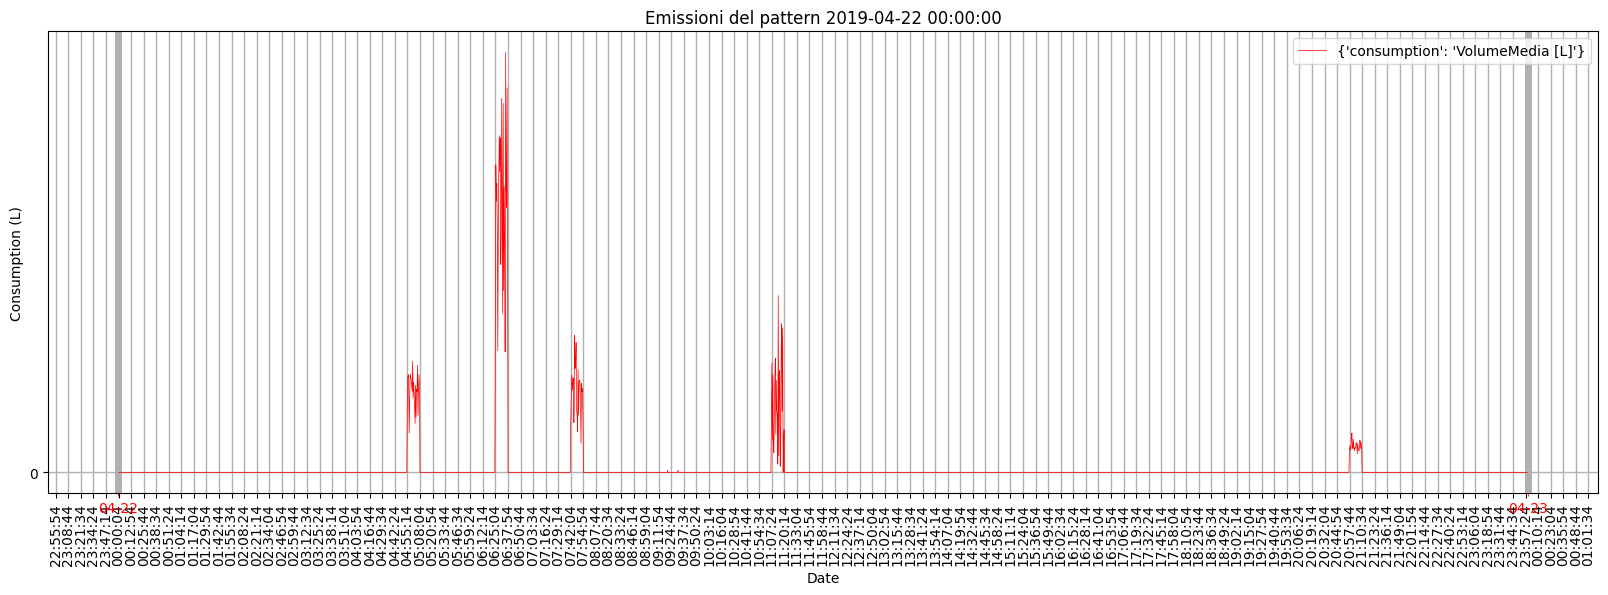

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: M1b
	numero di intervalli: 9
dove min1: 15502.899999999998 min2: 17457.28846153846 min3: 12211.084254143647
min_value per questo pattern: 17457.28846153846
dove max1: 44294.0 max2: 29926.780219780223 max3: 34888.812154696134
max_value per questo pattern: 29926.780219780223
	emissione giornaliera: 24004

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'P', 'M', 'L', 'M', 'L', 'M']

intervallo: [[3], [6], [13], [15], [19, 20], [54], [58], [71], [74, 75, 76]]
divisione dell'emissioni in intervalli: [201, 1518, 2833, 11230, [1633, 2142], 786, 1644, 600, [128, 41, 1248]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [863, 5747, 858, 902, [1327, 414], 7948, 3231, 747, [287, 1379, 301]]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2057, 3114, 4739, 3381, [1911, 1036], 734, 3927, 695, [1480, 397, 533]]

DATAFRAME  COSTRUITO
	intervallo finale: [[3], [6], [13], [15], [19, 20], [54], [58], [71],

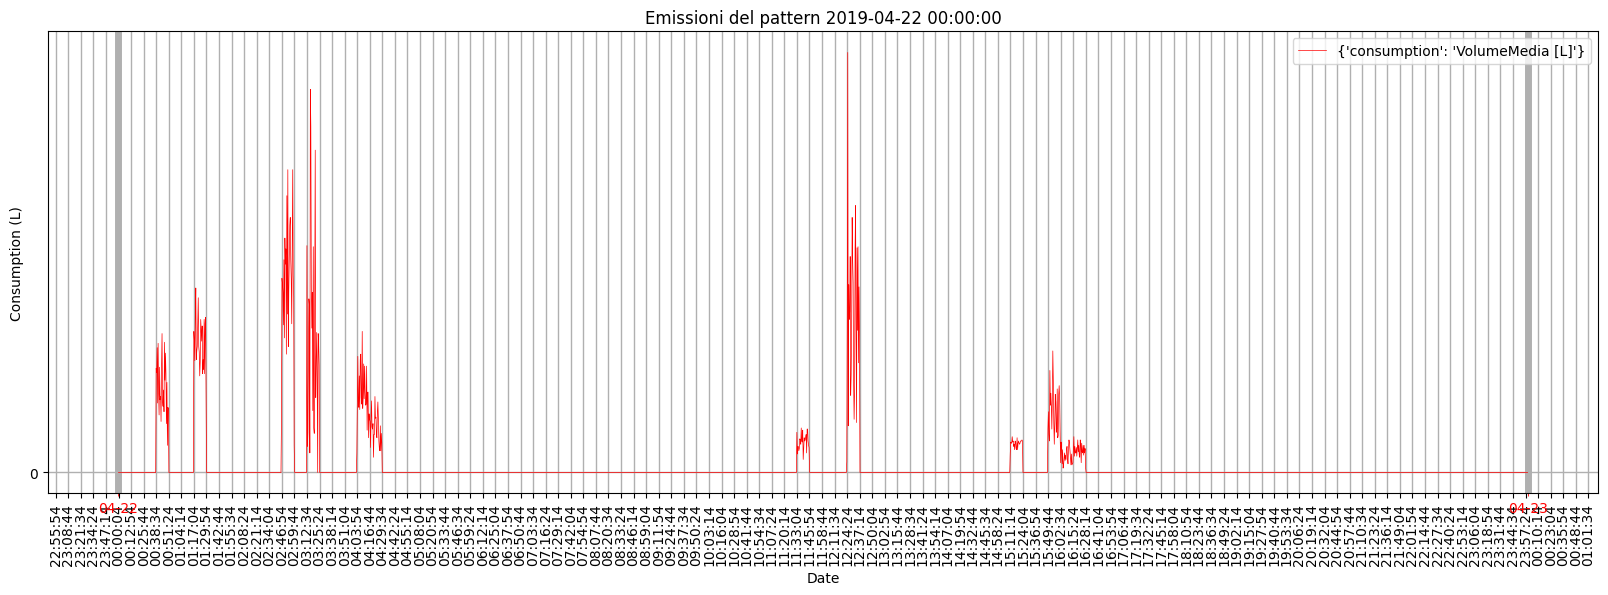

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2214.7 max2: 2493.8983516483518 max3: 1744.4406077348067
max_value per questo pattern: 1744.4406077348067
	emissione giornaliera: 307

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[35, 36]]
divisione dell'emissioni in intervalli: [[215, 92]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[60, 247]]

DATAFRAME  COSTRUITO
	intervallo finale: [[35, 36]]
	divisione finale dell'emissioni in intervalli: [[60, 247]]
	emissione totale giornaliera: 307
	picco di emissione giornaliera: 1.5

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-22 07:29:10', freq='770S'), Timestamp('2019-04-22 07:54:50', freq='770S'), 2)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CAMALA1M_S0


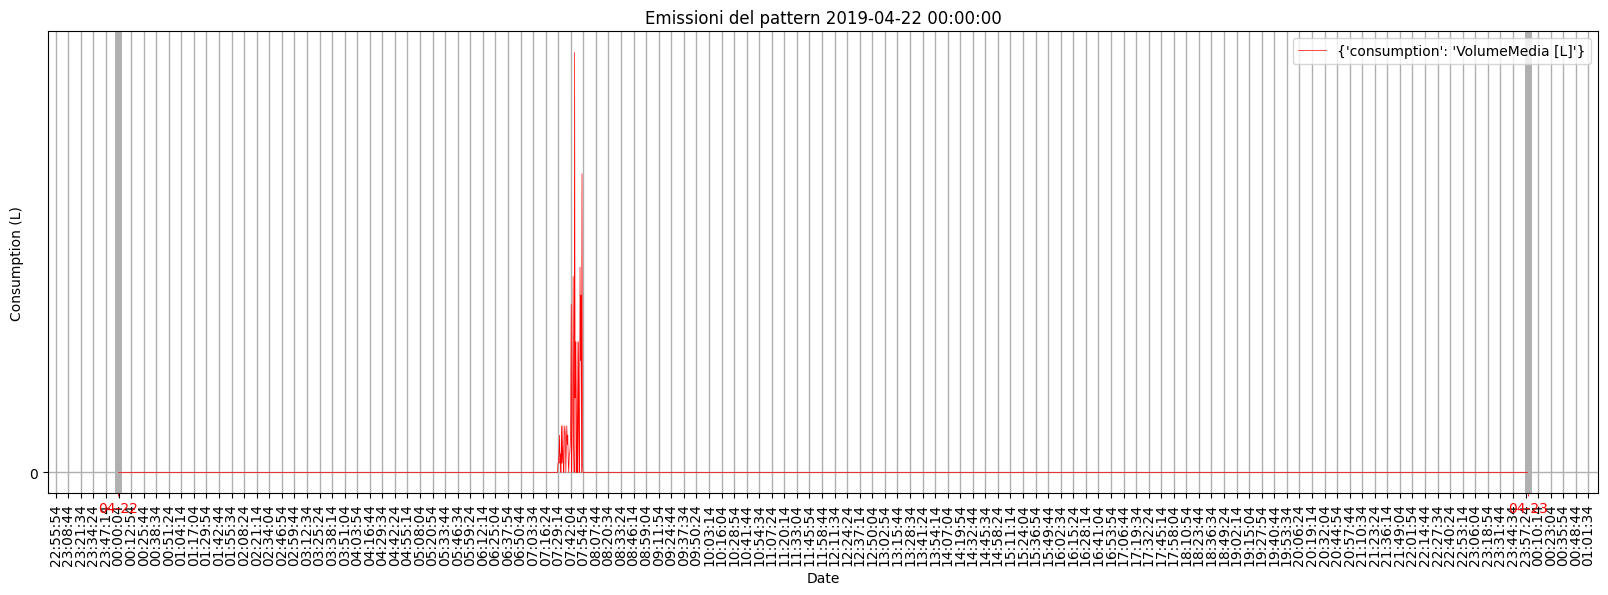

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2214.7 max2: 2493.8983516483518 max3: 1744.4406077348067
max_value per questo pattern: 1744.4406077348067
	emissione giornaliera: 57

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[10, 11, 12]]
divisione dell'emissioni in intervalli: [[3, 38, 16]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[13, 5, 39]]

DATAFRAME  COSTRUITO
	intervallo finale: [[10, 11, 12]]
	divisione finale dell'emissioni in intervalli: [[13, 5, 39]]
	emissione totale giornaliera: 57
	picco di emissione giornaliera: 0.23333333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-22 02:08:20', freq='770S'), Timestamp('2019-04-22 02:46:50', freq='770S'), 3)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CAMALA1M_S0


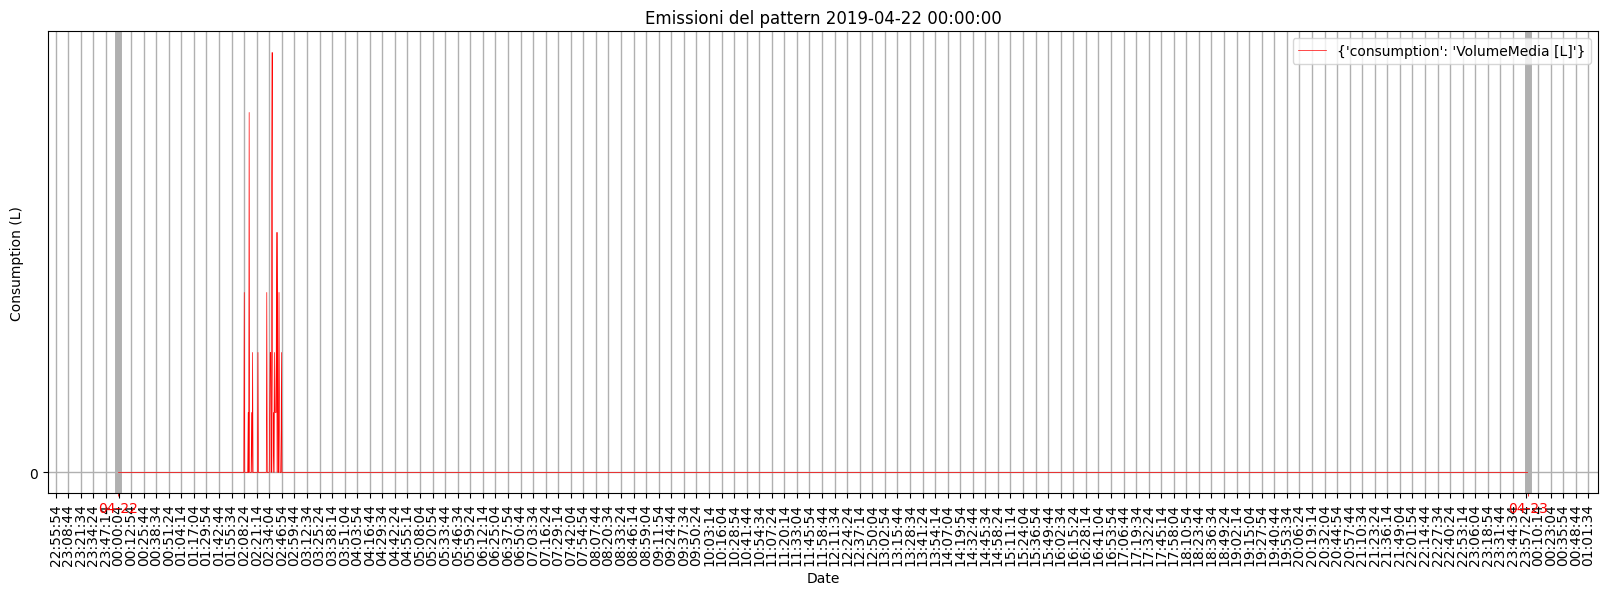

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 7
dove min1: 6644.099999999999 min2: 7481.695054945056 min3: 6977.762430939227
min_value per questo pattern: 7481.695054945056
dove max1: 8858.8 max2: 9975.593406593407 max3: 8722.203038674033
max_value per questo pattern: 8722.203038674033
	emissione giornaliera: 8003

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'L', 'L', 'P']

intervallo: [[2], [6], [16], [32], [47, 48], [85], [87]]
divisione dell'emissioni in intervalli: [1857, 263, 1121, 1539, [75, 367], 875, 1906]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [910, 1275, 974, 100, [52, 27], 151, 4514]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [584, 660, 3023, 56, [187, 246], 589, 2658]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [92, 1157, 1977, 369, [818, 68], 951, 2571]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [585, 919, 1984, 613, [167, 61], 2029, 

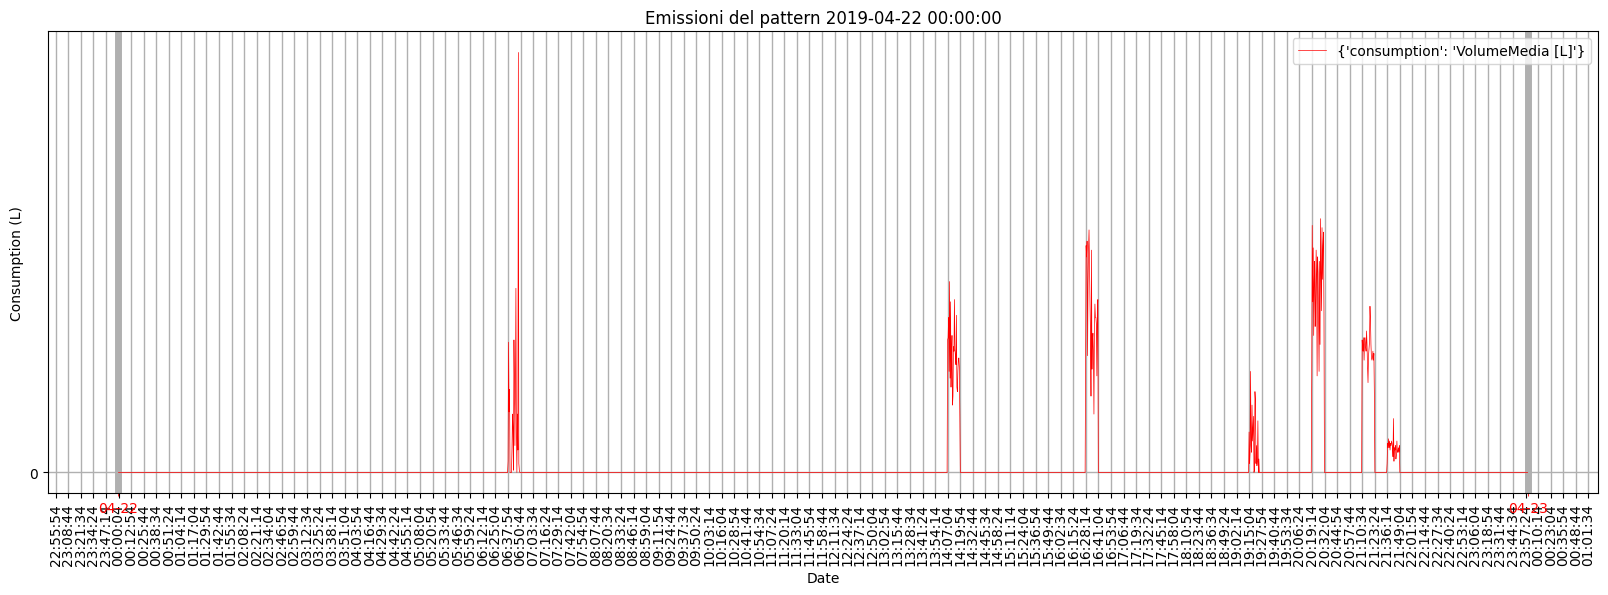

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 7
dove min1: 15502.899999999998 min2: 14963.390109890111 min3: 12211.084254143647
min_value per questo pattern: 15502.899999999998
dove max1: 44294.0 max2: 17457.28846153846 max3: 34888.812154696134
max_value per questo pattern: 17457.28846153846
	emissione giornaliera: 16382

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'P', 'M', 'L', 'L']

intervallo: [[16], [29], [41], [43], [47], [96], [101]]
divisione dell'emissioni in intervalli: [1378, 1913, 3836, 2944, 4169, 603, 1539]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [7588, 4212, 919, 818, 741, 1390, 714]

DATAFRAME  COSTRUITO
	intervallo finale: [[16], [29], [41], [43], [47], [96], [101]]
	divisione finale dell'emissioni in intervalli: [7588, 4212, 919, 818, 741, 1390, 714]
	emissione totale giornaliera: 16382
	picco di emissione giornaliera: 14.6

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-22 03:25:20', f

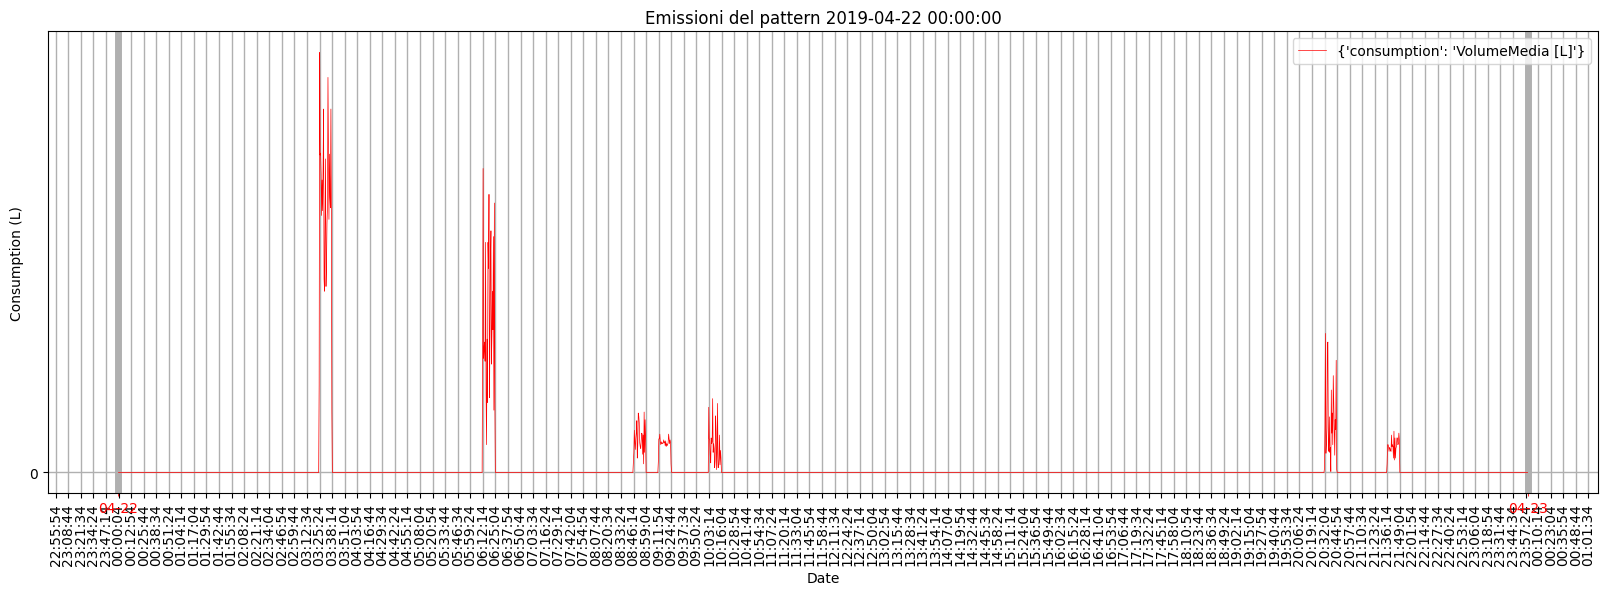

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 7
dove min1: 4429.4 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6644.099999999999 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6644.099999999999
	emissione giornaliera: 6342

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'L', 'L', 'M', 'L', 'L']

intervallo: [[5], [7], [61], [68], [71], [105], [111]]
divisione dell'emissioni in intervalli: [213, 586, 1281, 1591, 745, 148, 1778]

DATAFRAME  COSTRUITO
	intervallo finale: [[5], [7], [61], [68], [71], [105], [111]]
	divisione finale dell'emissioni in intervalli: [213, 586, 1281, 1591, 745, 148, 1778]
	emissione totale giornaliera: 6342
	picco di emissione giornaliera: 3.3

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-22 01:04:10', freq='770S'), Timestamp('2019-04-22 01:17:00', freq='770S'), 1), (Timestamp('2019-04-22 01:29:50', freq='770S'), Timest

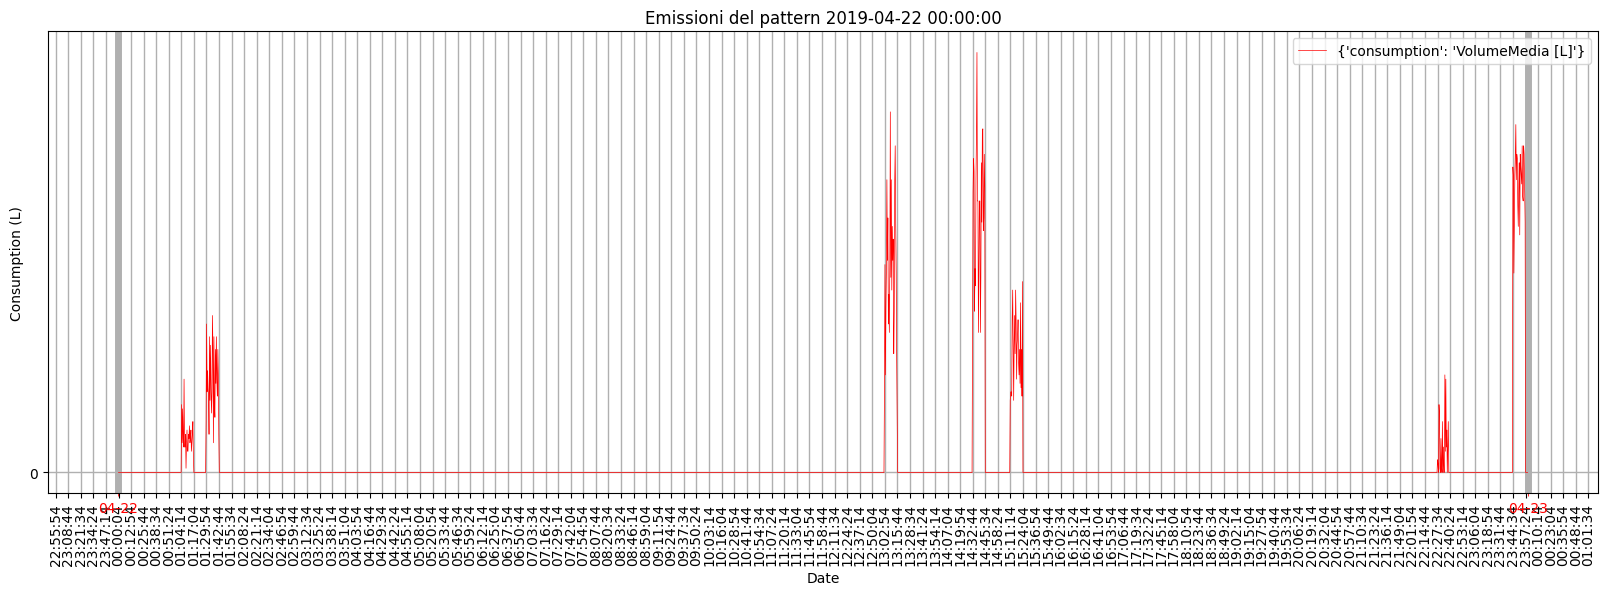

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: M1c
	numero di intervalli: 16
dove min1: 4972.766129032258 min2: 9385.934782608696 min3: 7705.535326086957
min_value per questo pattern: 9385.934782608696
dove max1: 17049.483870967742 max2: 16090.173913043478 max3: 22015.815217391304
max_value per questo pattern: 16090.173913043478
	emissione giornaliera: 11860

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'M', 'M', 'P', 'L', 'P', 'L', 'M', 'M', 'L', 'L', 'M', 'P', 'M', 'L']

intervallo: [[3], [17, 18], [22], [26], [28], [40, 41], [43], [61, 62, 63], [66, 67], [70], [78, 79], [85], [89], [91, 92], [95], [102]]
divisione dell'emissioni in intervalli: [90, [159, 526], 819, 359, 97, [240, 629], 249, [762, 234, 230], [191, 41], 452, [1, 625], 2528, 899, [386, 22], 27, 2294]
debug temp esmissioni 2
debug temp esmissioni 2
errore div emissioni 
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [3008, [177, 550], 224, 281, 390, [123, 60], 1025, [52, 350, 332], [631, 

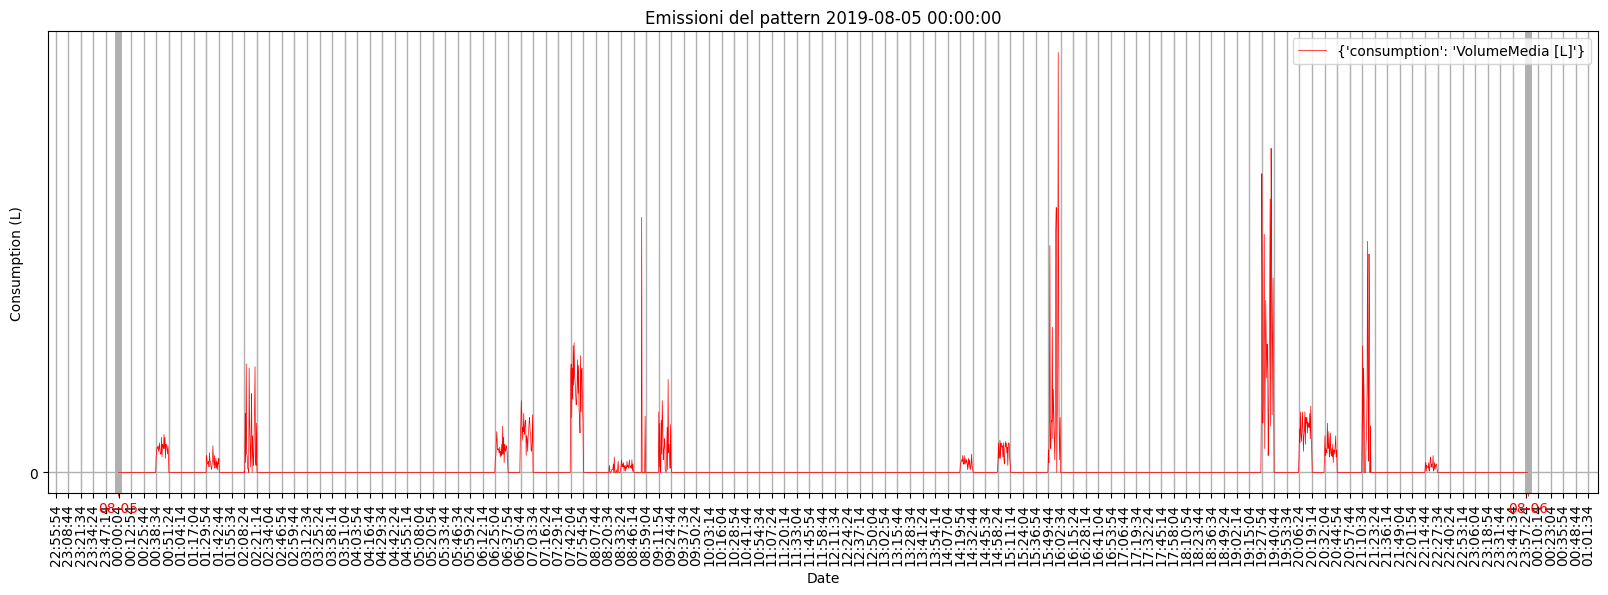

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 5
dove min1: 2131.185483870968 min2: 1340.8478260869565 min3: 2201.5815217391305
min_value per questo pattern: 2201.5815217391305
dove max1: 2841.5806451612902 max2: 2681.695652173913 max3: 3302.372282608696
max_value per questo pattern: 2681.695652173913
	emissione giornaliera: 2445

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L']

intervallo: [[32], [56], [79], [86], [96]]
divisione dell'emissioni in intervalli: [820, 448, 727, 259, 191]

DATAFRAME  COSTRUITO
	intervallo finale: [[32], [56], [79], [86], [96]]
	divisione finale dell'emissioni in intervalli: [820, 448, 727, 259, 191]
	emissione totale giornaliera: 2445
	picco di emissione giornaliera: 4.333333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-05 06:50:40', freq='770S'), Timestamp('2019-08-05 07:03:30', freq='770S'), 1), (Timestamp('2019-08-05 11:58:40', freq='770S'), Timestamp('2019-08-05 12:11:30', freq

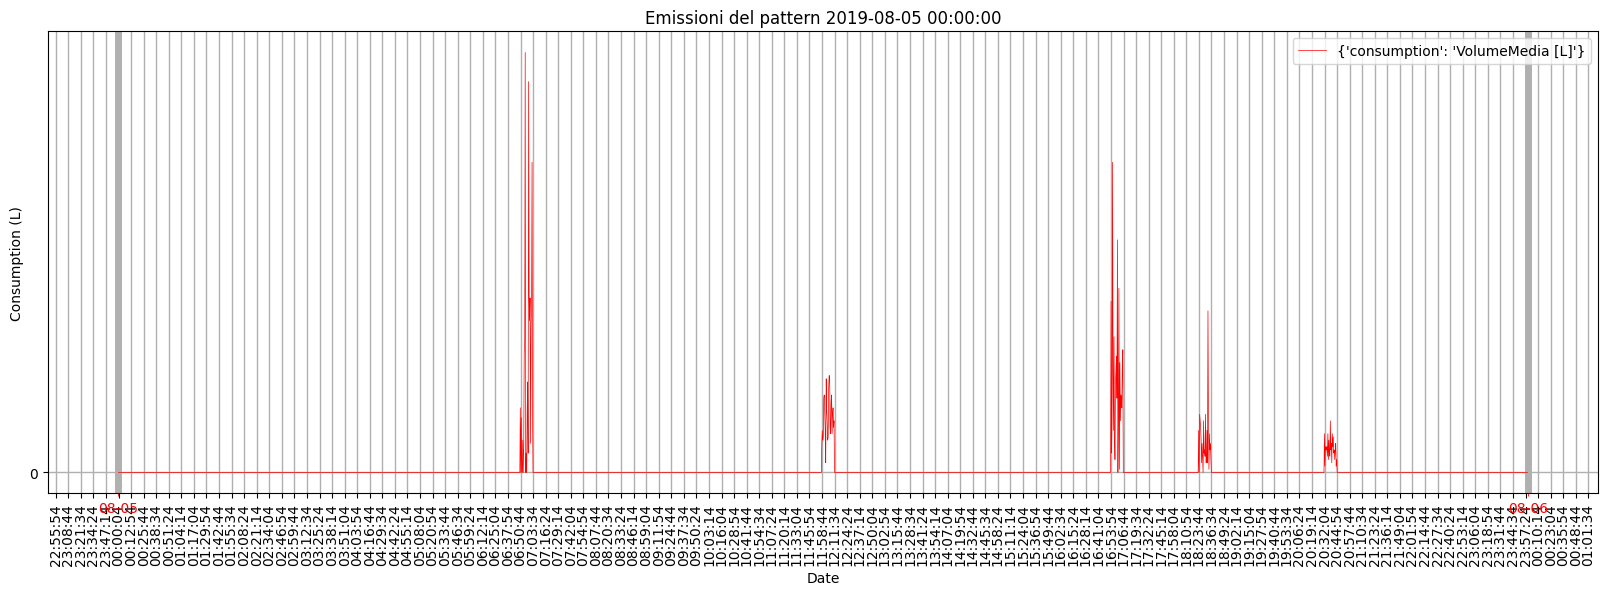

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 2131.185483870968 min2: 1340.8478260869565 min3: 2201.5815217391305
min_value per questo pattern: 2201.5815217391305
dove max1: 2841.5806451612902 max2: 2681.695652173913 max3: 3302.372282608696
max_value per questo pattern: 2681.695652173913
	emissione giornaliera: 2317

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[61, 62]]
divisione dell'emissioni in intervalli: [[1798, 519]]

DATAFRAME  COSTRUITO
	intervallo finale: [[61, 62]]
	divisione finale dell'emissioni in intervalli: [[1798, 519]]
	emissione totale giornaliera: 2317
	picco di emissione giornaliera: 3.2333333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-05 13:02:50', freq='770S'), Timestamp('2019-08-05 13:28:30', freq='770S'), 2)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CDMBLC1M_S0


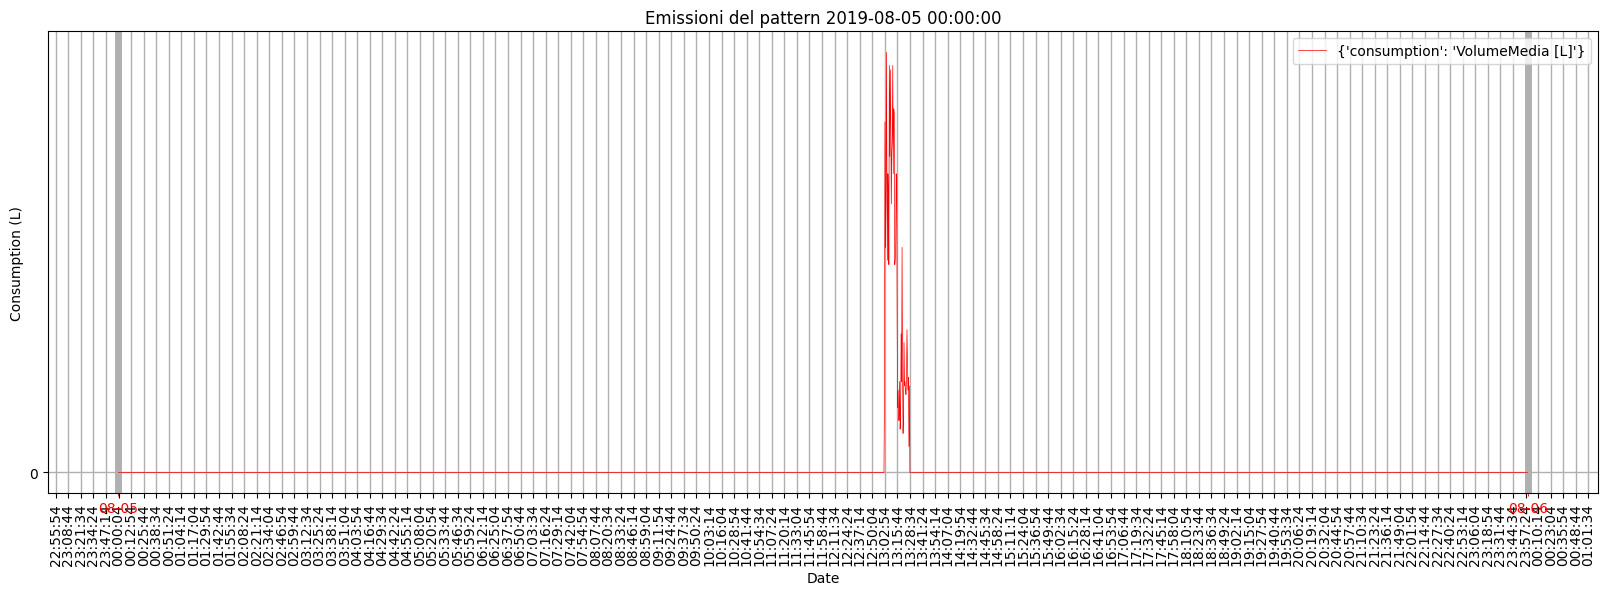

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 1420.7903225806451 min2: 1340.8478260869565 min3: 1100.7907608695652
min_value per questo pattern: 1420.7903225806451
dove max1: 2131.185483870968 max2: 2681.695652173913 max3: 2201.5815217391305
max_value per questo pattern: 2131.185483870968
	emissione giornaliera: 1454

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: P
spazi: []

intervallo: [[11]]
divisione dell'emissioni in intervalli: [1454]

DATAFRAME  COSTRUITO
	intervallo finale: [[11]]
	divisione finale dell'emissioni in intervalli: [1454]
	emissione totale giornaliera: 1454
	picco di emissione giornaliera: 2.433333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-05 02:21:10', freq='770S'), Timestamp('2019-08-05 02:34:00', freq='770S'), 1)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CCMBLB1P_S0


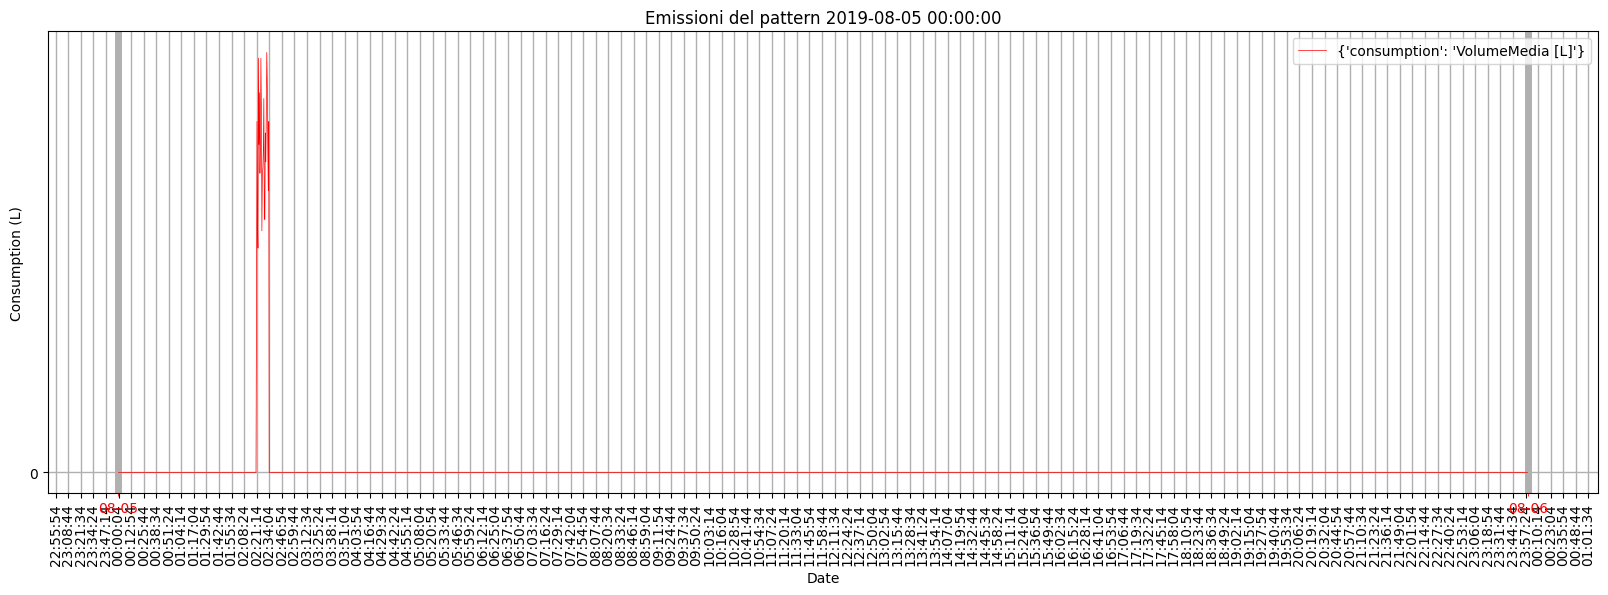

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 4
dove min1: 4262.370967741936 min2: 4022.5434782608695 min3: 4403.163043478261
min_value per questo pattern: 4403.163043478261
dove max1: 4972.766129032258 max2: 5363.391304347826 max3: 5503.953804347826
max_value per questo pattern: 4972.766129032258
	emissione giornaliera: 4657

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L']

intervallo: [[13], [46], [48], [85]]
divisione dell'emissioni in intervalli: [801, 358, 3439, 59]
non rispetta und_value
divisione dell'emissioni in intervalli: [2729, 275, 5, 1648]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2021, 1590, 475, 571]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [574, 3092, 897, 94]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [526, 1882, 1881, 368]
debug temp esmissioni 1
tentativo
spazi: ['L', 'L', 'P']

intervallo: [[22], [41], [48], [50]]
divisione dell'emissioni in interval

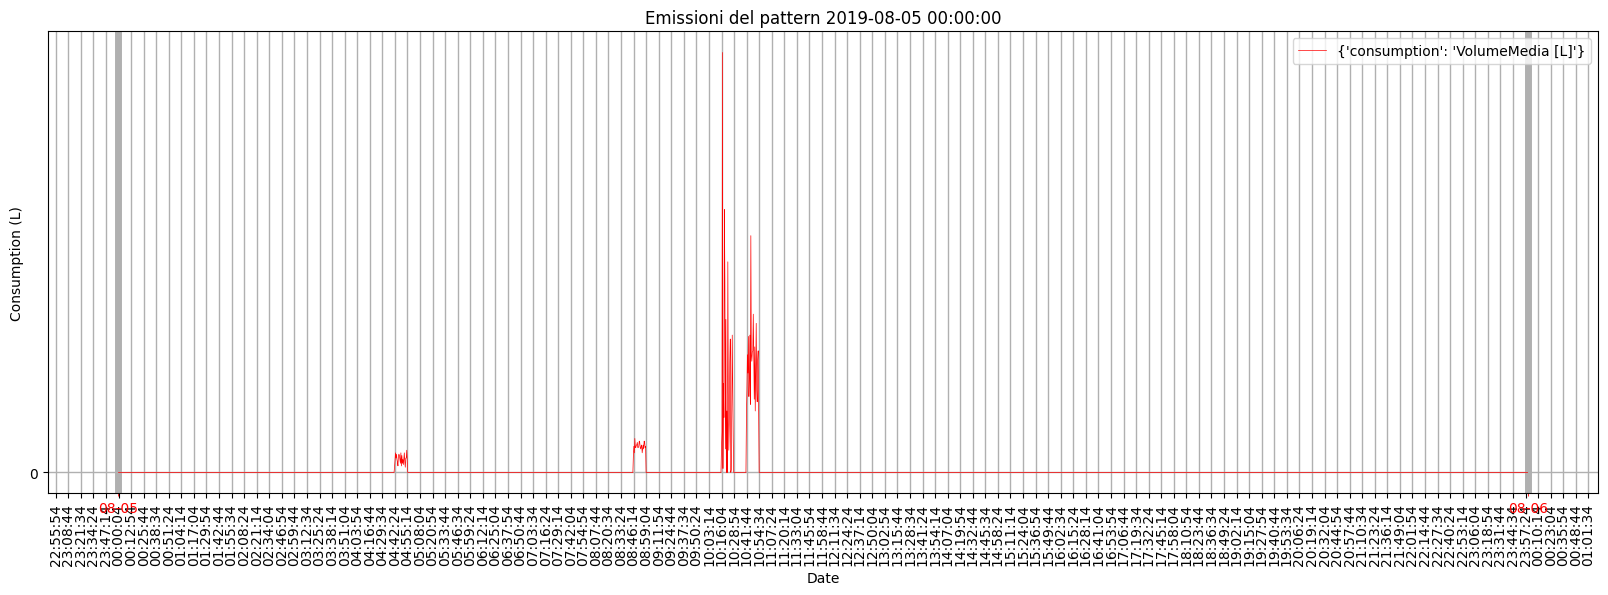

emissione giornaliera: 0

emissione giornaliera: 0

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 2
dove min1: 2554.435483870968 min2: 2582.2010869565215 min3: 2201.5815217391305
min_value per questo pattern: 2582.2010869565215
dove max1: 5108.870967741936 max2: 3442.9347826086955 max3: 3302.372282608696
max_value per questo pattern: 3302.372282608696
	emissione giornaliera: 2894

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PP
spazi: ['L']

intervallo: [[33], [68]]
divisione dell'emissioni in intervalli: [352, 2542]

DATAFRAME  COSTRUITO
	intervallo finale: [[33], [68]]
	divisione finale dell'emissioni in intervalli: [352, 2542]
	emissione totale giornaliera: 2894
	picco di emissione giornaliera: 4.766666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-10-01 07:03:30', freq='770S'), Timestamp('2019-10-01 07:16:20', freq='770S'), 1), (Timestamp('2019-10-01 14:32:40', freq='770S'), Timestamp('2019-10-01 14:45:30', freq=

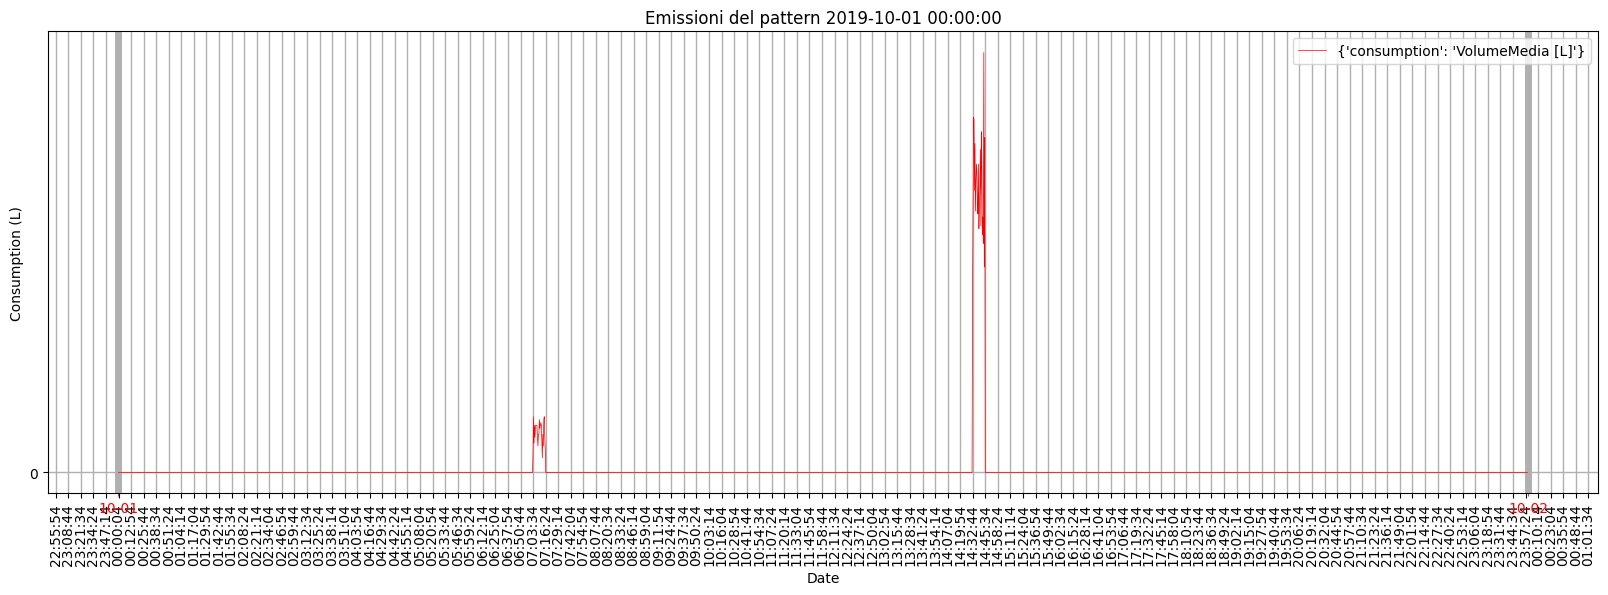

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 10217.741935483871 min2: 6025.135869565217 min3: 7705.535326086957
min_value per questo pattern: 10217.741935483871
dove max1: 12772.177419354839 max2: 10328.804347826086 max3: 17612.652173913044
max_value per questo pattern: 10328.804347826086
	emissione giornaliera: 10239

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[1], [42], [56, 57], [77], [99], [104]]
divisione dell'emissioni in intervalli: [2655, 4205, [234, 11], 1559, 518, 1057]

DATAFRAME  COSTRUITO
	intervallo finale: [[1], [42], [56, 57], [77], [99], [104]]
	divisione finale dell'emissioni in intervalli: [2655, 4205, [234, 11], 1559, 518, 1057]
	emissione totale giornaliera: 10239
	picco di emissione giornaliera: 10.033333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-10-01 00:12:50', freq='770S'), Timestamp('2019-10-01 00:25:40', freq='770S'), 1), (Timestamp('2019-10-01 08

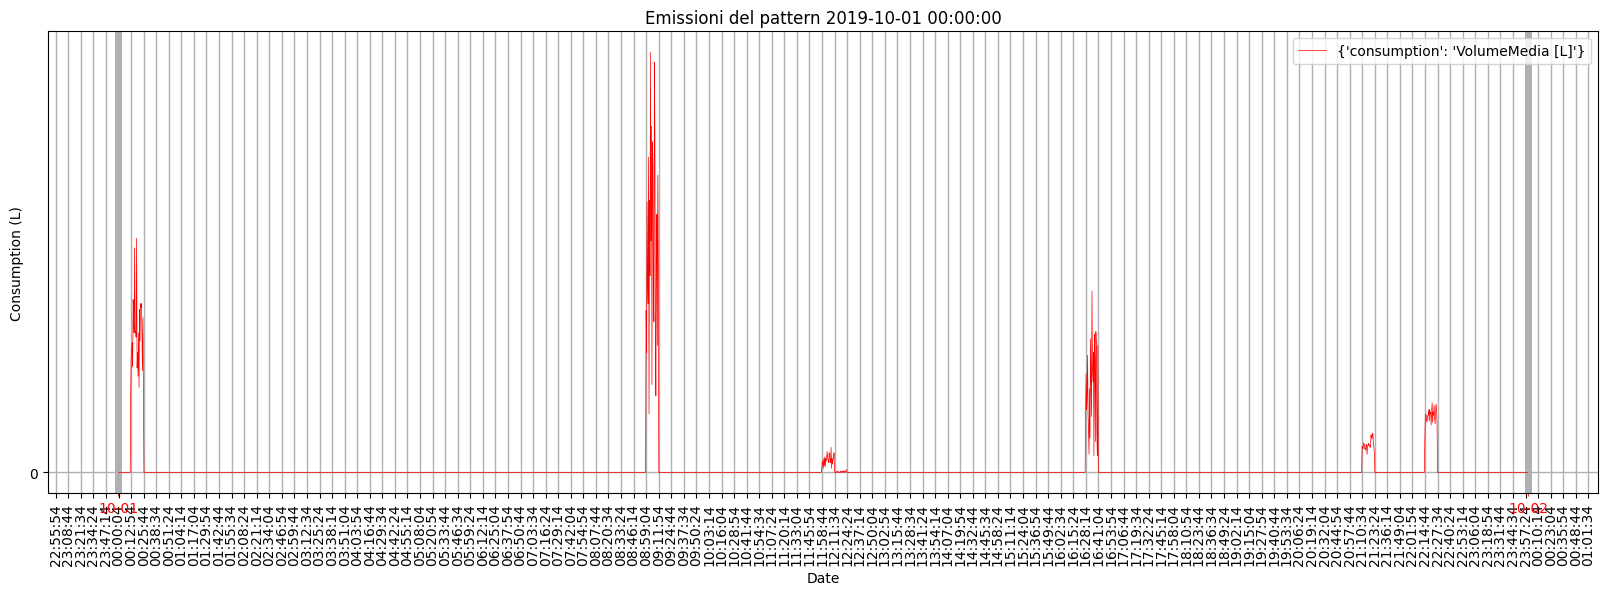

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 3
dove min1: 2554.435483870968 min2: 4303.668478260869 min3: 4403.163043478261
min_value per questo pattern: 4403.163043478261
dove max1: 5108.870967741936 max2: 5164.402173913043 max3: 5503.953804347826
max_value per questo pattern: 5108.870967741936
	emissione giornaliera: 4428

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: LPP
spazi: ['L', 'P']

intervallo: [[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], [70], [72]]
divisione dell'emissioni in intervalli: [[19, 112, 118, 120, 50, 19, 21, 3, 38, 181, 5, 182, 61, 220, 7, 93, 67, 32, 44, 6, 80, 149, 132, 87, 89, 81, 6, 3, 163], 1314, 926]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[29, 19, 44, 2, 131, 31, 1, 103, 5, 13, 183, 28, 169, 55, 27, 14, 135, 77, 36, 78, 70, 48, 49, 96, 55, 2, 60, 106, 43], 412, 2307]
debug temp esmissioni 2
divisione dell'

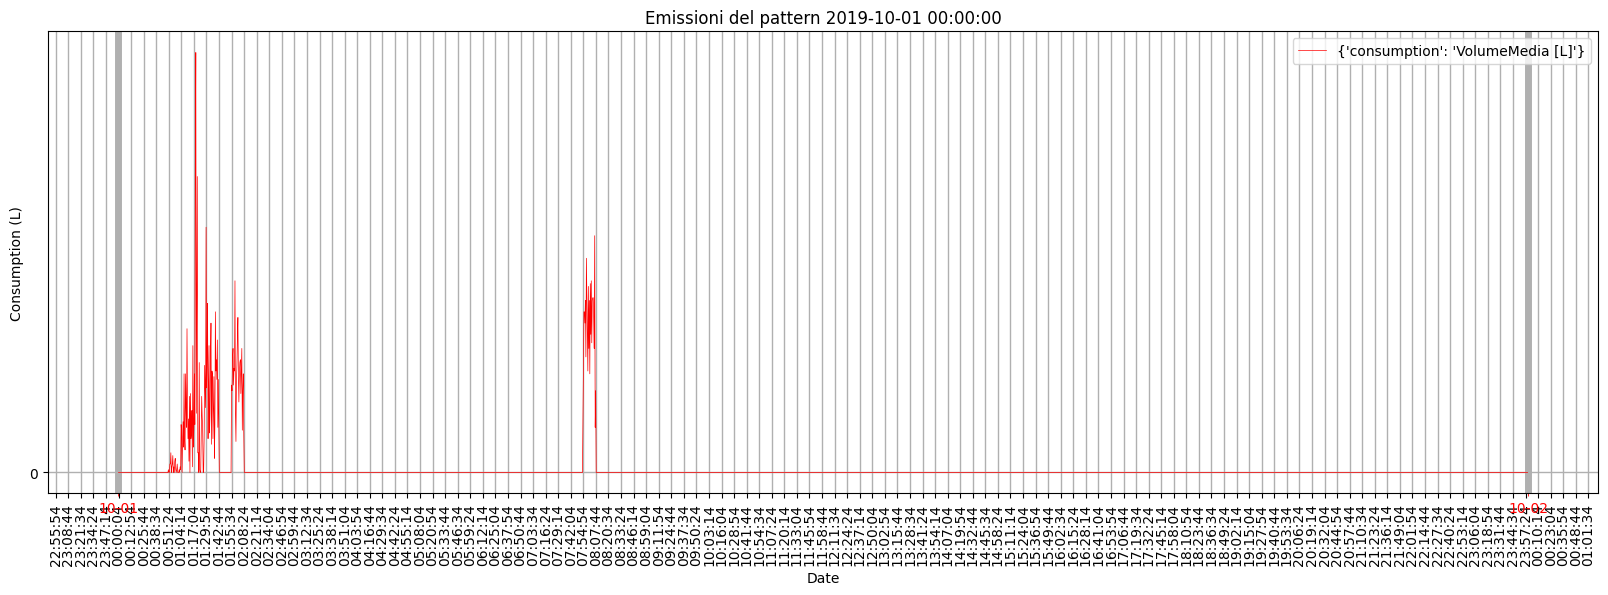

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 3
dove min1: 5108.870967741936 min2: 6025.135869565217 min3: 6604.744565217392
min_value per questo pattern: 6604.744565217392
dove max1: 7663.306451612903 max2: 6885.869565217391 max3: 7705.535326086957
max_value per questo pattern: 6885.869565217391
	emissione giornaliera: 6834

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: LMP
spazi: ['L', 'L']

intervallo: [[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53], [73, 74], [102]]
divisione dell'emissioni in intervalli: [[40, 56, 9, 23, 2, 76, 25, 8, 1, 29, 47, 42, 60, 23, 52, 43, 24, 12, 40, 4, 8, 44, 30, 41, 1, 39, 82, 6, 1, 33], [1808, 1768], 2357]
errore div emissioni 
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[58, 95, 192, 167, 189, 104, 24, 92, 123, 23, 317, 31, 210, 162, 7, 71, 65, 76, 127, 62, 31, 54, 55, 87, 143, 222, 175, 102, 28, 49], [527,

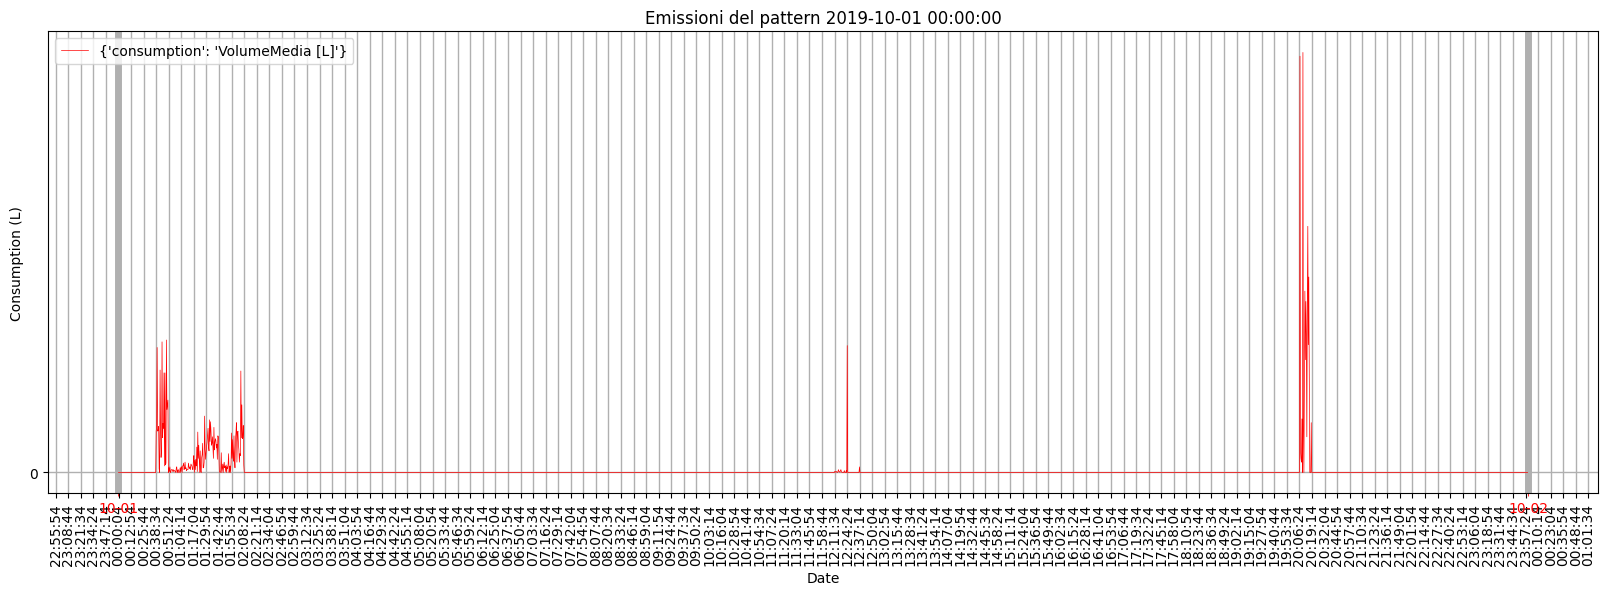

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 4
dove min1: 7663.306451612903 min2: 6025.135869565217 min3: 7705.535326086957
min_value per questo pattern: 7705.535326086957
dove max1: 10217.741935483871 max2: 10328.804347826086 max3: 17612.652173913044
max_value per questo pattern: 10217.741935483871
	emissione giornaliera: 8658

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L']

intervallo: [[7], [23], [51], [96]]
divisione dell'emissioni in intervalli: [2672, 829, 2199, 2958]

DATAFRAME  COSTRUITO
	intervallo finale: [[7], [23], [51], [96]]
	divisione finale dell'emissioni in intervalli: [2672, 829, 2199, 2958]
	emissione totale giornaliera: 8658
	picco di emissione giornaliera: 6.133333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-10-01 01:29:50', freq='770S'), Timestamp('2019-10-01 01:42:40', freq='770S'), 1), (Timestamp('2019-10-01 04:55:10', freq='770S'), Timestamp('2019-10-01 05:08:00', freq='770S'), 1), (Timestam

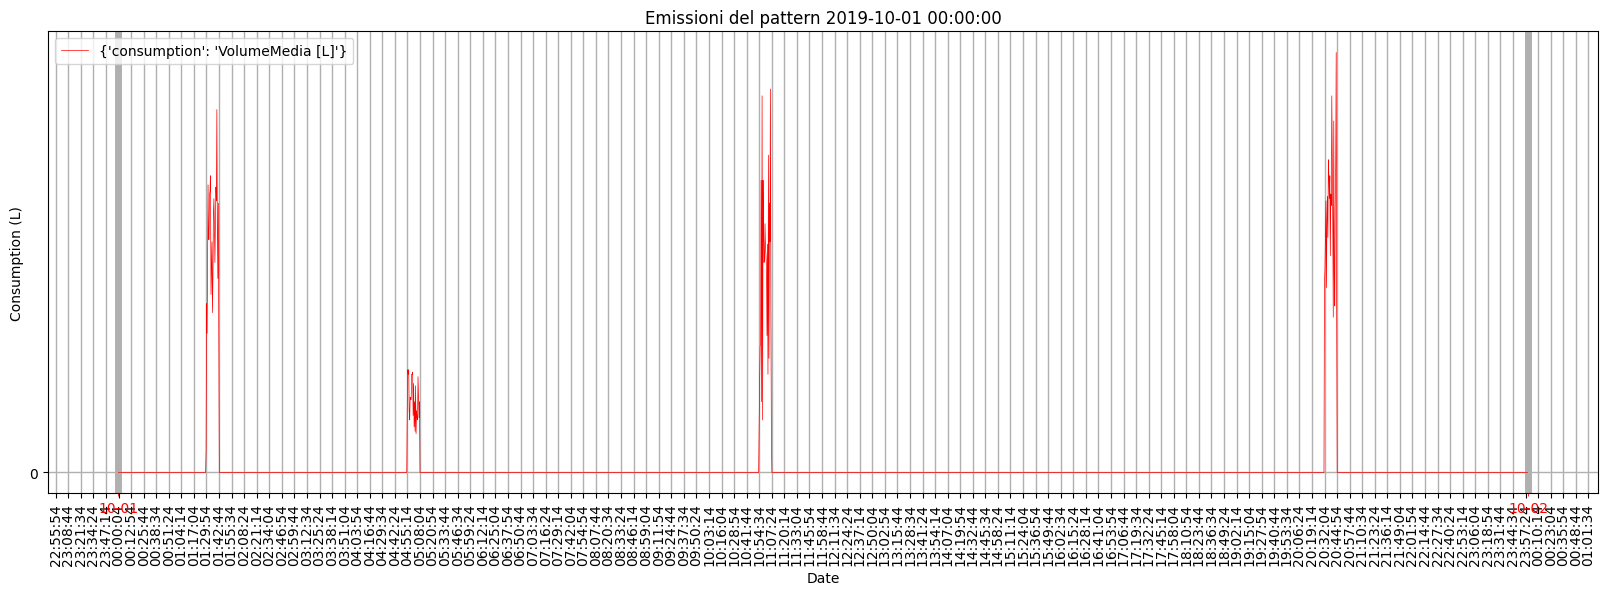

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 10217.741935483871 min2: 6025.135869565217 min3: 7705.535326086957
min_value per questo pattern: 10217.741935483871
dove max1: 12772.177419354839 max2: 10328.804347826086 max3: 13209.489130434784
max_value per questo pattern: 10328.804347826086
	emissione giornaliera: 10318

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[10], [41, 42], [60], [81], [89, 90, 91], [103]]
divisione dell'emissioni in intervalli: [3870, [166, 1718], 1654, 2199, [119, 86, 234], 272]

DATAFRAME  COSTRUITO
	intervallo finale: [[10], [41, 42], [60], [81], [89, 90, 91], [103]]
	divisione finale dell'emissioni in intervalli: [3870, [166, 1718], 1654, 2199, [119, 86, 234], 272]
	emissione totale giornaliera: 10318
	picco di emissione giornaliera: 9.066666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-10-01 02:08:20', freq='770S'), Timestamp('2019-10-01 02:21:10', fr

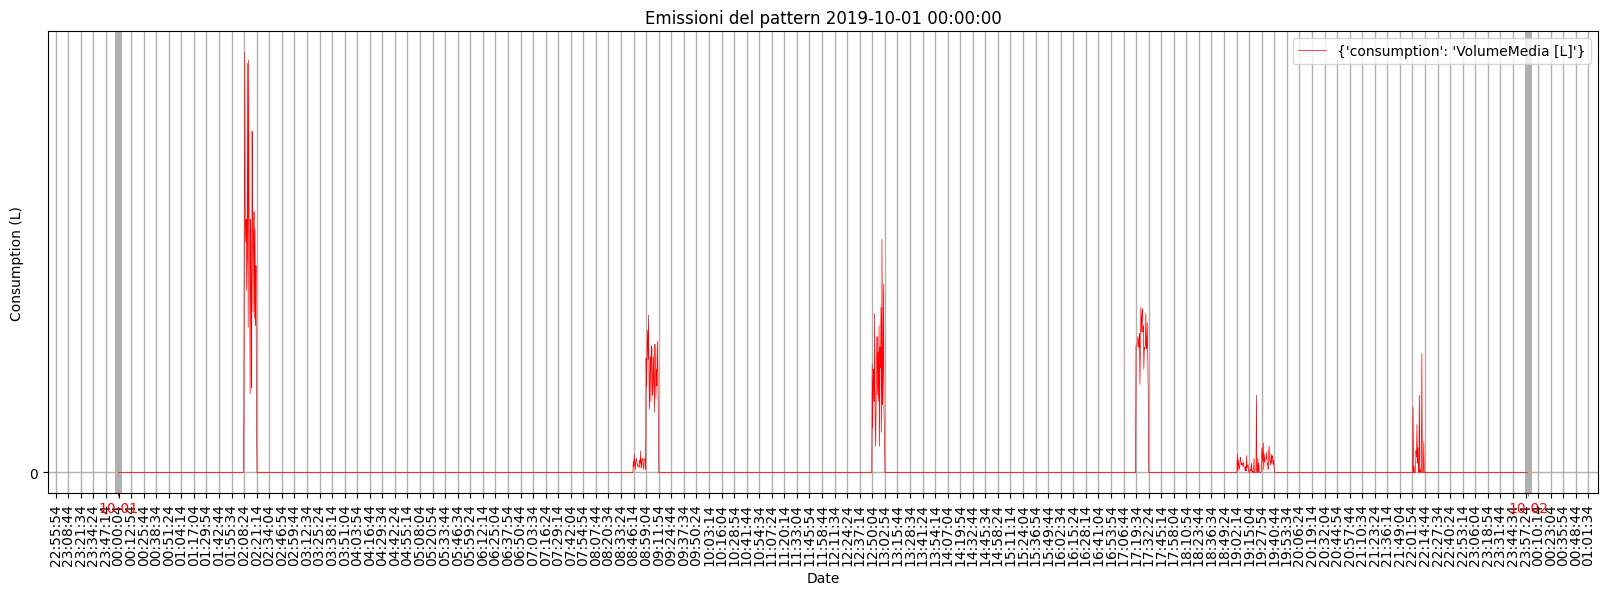

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1a
	numero di intervalli: 6
dove min1: 15326.612903225807 min2: 6025.135869565217 min3: 7705.535326086957
min_value per questo pattern: 15326.612903225807
dove max1: 17881.048387096773 max2: 20657.608695652172 max3: 22015.815217391304
max_value per questo pattern: 17881.048387096773
	emissione giornaliera: 17700

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'L', 'L']

intervallo: [[9], [13], [58], [79, 80], [92], [103]]
divisione dell'emissioni in intervalli: [963, 978, 6929, [124, 478], 7179, 1049]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [10064, 746, 3509, [133, 540], 76, 2632]
debug temp esmissioni 2
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [505, 7425, 856, [92, 140], 1523, 7159]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1354, 656, 1000, [2977, 6660], 1528, 3525]

DATAFRAME  COSTRUITO
	intervallo finale: [[9], [13], [58], [79, 80], [92], [103]

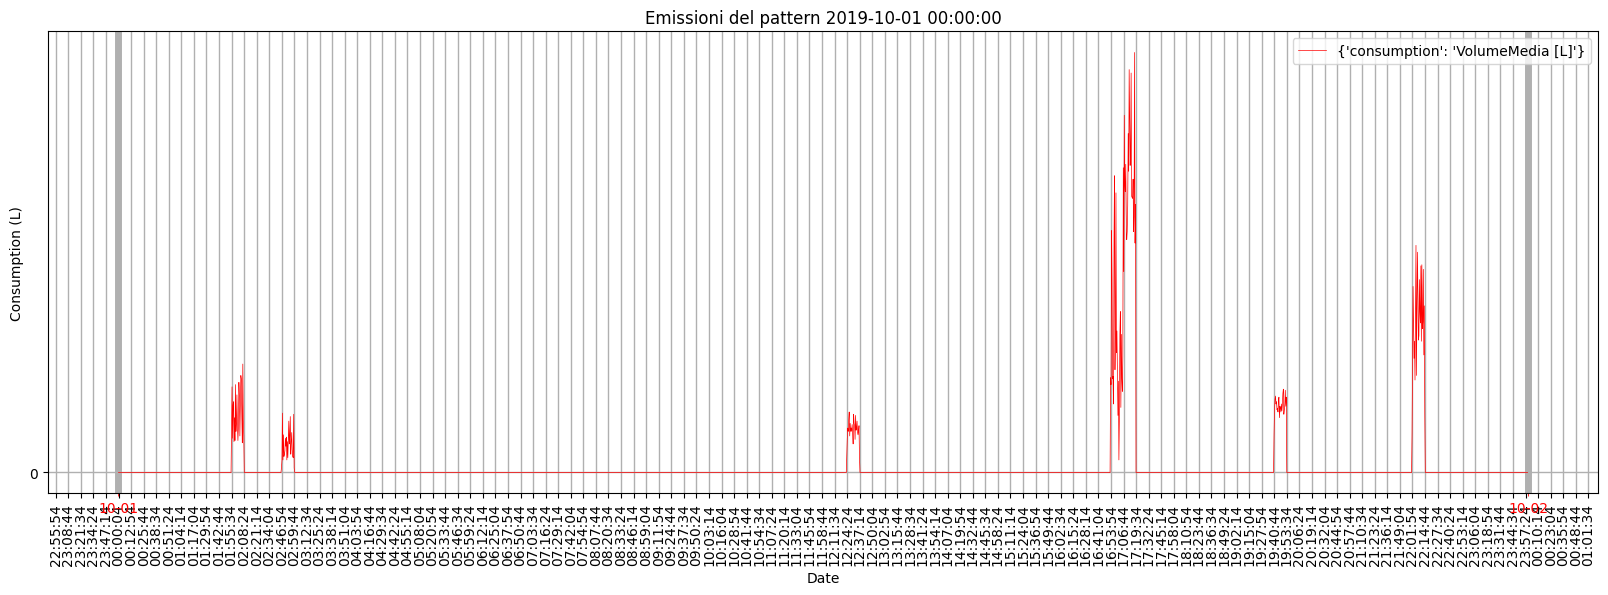

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: M1b
	numero di intervalli: 7
dove min1: 10108.875 min2: 12469.491758241758 min3: 12211.084254143647
min_value per questo pattern: 12469.491758241758
dove max1: 13478.5 max2: 14963.390109890111 max3: 13955.524861878454
max_value per questo pattern: 13478.5
	emissione giornaliera: 13104

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'M', 'M', 'M', 'L', 'L']

intervallo: [[7], [9], [13], [16], [19, 20], [98, 99], [107]]
divisione dell'emissioni in intervalli: [676, 3691, 1937, 296, [922, 4], [605, 98], 4875]

DATAFRAME  COSTRUITO
	intervallo finale: [[7], [9], [13], [16], [19, 20], [98, 99], [107]]
	divisione finale dell'emissioni in intervalli: [676, 3691, 1937, 296, [922, 4], [605, 98], 4875]
	emissione totale giornaliera: 13104
	picco di emissione giornaliera: 10.866666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-06-03 01:29:50', freq='770S'), Timestamp('2019-06-03 01:42:40', freq='770S'), 1), (Timestamp('

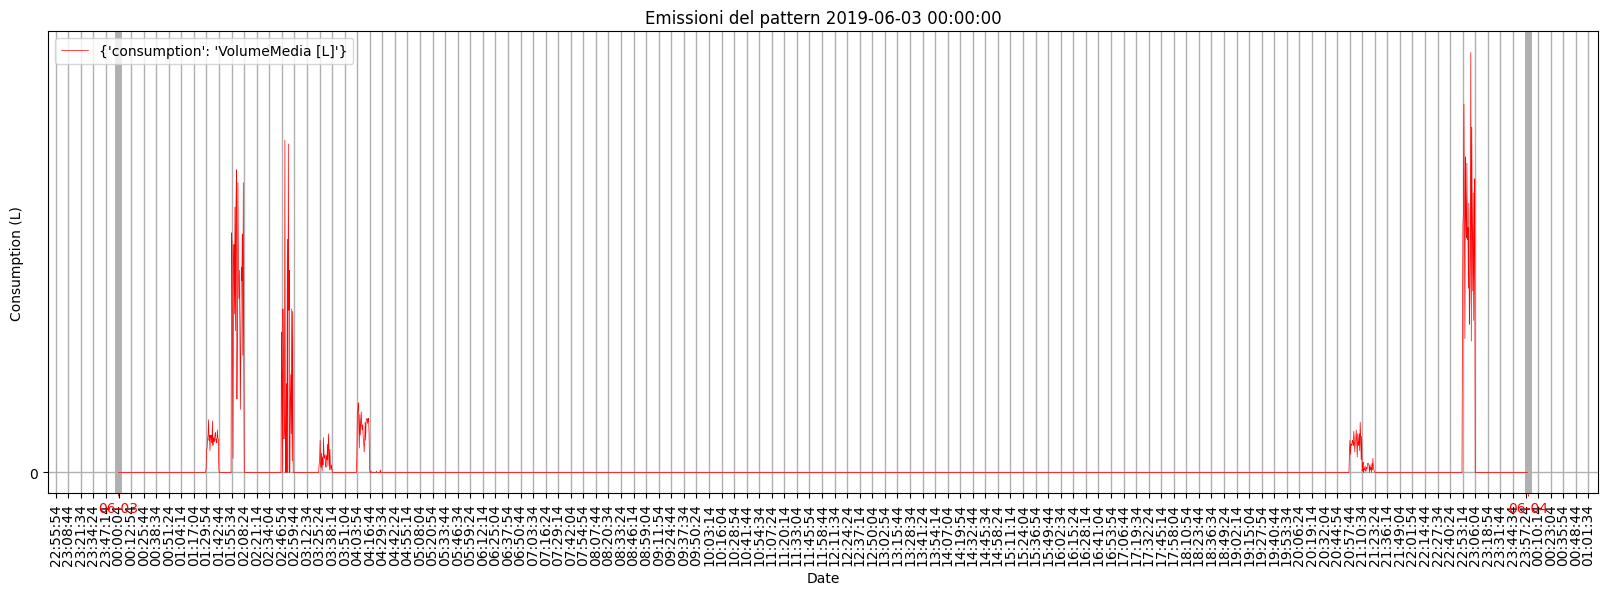

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1a
	numero di intervalli: 8
dove min1: 10108.875 min2: 12469.491758241758 min3: 12211.084254143647
min_value per questo pattern: 12469.491758241758
dove max1: 13478.5 max2: 14963.390109890111 max3: 20933.28729281768
max_value per questo pattern: 13478.5
	emissione giornaliera: 12818

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'M', 'L', 'L']

intervallo: [[2], [15, 16], [29], [46], [61], [65], [94], [99, 100, 101]]
divisione dell'emissioni in intervalli: [3326, [1855, 803], 481, 5378, 41, 142, 287, [17, 4, 484]]

DATAFRAME  COSTRUITO
	intervallo finale: [[2], [15, 16], [29], [46], [61], [65], [94], [99, 100, 101]]
	divisione finale dell'emissioni in intervalli: [3326, [1855, 803], 481, 5378, 41, 142, 287, [17, 4, 484]]
	emissione totale giornaliera: 12818
	picco di emissione giornaliera: 13.166666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-06-03 00:25:40', freq='770S'), Timestamp('2019-0

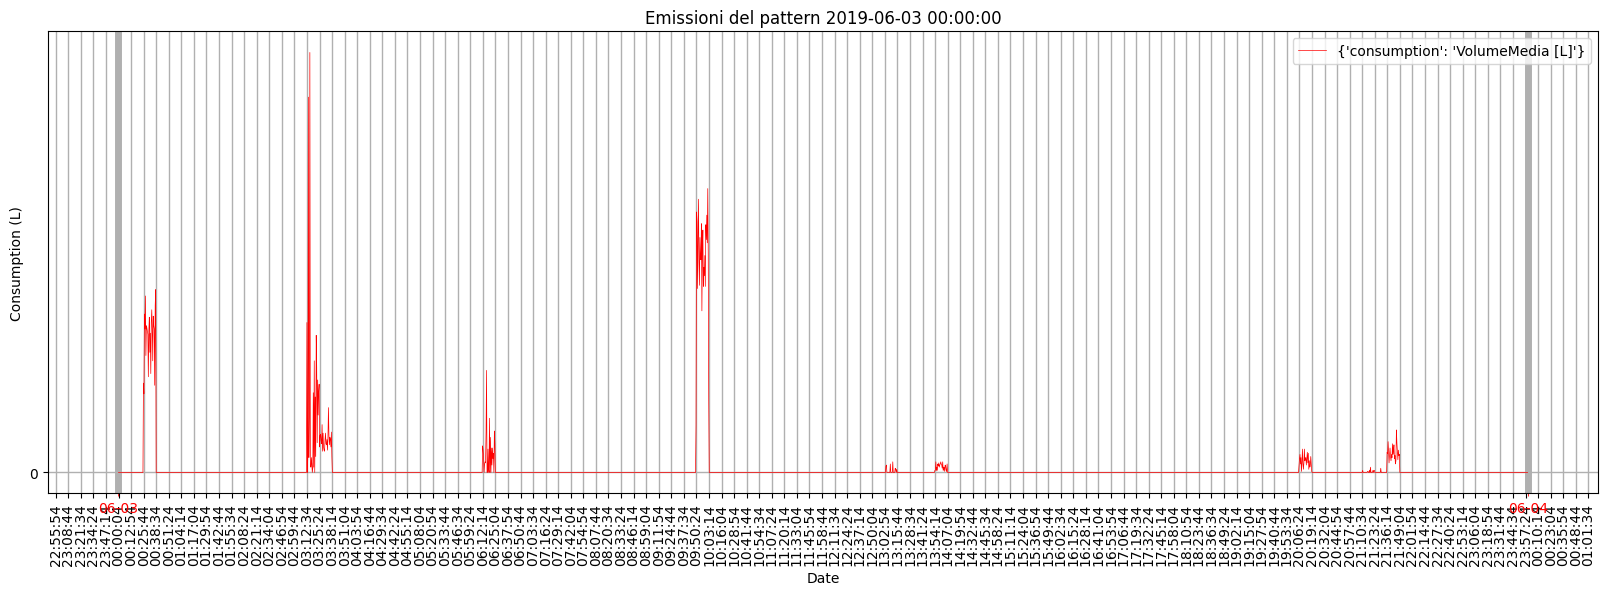

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 3369.625 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6739.25 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6739.25
	emissione giornaliera: 5676

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'M', 'L']

intervallo: [[50], [63], [67], [109]]
divisione dell'emissioni in intervalli: [2568, 245, 2549, 314]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2372, 1096, 742, 1466]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2162, 314, 1817, 1383]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1807, 1733, 224, 1912]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1099, 2262, 958, 1357]
tentativo
spazi: ['L', 'L', 'M']

intervallo: [[10], [59], [68], [71]]
divisione dell'emissioni in intervalli: [1066, 382, 1360, 2868]
debug temp esmi

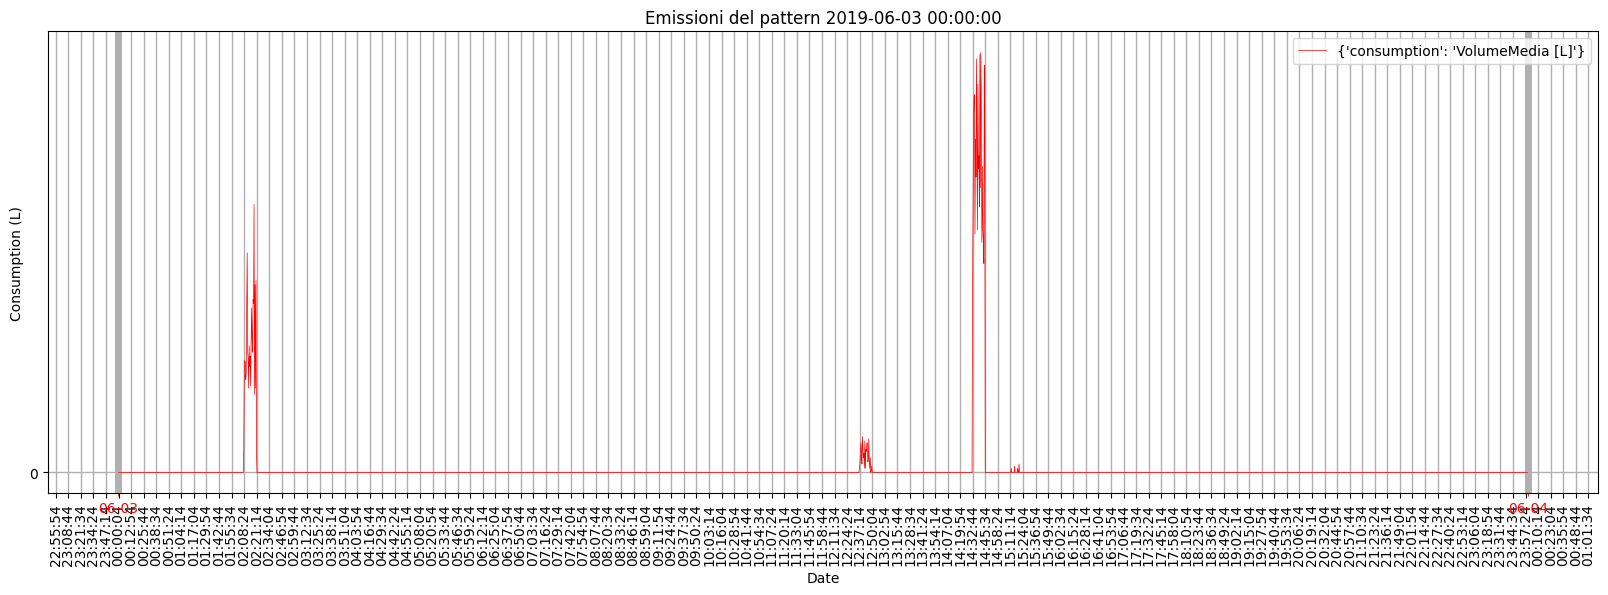

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 6739.25 min2: 7481.695054945056 min3: 8722.203038674033
min_value per questo pattern: 8722.203038674033
dove max1: 10108.875 max2: 9975.593406593407 max3: 10466.64364640884
max_value per questo pattern: 9975.593406593407
	emissione giornaliera: 8778

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'M']

intervallo: [[28], [52], [63], [66]]
divisione dell'emissioni in intervalli: [3444, 3764, 1541, 29]

DATAFRAME  COSTRUITO
	intervallo finale: [[28], [52], [63], [66]]
	divisione finale dell'emissioni in intervalli: [3444, 3764, 1541, 29]
	emissione totale giornaliera: 8778
	picco di emissione giornaliera: 7.933333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-06-03 05:59:20', freq='770S'), Timestamp('2019-06-03 06:12:10', freq='770S'), 1), (Timestamp('2019-06-03 11:07:20', freq='770S'), Timestamp('2019-06-03 11:20:10', freq='770S'), 1), (Timestamp('2019-06-03 13:28:3

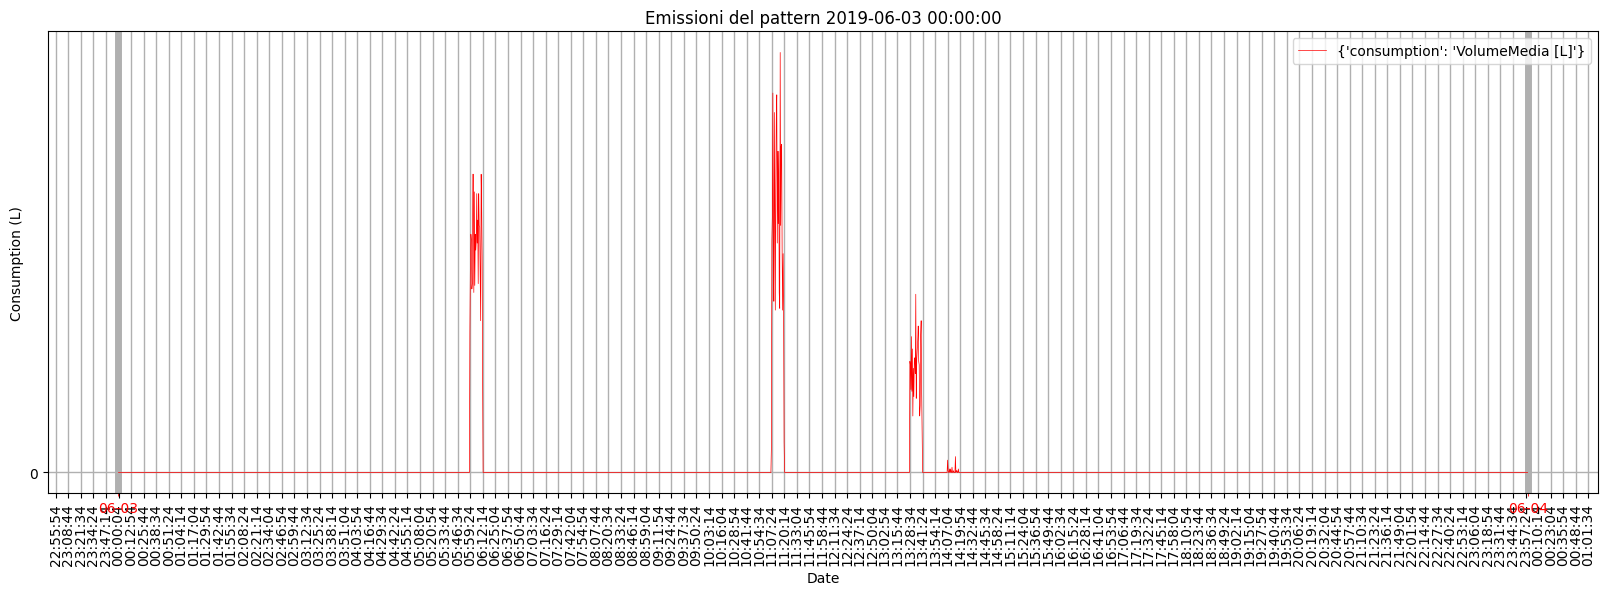

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 9
dove min1: 6739.25 min2: 7481.695054945056 min3: 8722.203038674033
min_value per questo pattern: 8722.203038674033
dove max1: 10108.875 max2: 9975.593406593407 max3: 10466.64364640884
max_value per questo pattern: 9975.593406593407
	emissione giornaliera: 9412

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L', 'M', 'L', 'M', 'L', 'P']

intervallo: [[7], [15], [17], [45], [48], [68], [72], [92], [94, 95]]
divisione dell'emissioni in intervalli: [932, 1332, 922, 2337, 775, 199, 34, 574, [2223, 84]]

DATAFRAME  COSTRUITO
	intervallo finale: [[7], [15], [17], [45], [48], [68], [72], [92], [94, 95]]
	divisione finale dell'emissioni in intervalli: [932, 1332, 922, 2337, 775, 199, 34, 574, [2223, 84]]
	emissione totale giornaliera: 9412
	picco di emissione giornaliera: 6.833333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-06-03 01:29:50', freq='770S'), Timestamp('2019-06-03 01:42

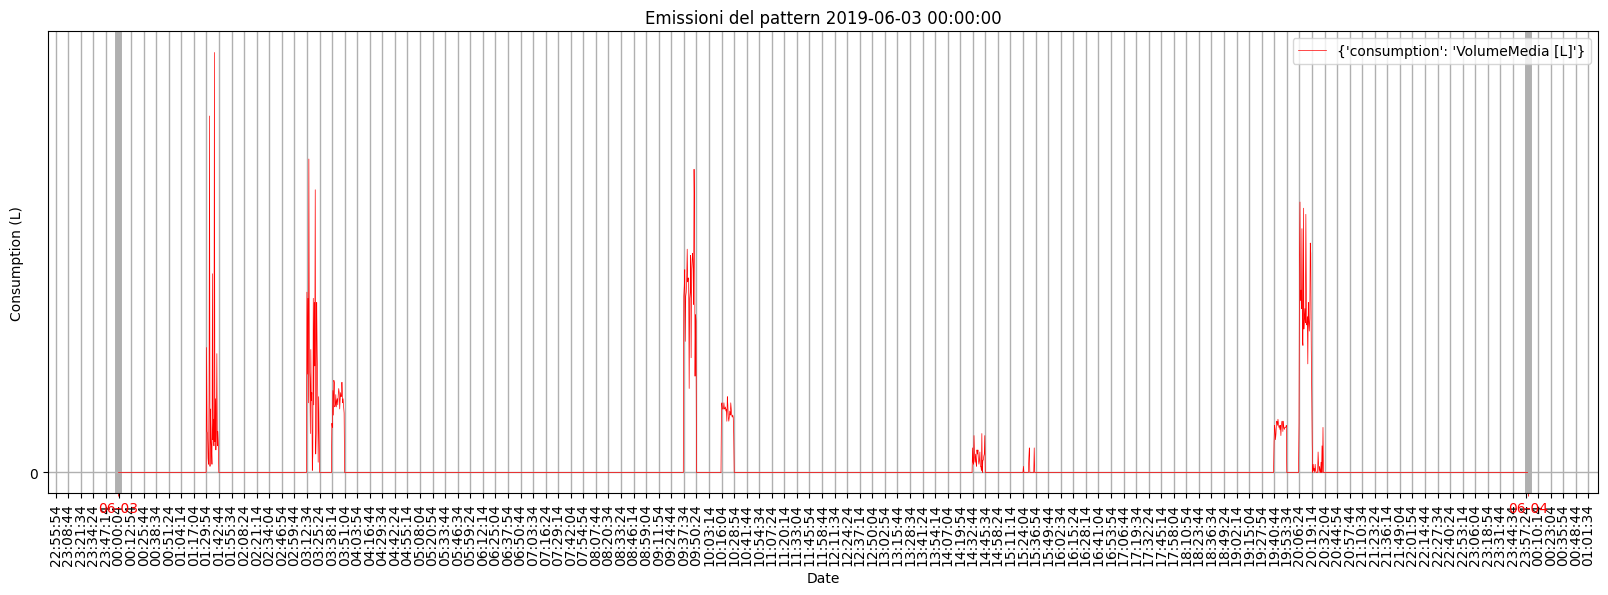

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1f
	numero di intervalli: 7
dove min1: 3369.625 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6739.25 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6739.25
	emissione giornaliera: 6006

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'P', 'L']

intervallo: [[11], [46], [65], [74], [102], [104], [109]]
divisione dell'emissioni in intervalli: [1138, 71, 1917, 697, 908, 297, 978]

DATAFRAME  COSTRUITO
	intervallo finale: [[11], [46], [65], [74], [102], [104], [109]]
	divisione finale dell'emissioni in intervalli: [1138, 71, 1917, 697, 908, 297, 978]
	emissione totale giornaliera: 6006
	picco di emissione giornaliera: 12.466666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-06-03 02:21:10', freq='770S'), Timestamp('2019-06-03 02:34:00', freq='770S'), 1), (Timestamp('2019-06-03 09:50:20', freq='770S'), Timesta

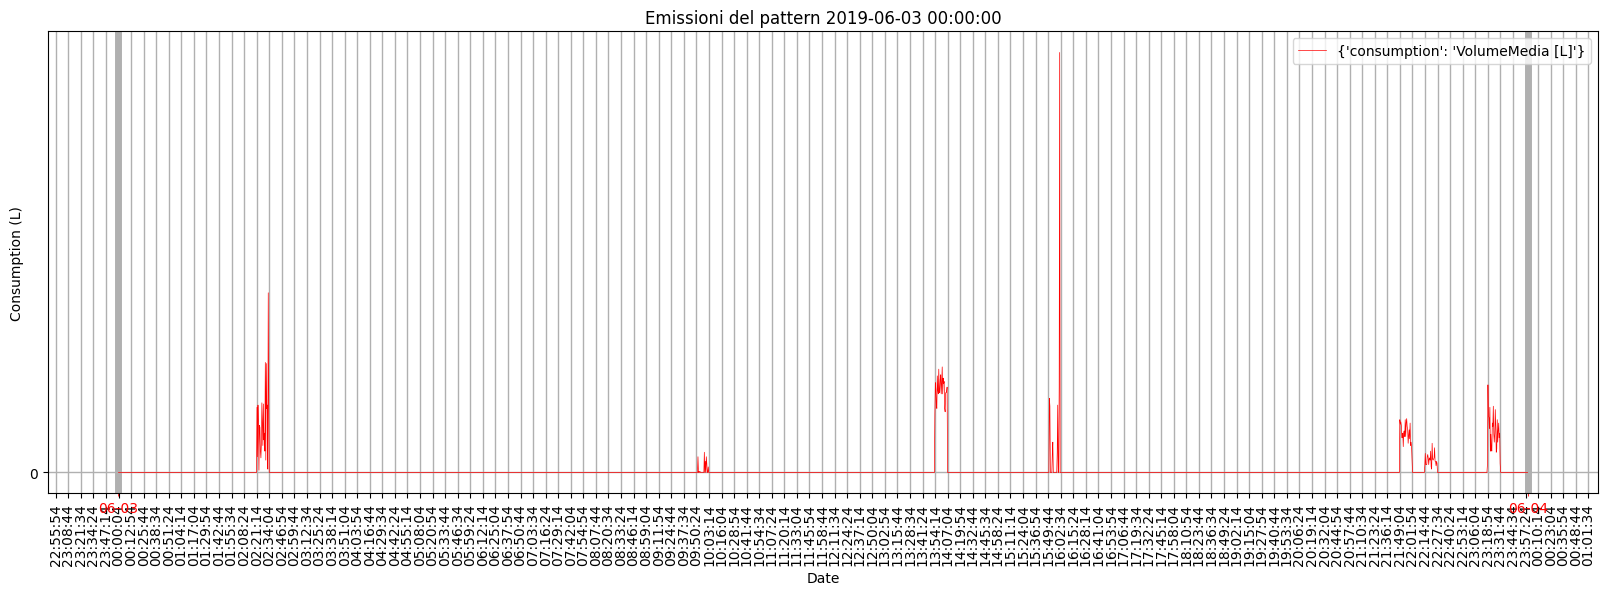

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1a
	numero di intervalli: 8
dove min1: 3369.625 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6739.25 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6739.25
	emissione giornaliera: 5963

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'M', 'L', 'L', 'L']

intervallo: [[5], [32], [40], [60, 61], [64, 65], [87], [102], [107]]
divisione dell'emissioni in intervalli: [2091, 1868, 195, [148, 97], [86, 46], 253, 103, 1076]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [1381, 226, 1138, [322, 418], [8, 8], 880, 620, 962]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [272, 197, 785, [33, 454], [872, 107], 237, 1945, 1061]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [59, 438, 558, [320, 80], [2629, 319], 757, 411, 392]

DATAFRAME  COSTRUITO
	intervallo finale: [[5], [32], [40], [60

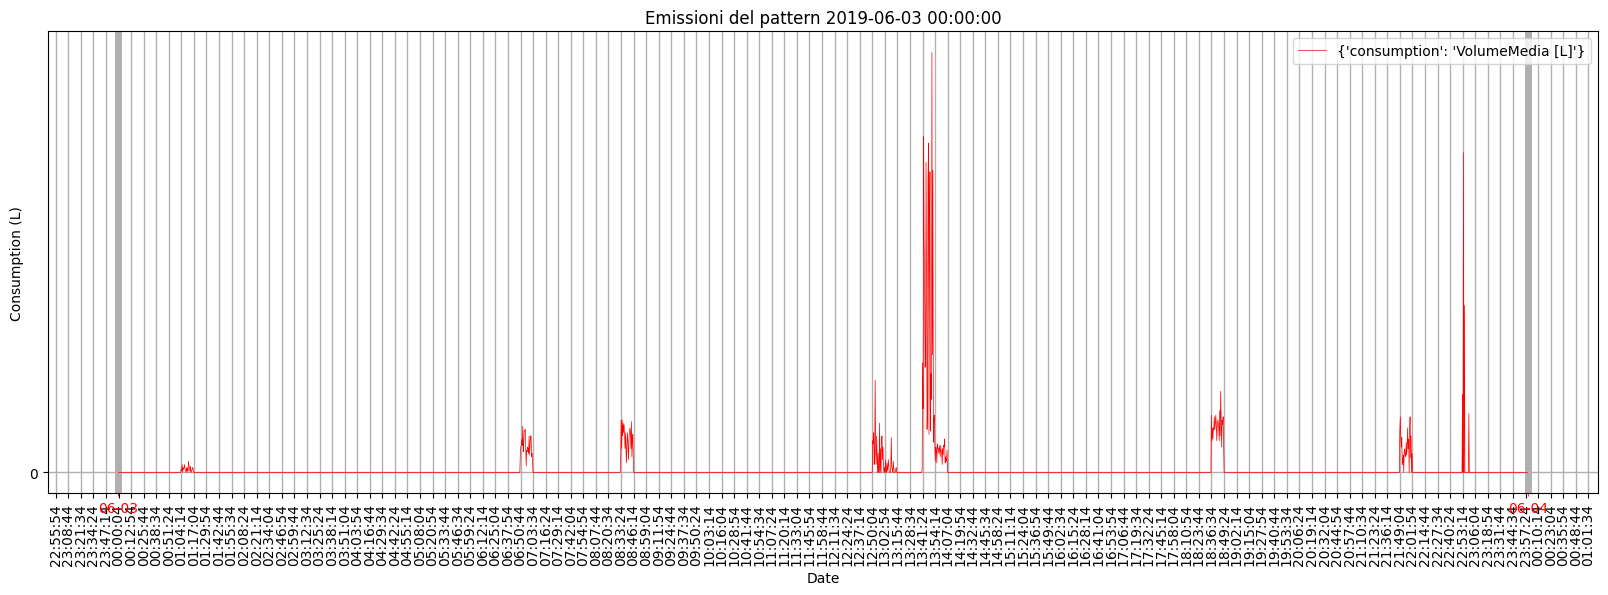

PATTERN ERRATI: 0


In [109]:
# SETTIMANE SU CUI FARE I TEST, PRIME DUE SETTIMANE DEL PRIMO E SECONDO PERIODO(SETTIMANE REALI)


# 2019-04-22
#['CFMFLH6_S0', 'CHMHLH9_M1b', 'CAMALA1M_S0', 'CAMALA1M_S0', 'CDMDLE7_S2c', 'CHMGLH7_S2c', 'CCMCLD7_S2c']
#[12493. 32722.   753.   870.  7962. 16808.  6170.]

#2019-08-05
#['CHMHLH16_M1c', 'CDMBLC5_S0', 'CDMBLC1M_S0', 'CCMBLB1P_S0', 'CGMDLE4_S2f', '0', '0']
#[16734.  2505.  2249.  1656.  4843.     0.     0.]

#2019-10-21
#['CBMDLC2PP_S0', 'CEMHLH6_S0', 'CBMFLE3LPP_S2f', 'CCMHLG3LMP_S0', 'CDMHLH4_S0', 'CEMHLH6_S0', 'CGMHLH6_S1a']
#[ 3228. 12506.  4893.  6660.  9335. 12324. 16304.]

#2019-06-03
#['CDMFLH7_M1b', 'CDMFLH8_S1a', 'CBMCLD4_S2a', 'CCMDLF4_S2a', 'CCMDLF9_S2c', 'CBMCLD7_S1f', 'CBMCLD8_S1a']
#[12690. 13362.  6491.  9208.  8733.  5940.  6675.]

#SETTIMANE GENERATE
#PERIODO 04
#['CDMCLE6_S2a', 'CHMHLH6_S2c', 'CCMCLD9_S2c', 'CDMDLE7_S2c', 'CCMCLD9_S2c', 'CHMHLH6_S2c', 'CFMDLF6_S2f']
#['CFMFLH6_S0', 'CDMCLD1L_S0', 'CHMHLH6_S2c', 'CCMCLD4_S2a', 'CAMALA3PPP_S2a', 'CAMALA3PPP_S2a', 'CCMBLC4_S0']

#PERIODO 08
#['CDMBLB1M_S0', 'CHMHLH6_S2a', 'CAMALA4_S2a', '0', 'CDMBLC1M_S0', '0', '0']
#['0', 'CDMBLC5_S0', '0', 'CHMHLH16_M1c', 'CAMALA2MP_P1a', 'CAMALA2MP_P1a', '0']

#PERIODO 07
#['CDMDLE4_S2a', 'CDMDLE3PLP_S0', 'CEMFLG6_S0', 'CAMALA5_S2a', 'CDMDLE4_S2a', 'CCMCLD4_S2f', 'CHMHLH10_S2c']
#['CAMALA2MP_S0', 'CDMELF7_S1a', 'CCMDLD4_S2f', 'CFMGLH4_S2a', 'CCMDLD4_M1c', 'CCMDLD4_S2f', 'CAMALA2MP_S0']

# MEDIA MENSILE 
# [0.0, 5361.964285714285, 6614.870967741936, 8858.8, 7666.451612903225, 13478.5, 6155.0, 2841.5806451612902, 7151.266666666666, 10217.741935483871, 0.0, 0.0]
# MEDIA TRIMESTRALE
# [3946.6222222222223, 9975.593406593407, 5363.391304347826, 3442.9347826086955]
# MEDIA SEMESTRALE
# [6977.762430939227, 4403.163043478261]
# MEDIA ANNUALE 
# [5679.882191780822]

########## MAIN ###############
df_dispositivo_emissioni=read_fixture('Washbasin')
mm_array=calcola_media_mensile(df_dispositivo_emissioni)
mt_array=calcola_media_trimestrale(df_dispositivo_emissioni)
ms_array=calcola_media_semestrale(df_dispositivo_emissioni)
ma=calcola_media_annuale(df_dispositivo_emissioni)


#ANALISI DEL PATTERN DA DOVER RIPRODURRE, SCOMPOSIZIONE DEL PATTERN PER OTTENERE I VARI DATI UTILI

settprova= ['CFMFLH6_S0', 'CHMHLH9_M1b', 'CAMALA1M_S0', 'CAMALA1M_S0', 'CDMDLE7_S2c', 'CHMGLH7_S2c', 'CCMCLD7_S2c']
meseprova= 4
giornoprova= 22
cambiogiorno=-1

settprova2=['CHMHLH16_M1c', 'CDMBLC5_S0', 'CDMBLC1M_S0', 'CCMBLB1P_S0', 'CGMDLE4_S2f', '0', '0']
giornoprova2= 5
meseprova2=8

settprova3=['CBMDLC2PP_S0', 'CEMHLH6_S0', 'CBMFLE3LPP_S2f', 'CCMHLG3LMP_S0', 'CDMHLH4_S0', 'CEMHLH6_S0', 'CGMHLH6_S1a']
giornoprova3=1
meseprova3=10

settprova4=['CDMFLH7_M1b', 'CDMFLH8_S1a', 'CBMCLD4_S2a', 'CCMDLF4_S2a', 'CCMDLF9_S2c', 'CBMCLD7_S1f', 'CBMCLD8_S1a']
giornoprova4=3
meseprova4=6

sett=[settprova,settprova2,settprova3,settprova4]
mese=[meseprova,meseprova2,meseprova3,meseprova4]
giorno=[giornoprova,giornoprova2,giornoprova3,giornoprova4]

settgenerate=[
    ['CDMCLE6_S2a', 'CHMHLH6_S2c', 'CCMCLD9_S2c', 'CDMDLE7_S2c', 'CCMCLD9_S2c', 'CHMHLH6_S2c', 'CFMDLF6_S2f'],
    ['CFMFLH6_S0', 'CDMCLD1L_S0', 'CHMHLH6_S2c', 'CCMCLD4_S2a', 'CAMALA3PPP_S2a', 'CAMALA3PPP_S2a', 'CCMBLC4_S0'],
    ['CDMBLB1M_S0', 'CHMHLH6_S2a', 'CAMALA4_S2a', '0', 'CDMBLC1M_S0', '0', '0'],
    ['0', 'CDMBLC5_S0', '0', 'CHMHLH16_M1c', 'CAMALA2MP_P1a', 'CAMALA2MP_P1a', '0'],
    ['CDMDLE4_S2a', 'CDMDLE3PLP_S0', 'CEMFLG6_S0', 'CAMALA5_S2a', 'CDMDLE4_S2a', 'CCMCLD4_S2f', 'CHMHLH10_S2c'],
    ['CAMALA2MP_S0', 'CDMELF7_S1a', 'CCMDLD4_S2f', 'CFMGLH4_S2a', 'CCMDLD4_M1c', 'CCMDLD4_S2f', 'CAMALA2MP_S0']
    ]
mesegenerate=[
    [4,5],
    [4,5],
    8,
    8,
    7,
    7
    ]
giornogenerate=[1,1,1,1,1,1]#inserire tutti zeri


#zip(settgenerate,mesegenerate,giornogenerate)
#zip(sett,mese,giorno)
count=0
for setty,messy,giorny in zip(settgenerate,mesegenerate,giornogenerate):
    count+=funzione_main(mm_array,mt_array,ms_array,ma, messy,giorny ,setty)

count+=funzione_main(mm_array,mt_array,ms_array,ma, meseprova,giornoprova ,settprova)
count+=funzione_main(mm_array,mt_array,ms_array,ma, meseprova2,giornoprova2 ,settprova2)
count+=funzione_main(mm_array,mt_array,ms_array,ma, meseprova3,giornoprova3 ,settprova3)
count+=funzione_main(mm_array,mt_array,ms_array,ma, meseprova4,giornoprova4 ,settprova4)
print(f"PATTERN ERRATI: {count}")



In [110]:
# ANALISI SULL'OCCORRENZA DEI PATTERN 
diz_washbasin={'0': 125, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 1, 'CHMHLH4_S0': 1, 'CGMHLF3MPP_S0': 1, 'CHMHLG2LM_S0': 1, 'CHMHLH8_S2c': 1, 'CFMHLE5_S1a': 1, 'CHMHLH9_S2a': 2, 'CGMHLE5_S0': 1, 'CFMGLD3MPP_S2f': 1, 'CHMHLG5_S1a': 1, 'CHMHLH8_M1c': 1, 'CGMHLE3LMP_S0': 1, 'CHMHLH6_M1d': 1, 'CEMHLE4_S2a': 1, 'CDMGLD5_S1f': 1, 'CFMHLF5_S2a': 2, 'CFMHLF2MP_S0': 1, 'CDMGLD3PPL_S0': 1, 'CCMDLC3MMP_S2a': 1, 'CCMDLC1M_S0': 1, 'CDMFLC3PPL_P1c': 1, 'CFMHLF7_S2f': 1, 'CAMBLA2PP_P1a': 1, 'CEMGLD3MPP_S2f': 1, 'CDMFLC5_S1f': 1, 'CEMHLE8_S2f': 1, 'CDMGLD3PPM_S0': 1, 'CAMALA1M_S0': 3, 'CDMGLD4_S0': 2, 'CDMGLD3LPP_S0': 1, 'CDMGLD13_M1d': 1, 'CEMHLE3PLM_S0': 1, 'CHMHLH8_S1a': 1, 'CDMFLD2MP_S0': 1, 'CHMHLH8_S2a': 1, 'CCMDLC2MM_S0': 1, 'CFMHLE8_S0': 1, 'CCMDLC2MP_S0': 1, 'CCMDLC2PP_S0': 1, 'CCMDLC2LP_S0': 1, 'CHMHLH3MPP_S0': 1, 'CBMBLC2PL_P1a': 1, 'CCMCLD1M_S0': 1, 'CDMCLE3MMM_S0': 1, 'CEMELF7_S2d': 1, 'CDMCLD5_S1f': 2, 'CFMELH2MM_S0': 1, 'CBMBLB7_S1a': 1, 'CCMBLC3MMM_S2f': 1, 'CBMBLC2MP_S0': 2, 'CEMELG6_S0': 1, 'CFMELH5_S0': 1, 'CAMALA2PP_S0': 5, 'CEMDLF5_S2a': 1, 'CDMDLE7_S2c': 2, 'CEMELF5_M1f': 1, 'CHMHLH3PMP_S2f': 1, 'CBMALB5_M1c': 1, 'CDMDLE7_S2f': 1, 'CFMFLH6_S0': 1, 'CHMHLH9_M1b': 1, 'CHMGLH7_S2c': 1, 'CCMCLD7_S2c': 1, 'CCMCLD2MM_P1f': 1, 'CHMHLH6_S1a': 1, 'CCMBLC4_S0': 1, 'CDMCLD4_M1c': 1, 'CFMDLF6_S2f': 1, 'CCMBLC2PL_S0': 1, 'CDMCLE6_S2a': 1, 'CDMCLD3MPM_S0': 1, 'CEMDLE4_S2a': 1, 'CCMCLD4_S2a': 1, 'CCMCLD2MP_P1f': 1, 'CAMALA3PPP_S2a': 1, 'CDMCLE5_S1f': 1, 'CEMDLF4_S2f': 1, 'CDMCLD1L_S0': 1, 'CDMCLD4_S2f': 1, 'CHMHLH6_S2c': 2, 'CCMCLD9_S2c': 1, 'CBMBLB2PP_S0': 1, 'CGMFLH5_S1a': 1, 'CFMELG4_M1f': 1, 'CGMELG4_S2f': 1, 'CFMELG4_S2f': 1, 'CAMALA4_S2a': 2, 'CDMCLE1M_S0': 1, 'CHMFLH5_M1d': 1, 'CDMELG7_S1f': 1, 'CDMFLH7_M1b': 1, 'CDMFLH8_S1a': 1, 'CBMCLD4_S2a': 1, 'CCMDLF4_S2a': 1, 'CCMDLF9_S2c': 1, 'CBMCLD7_S1f': 1, 'CBMCLD8_S1a': 1, 'CFMHLH12_S2c': 1, 'CBMBLB4_S2f': 1, 'CEMFLH9_S2c': 1, 'CEMGLH8_M1c': 1, 'CHMHLH10_M1b': 1, 'CBMCLD7_S1a': 1, 'CCMDLF7_M1b': 1, 'CCMDLE4_S0': 1, 'CHMHLH11_M2d': 1, 'CBMBLC3MMM_P1c': 1, 'CEMFLH16_M1d': 1, 'CEMFLH11_S2c': 1, 'CBMCLD5_S1f': 1, 'CCMDLF2LM_S0': 1, 'CEMGLH11_S2d': 1, 'CCMCLE11_M2c': 1, 'CAMALA5_M1d': 1, 'CAMALA4_S0': 1, 'CDMELG8_S2a': 1, 'CEMELF1L_S0': 1, 'CAMBLB3MPP_S2a': 1, 'CEMFLG9_S1c': 1, 'CCMCLD2LM_S0': 1, 'CAMALA2MP_S0': 1, 'CHMHLH11_M1a': 1, 'CDMELF7_S1a': 1, 'CFMGLH4_S2a': 1, 'CDMDLE3PLP_S0': 1, 'CGMHLH13_S2d': 1, 'CCMDLD4_S2f': 1, 'CHMHLH11_S2a': 1, 'CEMELF2MP_P1f': 1, 'CDMDLE4_S2a': 1, 'CHMHLH10_S2c': 1, 'CCMCLD4_S2f': 1, 'CCMCLD8_S2c': 1, 'CCMDLD4_M1a': 1, 'CDMELF7_M1d': 1, 'CDMELF4_M1f': 1, 'CDMDLE5_S2c': 1, 'CAMALA5_S2a': 1, 'CCMDLD4_M1c': 1, 'CEMFLG6_S0': 1, 'CEMELF9_S1f': 1, 'CDMDLE7_M1b': 1, 'CFMGLH10_S1c': 1, 'CDMELF2PM_P1f': 1, 'CHMDLE6_M1d': 1, 'CHMHLH16_M1c': 1, 'CDMBLC5_S0': 1, 'CDMBLC1M_S0': 1, 'CCMBLB1P_S0': 1, 'CGMDLE4_S2f': 1, 'CDMBLC3PLP_S2a': 1, 'CFMDLD6_S2a': 1, 'CFMDLD10_M1e': 1, 'CCMBLB2PM_P1a': 1, 'CEMCLC4_P1c': 1, 'CHMFLH3LPP_P1c': 1, 'CDMBLB1M_S0': 1, 'CHMHLH2MP_S0': 1, 'CAMALA2MP_P1a': 1, 'CEMCLD4_S2a': 1, 'CHMHLH6_S2a': 1, 'CDMELF3MPM_S0': 1, 'CBMCLD5_S0': 1, 'CEMGLH10_S2b': 1, 'CDMELF5_S1a': 1, 'CBMCLC4_S2f': 1, 'CCMCLD3PPM_P1a': 1, 'CCMDLE2MM_S0': 1, 'CGMHLH4_S2f': 1, 'CBMCLC2PP_P1a': 1, 'CCMDLE5_S2c': 1, 'CGMHLH7_S2c': 1, 'CAMBLB3PPP_S0': 1, 'CCMCLD2MP_P1a': 1, 'CGMHLH10_M1d': 1, 'CEMGLH11_M1d': 1, 'CEMGLH6_M1a': 1, 'CDMELF2MM_S0': 1, 'CGMHLH8_S2a': 1, 'CCMDLE3PMP_S2f': 1, 'CHMHLH7_S1f': 2, 'CHMHLH8_S2f': 1, 'CFMHLH4_S2f': 1, 'CCMDLE6_S1a': 1, 'CHMHLH5_S0': 1, 'CGMHLH9_S1c': 1, 'CGMHLH8_M1a': 1, 'CEMFLH8_S2c': 1, 'CEMHLH4_S0': 1, 'CAMALA3MMP_P1c': 1, 'CBMELD2MM_S0': 1, 'CGMHLH6_M1c': 1, 'CDMHLH8_S1a': 1, 'CHMHLH4_S2a': 1, 'CBMFLE5_S0': 1, 'CHMHLH6_S1f': 1, 'CEMHLH3MPM_S2f': 1, 'CBMFLE3MPP_S2f': 1, 'CHMHLH10_S2d': 1, 'CHMHLH9_S1a': 1, 'CHMHLH5_S1a': 1, 'CCMHLG5_S1f': 1, 'CCMGLE3MPP_S0': 1, 'CCMHLG4_S0': 1, 'CCMHLG5_M1d': 1, 'CHMHLH8_M1d': 1, 'CAMCLC2PP_S0': 1, 'CBMDLC2PP_S0': 1, 'CEMHLH6_S0': 2, 'CBMFLE3LPP_S2f': 1, 'CCMHLG3LMP_S0': 1, 'CDMHLH4_S0': 1, 'CGMHLH6_S1a': 1, 'CFMHLH10_M1a': 1}
diz_bidet={'0': 135, 'CAMALA5_M1d': 1, 'CAMALA2PM_P1f': 1, 'CAMALA3PPP_S0': 1, 'CAMALA2PP_S0': 1, 'CAMALA1P_S0': 9, 'CAMBLB2PP_S0': 1, 'CAMBLB1P_S0': 1, 'CAMCLB3PPP_S0': 1, 'CBMALA3PPP_S2a': 1, 'CBMBLB2MP_S0': 1, 'CBMBLB2PM_S0': 1, 'CBMBLB3PPP_S0': 1, 'CBMBLB4_S2a': 1, 'CBMBLC2MP_S0': 1, 'CBMBLC3PPP_P1c': 1, 'CBMBLC2PP_P1a': 1, 'CBMBLC2PP_S0': 1, 'CBMBLC1P_S0': 7, 'CBMBLC6_S2c': 1, 'CBMBLC4_S2f': 1, 'CBMCLC3PPP_S0': 1, 'CBMCLC3PPP_S2a': 1, 'CBMCLC2PP_S0': 1, 'CBMCLC4_S2f': 1, 'CBMCLD1M_S0': 1, 'CBMCLD2PP_P1a': 1, 'CBMCLD2PP_S0': 2, 'CBMCLD1P_S0': 1, 'CBMDLC9_M2c': 1, 'CBMDLC2PP_S0': 1, 'CBMDLC1P_S0': 4, 'CBMELD2PM_S0': 1, 'CBMELD2PP_S0': 1, 'CBMFLD3MPP_S2f': 1, 'CBMFLD2MP_S0': 1, 'CCMALB6_M2c': 1, 'CCMBLC1M_S0': 1, 'CCMBLC1P_S0': 1, 'CCMCLC3PPP_S0': 1, 'CCMCLC5_S2c': 1, 'CCMCLD2MP_S0': 1, 'CCMCLD3PPP_S0': 1, 'CCMCLD2PP_S0': 1, 'CCMCLD1P_S0': 3, 'CCMCLD7_S2d': 1, 'CCMCLD4_S2f': 1, 'CCMDLC2MP_S0': 1, 'CCMDLC1P_S0': 2, 'CCMDLD1P_S0': 1, 'CCMDLE2MP_S0': 1, 'CCMDLE6_M1c': 1, 'CCMDLE4_M1f': 1, 'CCMDLE2PM_S0': 2, 'CCMDLE3PPP_S0': 2, 'CCMDLE3PPP_S2f': 1, 'CCMDLE2PP_P1f': 1, 'CCMDLE2PP_S0': 1, 'CCMDLE1P_S0': 1, 'CCMDLF4_S2a': 1, 'CCMELC3PPP_S0': 1, 'CCMELC2PP_S0': 1, 'CCMELC1P_S0': 2, 'CCMELD1P_S0': 2, 'CCMFLD1P_S0': 2, 'CCMGLE3MPP_S0': 1, 'CCMGLE3PPP_S0': 1, 'CCMGLE4_S2f': 2, 'CCMHLF2MP_S0': 1, 'CCMHLF2PP_S0': 1, 'CDMCLD4_M1c': 1, 'CDMCLD2PM_S0': 1, 'CDMCLD1P_S0': 2, 'CDMDLE3PPP_S0': 1, 'CDMDLE2PP_S0': 1, 'CDMDLE1P_S0': 1, 'CDMDLF4_S2a': 1, 'CDMELF2PP_P1a': 1, 'CDMELF2PP_S0': 3, 'CDMELF7_S2a': 1, 'CDMELG12_M1c': 1, 'CDMELG5_S0': 1, 'CDMFLD3MPP_S0': 1, 'CDMFLG1M_S0': 1, 'CDMFLG3PPP_S2a': 2, 'CDMFLG4_S2a': 1, 'CDMFLH3PPP_S0': 1, 'CDMFLH2PP_S0': 1, 'CDMGLD2PP_S0': 1, 'CDMHLE1M_S0': 1, 'CDMHLH4_S0': 1, 'CDMHLH5_S1a': 1, 'CDMHLH8_S1a': 1, 'CEMBLC2PP_S0': 1, 'CEMBLC1P_S0': 2, 'CEMBLC5_S0': 1, 'CEMDLE2PP_S0': 1, 'CEMDLE1P_S0': 3, 'CEMDLE5_S0': 1, 'CEMDLF4_P1d': 1, 'CEMDLF4_S0': 1, 'CEMELF1M_S0': 1, 'CEMELF2PP_S0': 1, 'CEMELG2PP_S0': 2, 'CEMFLG3PPP_S2f': 1, 'CEMFLH3PMP_S0': 1, 'CEMFLH2PP_S0': 1, 'CEMFLH5_S0': 1, 'CEMFLH6_S1a': 1, 'CEMGLH4_S2a': 1, 'CEMGLH6_S2c': 1, 'CEMHLH3MPP_S0': 1, 'CEMHLH3PMP_S2a': 1, 'CEMHLH3PPP_S0': 1, 'CEMHLH4_S0': 1, 'CEMHLH11_S2b': 1, 'CFMDLF3PPP_S2f': 1, 'CFMELG5_M1d': 1, 'CFMELG2PP_S0': 1, 'CFMELG6_S0': 1, 'CFMFLH2MP_P1f': 1, 'CFMFLH3PPP_S0': 1, 'CFMFLH2PP_S0': 1, 'CFMGLE2PP_S0': 1, 'CFMGLH7_S2a': 1, 'CFMHLG3PPP_S2a': 1, 'CFMHLH10_M1d': 1, 'CFMHLH2PP_S0': 1, 'CFMHLH5_S1a': 1, 'CFMHLH8_S2d': 1, 'CFMHLH9_S2d': 1, 'CFMHLH11_S2f': 1, 'CGMCLD5_M1c': 1, 'CGMCLD2PP_P1f': 1, 'CGMFLG7_S0': 1, 'CGMFLH3PPP_S2a': 1, 'CGMFLH2PP_S0': 1, 'CGMFLH4_S2f': 1, 'CGMGLE3PPP_S2a': 1, 'CGMHLE3MPM_S2a': 1, 'CGMHLH3MPM_S2a': 1, 'CGMHLH1P_S0': 1, 'CGMHLH5_S0': 1, 'CGMHLH7_S0': 1, 'CHMDLE2PM_S0': 1, 'CHMELF8_S1a': 1, 'CHMGLH3MPP_S0': 1, 'CHMGLH2MP_S0': 1, 'CHMGLH5_S2c': 1, 'CHMGLH6_S2f': 1, 'CHMHLF1P_S0': 2, 'CHMHLF4_S0': 1, 'CHMHLF5_S2f': 1, 'CHMHLG4_S0': 1, 'CHMHLG4_S2a': 1, 'CHMHLH3MMP_S0': 1, 'CHMHLH3MPP_S0': 1, 'CHMHLH2MP_S0': 1, 'CHMHLH1M_S0': 3, 'CHMHLH4_M1c': 1, 'CHMHLH7_M1c': 1, 'CHMHLH8_M1c': 1, 'CHMHLH3PMP_S0': 1, 'CHMHLH2PM_S0': 1, 'CHMHLH3PPP_S0': 1, 'CHMHLH3PPP_S2a': 1, 'CHMHLH2PP_S0': 1, 'CHMHLH4_S0': 1, 'CHMHLH6_S0': 1, 'CHMHLH4_S2a': 1, 'CHMHLH5_S1a': 2, 'CHMHLH6_S1a': 2, 'CHMHLH6_S2a': 1, 'CHMHLH9_S1a': 1, 'CHMHLH6_S2c': 1, 'CHMHLH7_S2c': 2, 'CHMHLH5_S1f': 3, 'CHMHLH5_S2f': 1, 'CHMHLH7_S1f': 1, 'CHMHLH7_S2f': 1}
diz_shower={'0': 193, 'CAMALA4_M1f': 1, 'CAMALA3PPP_S0': 5, 'CAMALA2PP_P1a': 3, 'CAMALA2PP_S0': 5, 'CAMALA1P_S0': 10, 'CAMALA4_S0': 1, 'CAMALA6_S0': 1, 'CAMALA5_S1a': 1, 'CAMALA6_S1f': 2, 'CAMALB1M_S0': 1, 'CAMALB3PPP_S0': 1, 'CAMBLB6_S2c': 1, 'CAMBLC1M_S0': 1, 'CBMBLB1P_S0': 1, 'CBMBLC1M_S0': 1, 'CBMCLC3PPP_S2a': 1, 'CBMCLC1P_S0': 2, 'CBMCLD1P_S0': 1, 'CBMCLE1P_S0': 1, 'CBMDLE1P_S0': 1, 'CBMELD1P_S0': 1, 'CCMALA2PM_S0': 1, 'CCMALA1P_S0': 1, 'CCMBLC2MP_S0': 1, 'CCMCLD3PMP_S2a': 1, 'CCMCLD1P_S0': 2, 'CCMDLD1P_S0': 1, 'CCMDLE2MP_S0': 1, 'CCMDLE2PP_S0': 1, 'CCMDLE1P_S0': 1, 'CCMDLF1M_S0': 1, 'CCMDLF1P_S0': 1, 'CCMFLE1P_S0': 2, 'CCMGLE2PP_S0': 1, 'CCMHLF1M_S0': 1, 'CCMHLF4_S0': 1, 'CDMDLE3PPP_S0': 1, 'CDMDLE1P_S0': 2, 'CDMELF1M_S0': 1, 'CDMELG2PP_S0': 1, 'CDMELH1P_S0': 1, 'CDMFLG2PP_P1a': 1, 'CDMFLG1P_S0': 1, 'CDMFLH1M_S0': 1, 'CDMFLH2PP_S0': 1, 'CDMFLH1P_S0': 1, 'CDMFLH4_S2a': 1, 'CDMHLG1P_S0': 1, 'CDMHLH2MP_S0': 1, 'CDMHLH1P_S0': 1, 'CEMFLH3PMP_S2f': 1, 'CEMFLH1P_S0': 2, 'CEMGLH1M_S0': 1, 'CEMHLF1P_S0': 1, 'CEMHLH2MP_P1f': 1, 'CEMHLH2MP_S0': 1, 'CEMHLH1M_S0': 1, 'CEMHLH3PPM_S0': 1, 'CEMHLH2PP_S0': 1, 'CFMDLG1M_S0': 1, 'CFMGLH2PP_S0': 2, 'CFMGLH1P_S0': 2, 'CFMHLH2MM_S0': 1, 'CFMHLH1M_S0': 1, 'CFMHLH2PP_S0': 1, 'CFMHLH1P_S0': 2, 'CFMHLH4_S0': 1, 'CGMELH1M_S0': 1, 'CGMFLH1P_S0': 2, 'CGMHLH3MMP_S0': 1, 'CGMHLH3MPM_S2f': 1, 'CGMHLH1M_S0': 3, 'CGMHLH2PM_S0': 1, 'CGMHLH2PP_S0': 2, 'CGMHLH1P_S0': 2, 'CHMDLE1M_S0': 1, 'CHMELF2PM_S0': 1, 'CHMFLG1P_S0': 1, 'CHMFLH2MP_P1f': 1, 'CHMFLH2PP_S0': 1, 'CHMFLH1P_S0': 2, 'CHMGLH1M_S0': 2, 'CHMGLH2PM_S0': 1, 'CHMGLH1P_S0': 1, 'CHMHLG1P_S0': 1, 'CHMHLH3MPP_S0': 1, 'CHMHLH3MPP_S2a': 2, 'CHMHLH2MP_P1a': 1, 'CHMHLH2MP_P1f': 1, 'CHMHLH2MP_S0': 3, 'CHMHLH1M_S0': 12, 'CHMHLH3PMM_S2a': 1, 'CHMHLH3PMP_S0': 2, 'CHMHLH2PM_S0': 3, 'CHMHLH3PPM_S0': 1, 'CHMHLH2PP_P1f': 1, 'CHMHLH2PP_S0': 4, 'CHMHLH1P_S0': 5, 'CHMHLH4_S0': 2, 'CHMHLH6_S0': 1, 'CHMHLH5_S1a': 1, 'CHMHLH6_S1a': 1, 'CHMHLH6_S2c': 1, 'CHMHLH4_S2f': 1}
diz_kitchenfaucet={'0': 142, 'CAMALA3MMP_S2a': 1, 'CAMALA3MPP_P1a': 1, 'CAMALA3MPP_S0': 1, 'CAMALA3MPP_S2a': 1, 'CAMALA2MP_P1a': 1, 'CAMALA2MP_S0': 3, 'CAMALA1M_S0': 4, 'CAMALA3PMP_S2f': 1, 'CAMALA2PM_S0': 3, 'CAMALA3PPM_S2a': 1, 'CAMALA3PPP_S0': 4, 'CAMALA2PP_P1a': 1, 'CAMALA2PP_S0': 10, 'CAMALA1P_S0': 18, 'CAMALA4_S0': 1, 'CAMALA5_S0': 1, 'CAMALA4_S2a': 1, 'CAMALA5_S1a': 1, 'CAMALB2MP_P1f': 1, 'CAMALB1M_S0': 2, 'CAMALB2PP_S0': 1, 'CAMALB4_S2a': 1, 'CAMBLA3MPP_S2a': 1, 'CAMBLA2MP_S0': 1, 'CAMBLA1M_S0': 1, 'CAMBLA5_M1c': 1, 'CAMBLA4_M1f': 1, 'CAMBLA2PM_S0': 1, 'CAMBLA2PP_S0': 1, 'CAMBLA4_S0': 2, 'CAMBLA10_S2c': 1, 'CAMBLB4_S0': 1, 'CAMCLB2MM_S0': 1, 'CAMCLB2MP_S0': 1, 'CAMCLB1P_S0': 1, 'CBMALA2PM_P1f': 1, 'CBMALB4_M1c': 1, 'CBMALB4_S2a': 1, 'CBMBLB1M_S0': 1, 'CBMBLB2PM_S0': 1, 'CBMBLB3PPP_S2a': 1, 'CBMBLB5_S1f': 1, 'CBMBLB8_S1f': 1, 'CBMBLC2MP_S0': 1, 'CBMBLC6_M1f': 1, 'CBMBLC3PMP_S0': 2, 'CBMBLC3PMP_S2a': 1, 'CBMBLC3PMP_S2f': 1, 'CBMBLC3PPM_S0': 1, 'CBMBLC2PP_P1f': 1, 'CBMBLC4_S0': 1, 'CBMBLC5_S0': 1, 'CBMBLC5_S1a': 2, 'CBMCLC2MP_S0': 1, 'CBMCLC3PPM_S0': 1, 'CBMCLC4_S0': 1, 'CBMCLC5_S2f': 1, 'CBMCLC6_S1f': 1, 'CBMCLD4_S2a': 2, 'CBMCLD5_S1a': 1, 'CBMDLB1M_S0': 1, 'CBMDLB2PP_S0': 1, 'CBMDLB4_S2f': 1, 'CBMFLC2MP_S0': 1, 'CBMFLD2PM_S0': 1, 'CBMFLD4_S2f': 1, 'CCMBLB7_S1a': 1, 'CCMBLC2MP_P1a': 1, 'CCMBLC1M_S0': 1, 'CCMBLC5_S2a': 1, 'CCMCLD2MP_S0': 1, 'CCMCLD3PMP_P1a': 1, 'CCMCLD2PM_S0': 1, 'CCMCLD4_S2a': 1, 'CCMDLE2MP_S0': 1, 'CCMDLE3PMP_S0': 1, 'CCMDLE3PPM_S2a': 1, 'CCMDLE4_P1c': 1, 'CCMDLE6_S1a': 1, 'CCMDLE4_S2f': 2, 'CCMDLE6_S2f': 1, 'CCMDLF5_S2c': 1, 'CCMELG4_S2a': 1, 'CCMGLD4_S2f': 1, 'CCMHLE10_S1a': 1, 'CCMHLF1P_S0': 1, 'CDMCLD3PPP_S0': 1, 'CDMCLD2PP_P1a': 1, 'CDMCLD6_S1f': 1, 'CDMDLE2PP_S0': 1, 'CDMDLF5_S0': 1, 'CDMDLF4_S2f': 1, 'CDMDLF5_S1f': 1, 'CDMELF5_M1d': 1, 'CDMELF7_S2f': 1, 'CDMELG2PL_S0': 1, 'CDMELH8_M1e': 1, 'CDMFLH8_S1a': 1, 'CDMHLE5_S1a': 1, 'CDMHLF6_S2a': 1, 'CDMHLG5_S1a': 1, 'CEMCLE3MPM_S2a': 1, 'CEMCLE5_S1f': 1, 'CEMELG3PMP_S2a': 1, 'CEMELG4_S0': 1, 'CEMELH5_S2c': 1, 'CEMFLG1L_S0': 1, 'CEMFLH2PM_S0': 1, 'CEMFLH4_S2a': 1, 'CEMHLF3MMM_S2f': 1, 'CFMDLF1M_S0': 1, 'CFMFLH7_M2c': 1, 'CFMFLH6_M2d': 1, 'CFMFLH4_S0': 1, 'CFMFLH5_S2a': 1, 'CFMFLH7_S2f': 1, 'CFMGLH10_S2b': 1, 'CFMHLH1L_S0': 1, 'CFMHLH11_M1c': 1, 'CFMHLH5_S1a': 2, 'CFMHLH7_S2c': 1, 'CFMHLH11_S2c': 1, 'CGMDLF4_S0': 1, 'CGMDLF5_S1a': 1, 'CGMHLH7_M1c': 3, 'CGMHLH5_S1a': 1, 'CGMHLH5_S2c': 2, 'CGMHLH7_S2c': 1, 'CGMHLH4_S2f': 1, 'CHMFLH4_S2f': 1, 'CHMGLH9_S2c': 1, 'CHMHLH3MPL_S0': 1, 'CHMHLH3MPM_S0': 1, 'CHMHLH7_M1a': 1, 'CHMHLH8_M1c': 1, 'CHMHLH10_M1c': 1, 'CHMHLH11_M1c': 1, 'CHMHLH11_M1d': 1, 'CHMHLH11_M1e': 1, 'CHMHLH3PLL_P1a': 1, 'CHMHLH4_P1d': 1, 'CHMHLH5_S0': 2, 'CHMHLH6_S0': 1, 'CHMHLH7_S0': 1, 'CHMHLH4_S2a': 1, 'CHMHLH5_S2a': 2, 'CHMHLH6_S1a': 2, 'CHMHLH6_S2a': 4, 'CHMHLH9_S2a': 1, 'CHMHLH9_S2b': 1, 'CHMHLH7_S2c': 1, 'CHMHLH8_S2c': 3, 'CHMHLH9_S1c': 1, 'CHMHLH10_S2c': 1, 'CHMHLH7_S2d': 1, 'CHMHLH8_S2d': 1, 'CHMHLH5_S1f': 2, 'CHMHLH6_S2f': 1, 'CHMHLH7_S1f': 1, 'CHMHLH7_S2f': 1}

new_diz={}
for key,value in diz_kitchenfaucet.items():
    if value in new_diz:#se lo trova 
        new_diz[value].append(key)
    else:
        new_diz[value]=[]
        new_diz[value].append(key)

for key,value in new_diz.items():
    print(f'occorrenza {key}:\t pattern {new_diz[key]}')
    print(f'pattern con questa occorrenza {len(new_diz[key])}\n')

occorrenza 142:	 pattern ['0']
pattern con questa occorrenza 1

occorrenza 1:	 pattern ['CAMALA3MMP_S2a', 'CAMALA3MPP_P1a', 'CAMALA3MPP_S0', 'CAMALA3MPP_S2a', 'CAMALA2MP_P1a', 'CAMALA3PMP_S2f', 'CAMALA3PPM_S2a', 'CAMALA2PP_P1a', 'CAMALA4_S0', 'CAMALA5_S0', 'CAMALA4_S2a', 'CAMALA5_S1a', 'CAMALB2MP_P1f', 'CAMALB2PP_S0', 'CAMALB4_S2a', 'CAMBLA3MPP_S2a', 'CAMBLA2MP_S0', 'CAMBLA1M_S0', 'CAMBLA5_M1c', 'CAMBLA4_M1f', 'CAMBLA2PM_S0', 'CAMBLA2PP_S0', 'CAMBLA10_S2c', 'CAMBLB4_S0', 'CAMCLB2MM_S0', 'CAMCLB2MP_S0', 'CAMCLB1P_S0', 'CBMALA2PM_P1f', 'CBMALB4_M1c', 'CBMALB4_S2a', 'CBMBLB1M_S0', 'CBMBLB2PM_S0', 'CBMBLB3PPP_S2a', 'CBMBLB5_S1f', 'CBMBLB8_S1f', 'CBMBLC2MP_S0', 'CBMBLC6_M1f', 'CBMBLC3PMP_S2a', 'CBMBLC3PMP_S2f', 'CBMBLC3PPM_S0', 'CBMBLC2PP_P1f', 'CBMBLC4_S0', 'CBMBLC5_S0', 'CBMCLC2MP_S0', 'CBMCLC3PPM_S0', 'CBMCLC4_S0', 'CBMCLC5_S2f', 'CBMCLC6_S1f', 'CBMCLD5_S1a', 'CBMDLB1M_S0', 'CBMDLB2PP_S0', 'CBMDLB4_S2f', 'CBMFLC2MP_S0', 'CBMFLD2PM_S0', 'CBMFLD4_S2f', 'CCMBLB7_S1a', 'CCMBLC2MP_P1a', 'CCMB

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 16615.65 min2: 18014.25824175824 min3: 16075.529005524862
min_value per questo pattern: 18014.25824175824
dove max1: 19384.925 max2: 21617.10989010989 max3: 27558.049723756907
max_value per questo pattern: 19384.925
4 False
	emissione giornaliera: 19353

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: P
spazi: []

intervallo: [[103]]
divisione dell'emissioni in intervalli: [19353]
non rispetta und_value
divisione dell'emissioni in intervalli: [19353]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [19353]

DATAFRAME  COSTRUITO
	intervallo finale: [[103]]
	divisione finale dell'emissioni in intervalli: [19353]
	emissione totale giornaliera: 19353
	picco di emissione giornaliera: 76.83333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 22:01:50', freq='770S'), Timestamp('2019-04-01 22:14:40', freq='770S'), 1)]
	spazi: lungo=0 medio=0 piccolo=0


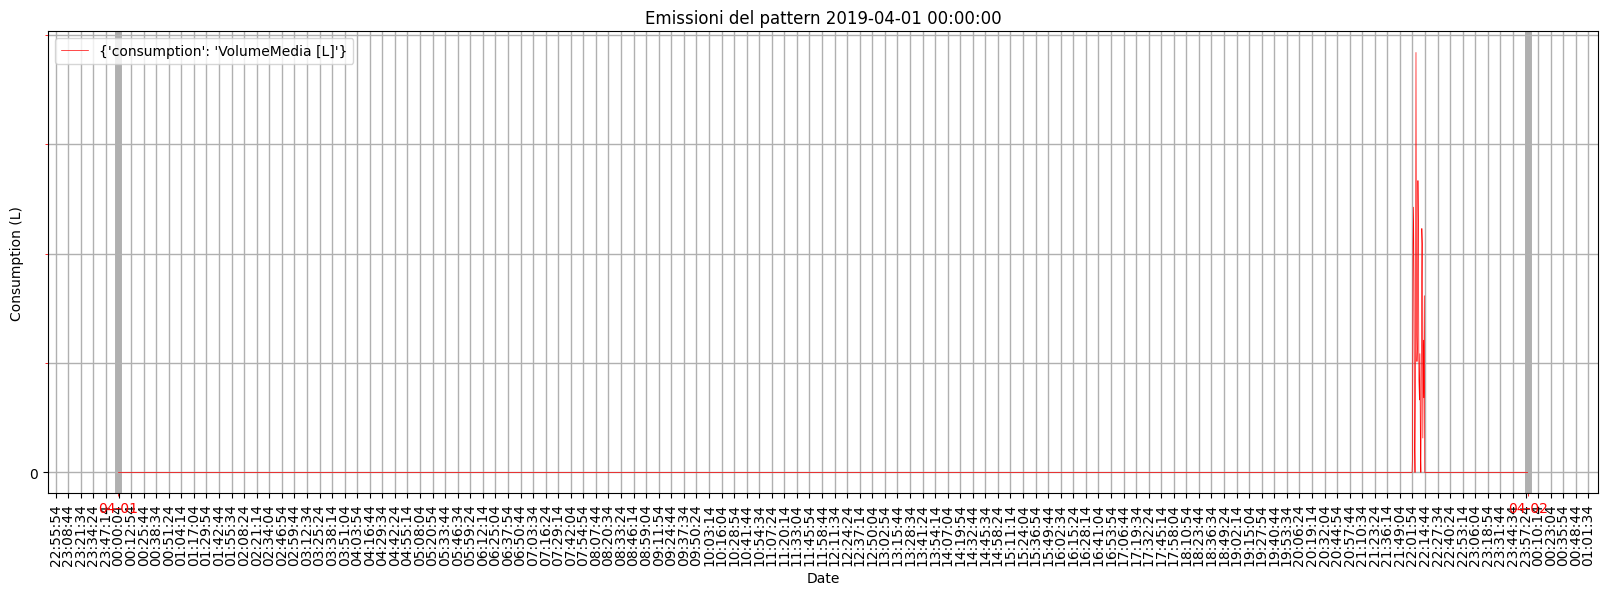

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2769.275 max2: 3602.8516483516482 max3: 2296.504143646409
max_value per questo pattern: 2296.504143646409
4 False
	emissione giornaliera: 410

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: P
spazi: []

intervallo: [[91]]
divisione dell'emissioni in intervalli: [410]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [410]

DATAFRAME  COSTRUITO
	intervallo finale: [[91]]
	divisione finale dell'emissioni in intervalli: [410]
	emissione totale giornaliera: 410
	picco di emissione giornaliera: 0.9666666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 19:27:50', freq='770S'), Timestamp('2019-04-01 19:40:40', freq='770S'), 1)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CAMALA1P_S0


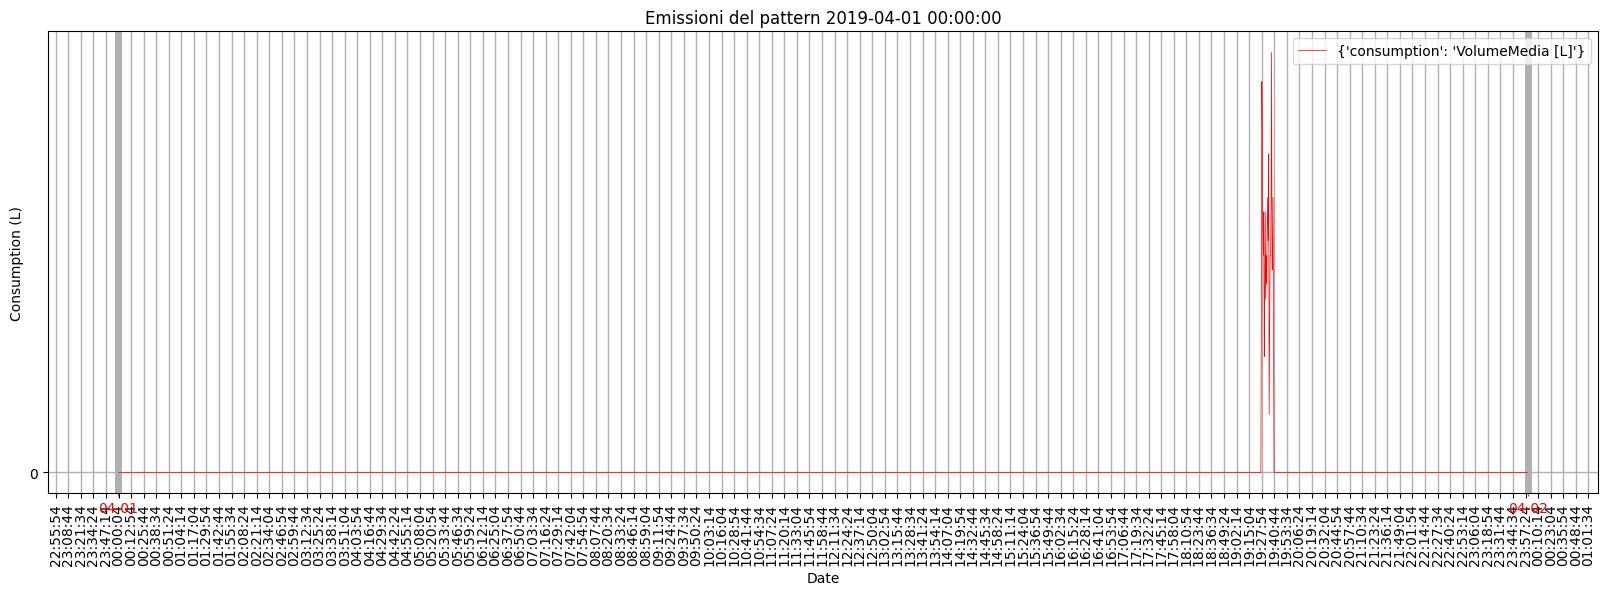

emissione giornaliera: 0

emissione giornaliera: 0

emissione giornaliera: 0

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 2
dove min1: 19384.925 min2: 18014.25824175824 min3: 16075.529005524862
min_value per questo pattern: 19384.925
dove max1: 33231.3 max2: 21617.10989010989 max3: 73488.13259668509
max_value per questo pattern: 21617.10989010989
4 False
	emissione giornaliera: 20485

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PP
spazi: ['L']

intervallo: [[45], [77]]
divisione dell'emissioni in intervalli: [17440, 3045]
non rispetta und_value
divisione dell'emissioni in intervalli: [1633, 18852]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [16411, 4074]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18998, 1487]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [117, 20368]
debug temp esmissioni 1
tentativo
tipo degli intervalli: PP
spazi: ['L']

intervallo: [[24], [108]]
divisio

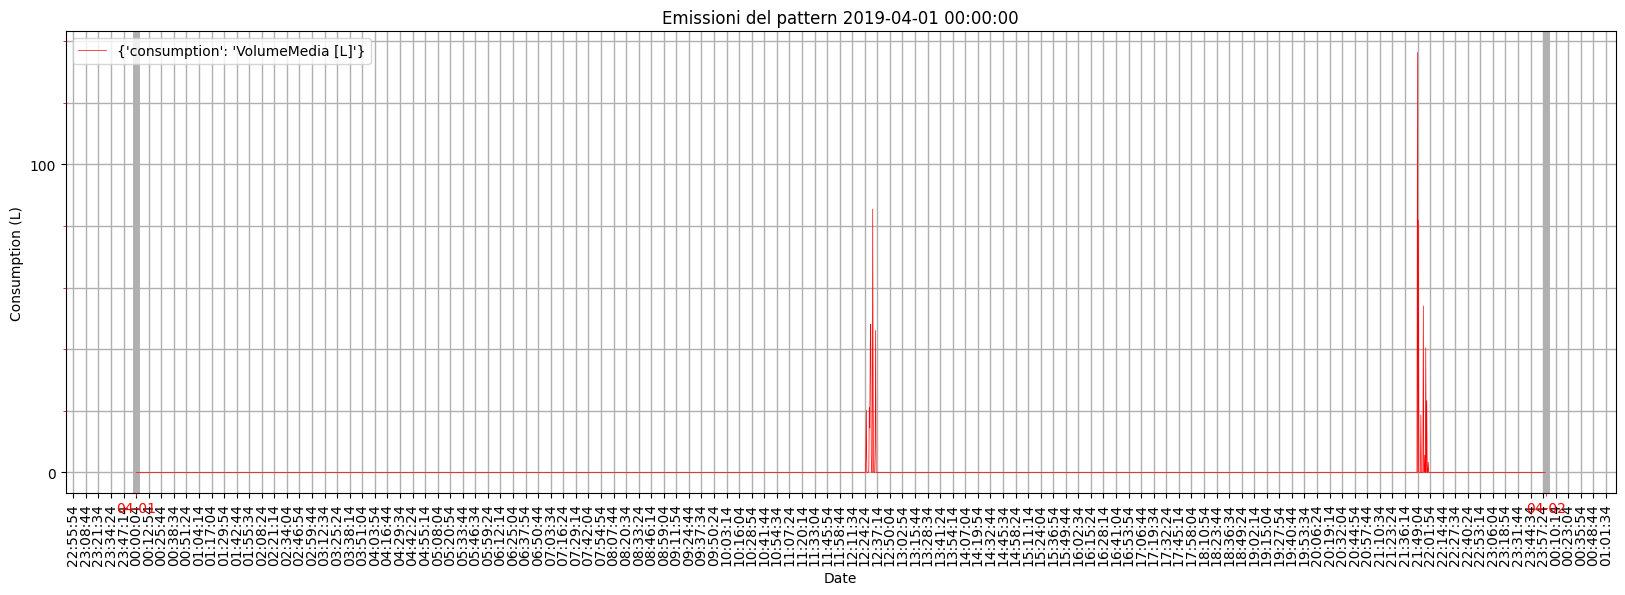

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 16615.65 min2: 14411.406593406593 min3: 16075.529005524862
min_value per questo pattern: 16615.65
dove max1: 19384.925 max2: 18014.25824175824 max3: 82674.14917127072
max_value per questo pattern: 18014.25824175824
4 False
	emissione giornaliera: 17452

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[80, 81]]
divisione dell'emissioni in intervalli: [[3099, 14353]]
non rispetta und_value
divisione dell'emissioni in intervalli: [[11378, 6074]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[3062, 14390]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[12699, 4753]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[2763, 14689]]
debug temp esmissioni 2
tentativo
tipo degli intervalli: M
spazi: []

intervallo: [[39, 40, 41]]
divisione dell'emissioni in intervalli: [[10419, 3174, 3859]]
non rispetta und_val

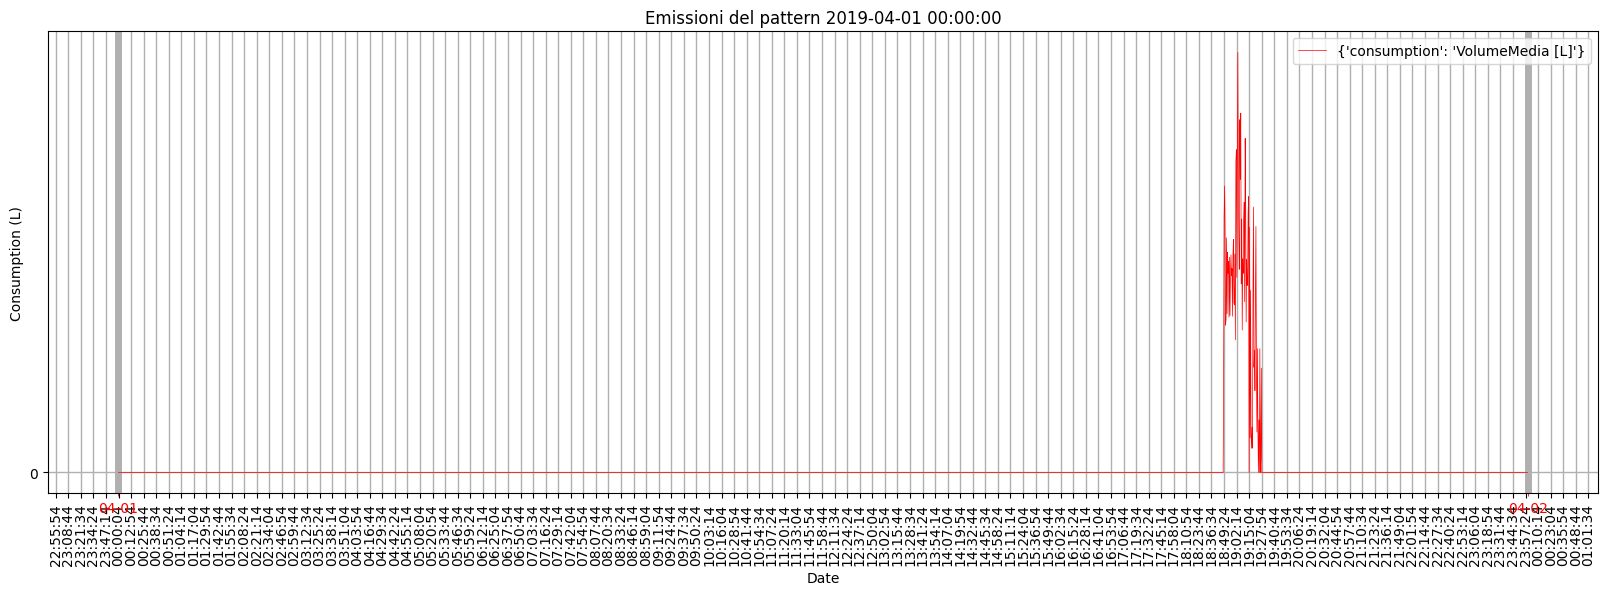

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 3
dove min1: 19384.925 min2: 25219.96153846154 min3: 16075.529005524862
min_value per questo pattern: 25219.96153846154
dove max1: 55385.5 max2: 43234.21978021978 max3: 27558.049723756907
max_value per questo pattern: 27558.049723756907
4 False
	emissione giornaliera: 26950

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PMP
spazi: ['L', 'L']

intervallo: [[47], [68, 69], [92]]
divisione dell'emissioni in intervalli: [16730, [4429, 1449], 4342]
non rispetta und_value
divisione dell'emissioni in intervalli: [529, [400, 1257], 24764]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [4150, [12299, 9387], 1114]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [22349, [47, 475], 4079]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1763, [5678, 1550], 17959]
debug temp esmissioni 1
tentativo
tipo degli intervalli: PMP
spazi: ['L', 'L']

intervallo: [

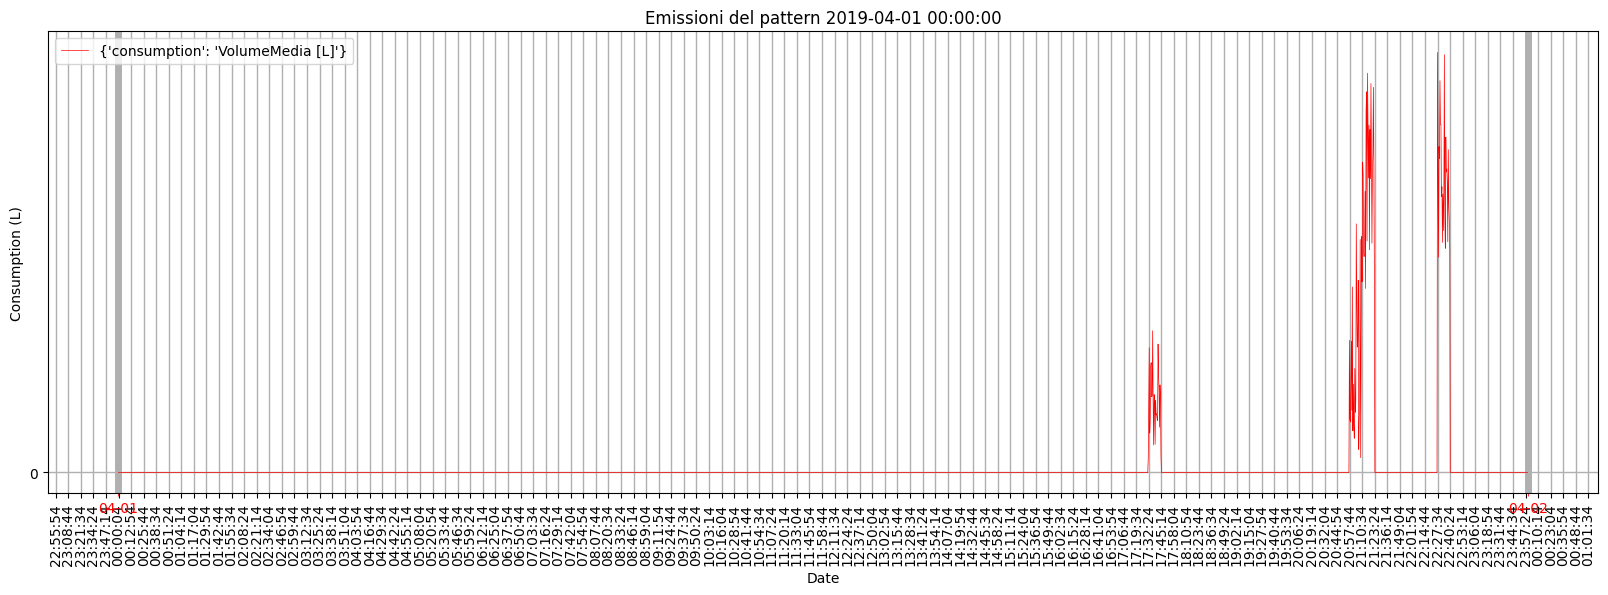

emissione giornaliera: 0

emissione giornaliera: 0

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 16615.65 min2: 18014.25824175824 min3: 16075.529005524862
min_value per questo pattern: 18014.25824175824
dove max1: 19384.925 max2: 21617.10989010989 max3: 27558.049723756907
max_value per questo pattern: 19384.925
4 False
	emissione giornaliera: 18428

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: P
spazi: []

intervallo: [[52]]
divisione dell'emissioni in intervalli: [18428]
non rispetta und_value
divisione dell'emissioni in intervalli: [18428]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18428]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18428]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18428]
tentativo
tipo degli intervalli: P
spazi: []

intervallo: [[45]]
divisione dell'emissioni in intervalli: [18428]

DATAFRAME  COSTRUITO
	intervallo finale: [[45]]
	divisio

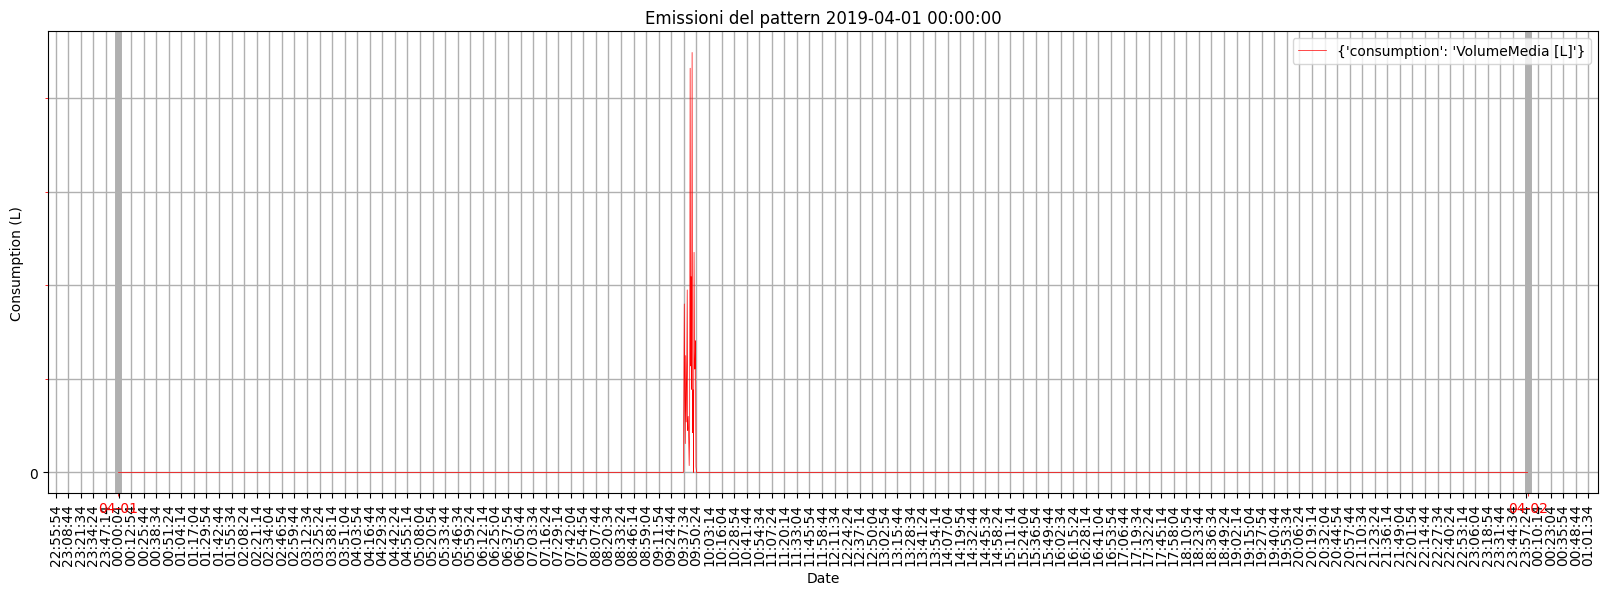

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 16615.65 min2: 18014.25824175824 min3: 16075.529005524862
min_value per questo pattern: 18014.25824175824
dove max1: 19384.925 max2: 21617.10989010989 max3: 27558.049723756907
max_value per questo pattern: 19384.925
4 False
	emissione giornaliera: 18410

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: P
spazi: []

intervallo: [[33]]
divisione dell'emissioni in intervalli: [18410]
non rispetta und_value
divisione dell'emissioni in intervalli: [18410]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18410]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18410]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18410]
debug temp esmissioni 1
tentativo
tipo degli intervalli: P
spazi: []

intervallo: [[19]]
divisione dell'emissioni in intervalli: [18410]
non rispetta und_value
divisione dell'emissioni in intervalli: [18410]
debug temp esm

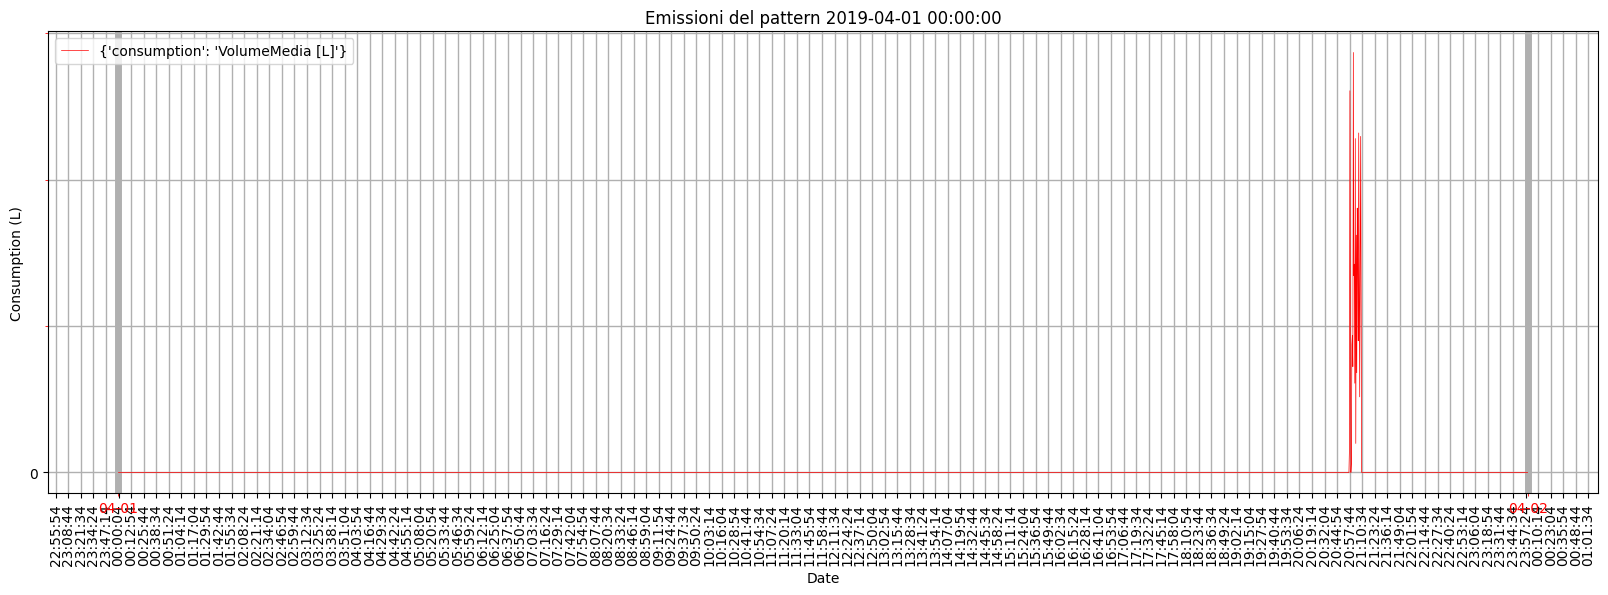

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 16615.65 min2: 18014.25824175824 min3: 16075.529005524862
min_value per questo pattern: 18014.25824175824
dove max1: 19384.925 max2: 21617.10989010989 max3: 45930.08287292818
max_value per questo pattern: 19384.925
4 False
	emissione giornaliera: 18676

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: P
spazi: []

intervallo: [[3]]
divisione dell'emissioni in intervalli: [18676]
non rispetta und_value
divisione dell'emissioni in intervalli: [18676]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18676]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18676]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [18676]
debug temp esmissioni 1
tentativo
tipo degli intervalli: P
spazi: []

intervallo: [[104]]
divisione dell'emissioni in intervalli: [18676]
non rispetta und_value
divisione dell'emissioni in intervalli: [18676]
non rispetta un

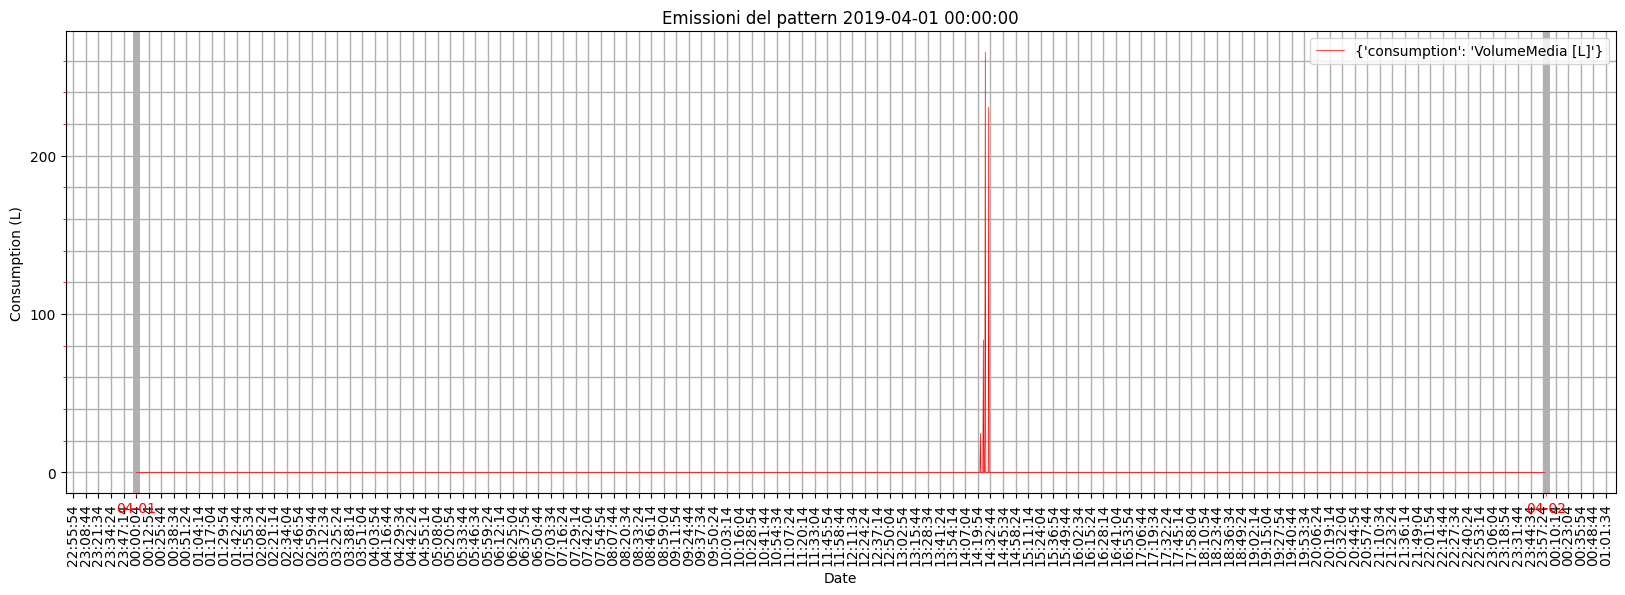

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 3
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2769.275 max2: 3602.8516483516482 max3: 2296.504143646409
max_value per questo pattern: 2296.504143646409
4 False
	emissione giornaliera: 1633

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PPP
spazi: ['L', 'L']

intervallo: [[1], [23], [30]]
divisione dell'emissioni in intervalli: [309, 714, 610]

DATAFRAME  COSTRUITO
	intervallo finale: [[1], [23], [30]]
	divisione finale dell'emissioni in intervalli: [309, 714, 610]
	emissione totale giornaliera: 1633
	picco di emissione giornaliera: 1.7

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 00:12:50', freq='770S'), Timestamp('2019-04-01 00:25:40', freq='770S'), 1), (Timestamp('2019-04-01 04:55:10', freq='770S'), Timestamp('2019-04-01 05:08:00', freq='770S'), 1), (Timestamp('2019-04-01 06:25:00', freq='770S'), Timestamp('2019-04-01 06:37:50', freq='770S'), 1)

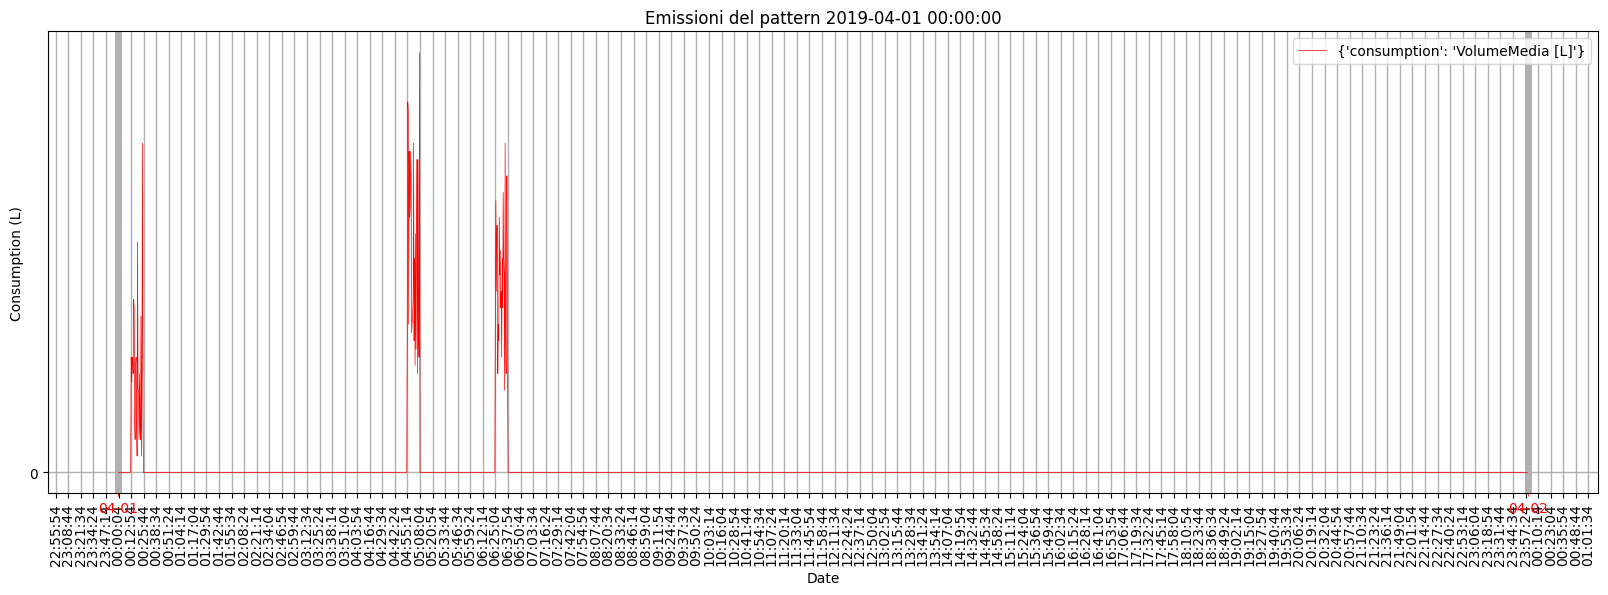

PATTERN ERRATI: 0


In [111]:
def funzione_main_shower(mm_array,mt_array,ms_array,ma, mese_input,giorno ,array_settimana):
    count=0
    for i in range(7): 
    #DIVISIONE DEL PATTERN
        daypattern=array_settimana[i] #da cambiare 0 con i
        max_emiss=0
        if daypattern!="0":
            print("ANALISI PATTERN INSERITO")
            #INTENSITA
            temp_pattern = daypattern[:6]
            #print(f"pattern_intensita: {temp_pattern}")
            
            indice = daypattern.index("_")#INDICE DEL CARATTERE
            #print(indice)

            temp_spazio_intervalli=daypattern[ (indice+1):] #numero spazi= numero interventi - 1
            print(f"\tspazio tra gli intervalli: {temp_spazio_intervalli}")#GRANDEZZA DEGLI SPAZI TRA GLI INTERVALLI
            
            #NUMERO INTERVALLI
            temp_intervalli = daypattern[6:indice]
            num_intervalli,temp_durata_intervalli=parti_numerica_e_non_numerica(temp_intervalli)
            print(f"\tnumero di intervalli: {num_intervalli}")

            #OTTENGO IL VALORE DELLE EMISSIONI IN QUEL GIORNO
            #mese e un possibile array
            if isinstance(mese_input, int):
                mese=mese_input
                day_emiss,x=max_emissione_shower(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)
            else:
                for mese in mese_input:
                    day_emiss,x=max_emissione_shower(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)  
                    print(mese,x) 
                    if x==False: 
                        break 
            
            #DEBUG
            print(f"\temissione giornaliera: {day_emiss}")
            
            print("\nCOSTRUZIONE DEL DATAFRAME...............")
            while True:
                if num_intervalli<4 :
                    print(f"tipo degli intervalli: {temp_durata_intervalli}")
                    intervallo=scegli_intervalli_minore(num_intervalli, temp_spazio_intervalli ,temp_durata_intervalli)
                else:
                    intervallo=scegli_intervalli(num_intervalli, temp_spazio_intervalli)
                
                print(f"intervallo: {intervallo}")

                #DIVISIONE DELLE EMISSIONI, CREAZIONE DEL DATAFRAME PER IL PLOT
                df,emissioni_finale=suddividi_emissioni(day_emiss,num_intervalli, intervallo,giorno,mese,ma)
                #print(f"Dataframe\n{df}")
                if isinstance(df, bool):
                    print("tentativo")
                    continue
                else:
                    break
            
            print("\nDATAFRAME  COSTRUITO")
            print(f"\tintervallo finale: {intervallo}")
            print(f"\tdivisione finale dell'emissioni in intervalli: {emissioni_finale}")
            print(f"\temissione totale giornaliera: {day_emiss}")
            #end 
            start_date = datetime(2019, mese, giorno, 0, 0, 0)
            df_max =df.resample('30S').mean()
            max_value = df_max['consumption'].max()
            print(f"\tpicco di emissione giornaliera: {max_value}")

            #PROVA DEL NOVE, CONTROLLA SE IL DATAFRAME RISPETTA IL PATTERN INSERITO 
            if (mese)<=3: mt=mt_array[0]
            elif (mese)<=6: mt=mt_array[1]
            elif (mese)<=9: mt=mt_array[2]
            else: mt=mt_array[3]

            if (mese)<=6: ms=ms_array[0]
            else: ms=ms_array[1]

            print("\nPROVA DEL NOVE")
            pattern_calcolato=scelta_pattern(df,day_emiss,mm_array[mese-1],mt,ms,1)
            if pattern_calcolato==daypattern:#tutto giusto
                print(f"\tpattern identici: {daypattern}")
            else:
                count+=1
                print(f"\tpattern_nostro: {daypattern}    pattern_calcolato: {pattern_calcolato}")
            grafico(df,max_value,start_date)      
        else:#caso di pattern '0' quindi non faccio i calcoli
            #DEBUG
            print(f"emissione giornaliera: {max_emiss}\n")
    return count

#MAIN PER SHOWER
df_dispositivo_emissioni=read_fixture('Shower')
mm_array=calcola_media_mensile(df_dispositivo_emissioni)
mt_array=calcola_media_trimestrale(df_dispositivo_emissioni)
ms_array=calcola_media_semestrale(df_dispositivo_emissioni)
ma=calcola_media_annuale(df_dispositivo_emissioni)

#PATTERN PER RIPRODURRE UNA SETTIMANA REALE
# 2019-04-22
#['0', 'CHMHLH3PMP_S0', 'CAMALA1P_S0', '0', 'CHMFLH2PP_S0', 'CAMALA3PPP_S0', 'CGMELH1M_S0']
#[0.0000e+00 3.2836e+04 1.3000e+01 0.0000e+00 2.0410e+04 1.5000e+01 1.7547e+04]

settprova=['0', 'CHMHLH3PMP_S0', 'CAMALA1P_S0', '0', 'CHMFLH2PP_S0', 'CAMALA3PPP_S0', 'CGMELH1M_S0']
meseprova=4
giornoprova=22

#2019-08-05
#['CHMFLH2MP_P1f', '0', '0', 'CAMALA1P_S0', '0', '0', '0']
#[18906.     0.     0.    56.     0.     0.     0.]

settprova2=['CHMFLH2MP_P1f', '0', '0', 'CAMALA1P_S0', '0', '0', '0']
meseprova2=8
giornoprova2=5

#2019-10-21
#['CAMALA1P_S0', 'CDMHLH2MP_S0', '0', 'CGMHLH1M_S0', 'CEMHLH1M_S0', 'CEMHLH3PPM_S0', 'CGMHLH3MMP_S0']
#[1.2000e+01 2.0944e+04 0.0000e+00 3.3935e+04 2.6811e+04 2.6605e+04 3.6633e+04]

settprova3=['CAMALA1P_S0', 'CDMHLH2MP_S0', '0', 'CGMHLH1M_S0', 'CEMHLH1M_S0', 'CEMHLH3PPM_S0', 'CGMHLH3MMP_S0']
meseprova3=10
giornoprova3=21

settgenerate=[
    #SETTIMANE GENERATE DA PERIODO1 
    ['CGMFLH1P_S0', 'CAMALA1P_S0', '0', '0', '0', 'CHMFLH2PP_S0', 'CGMELH1M_S0'],
    ['CHMHLH3PMP_S0', '0', '0', 'CGMFLH1P_S0', 'CGMFLH1P_S0', 'CGMFLH1P_S0', 'CAMALA3PPP_S0'],
    #SETTIMANE GENERATE DA PERIODO2 
    ['CHMFLG1P_S0', 'CAMALA1P_S0', '0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0', '0', 'CHMELF2PM_S0'],
    #SETTIMANE GENERATE DA PERIODO3
    ['0', '0', 'CAMALB1M_S0', 'CHMHLH3PMP_S0', 'CDMELF1M_S0', 'CFMGLH2PP_S0', 'CHMHLH1M_S0'],
    ['CCMCLD3PMP_S2a', 'CBMCLC1P_S0', 'CCMCLD3PMP_S2a', '0', 'CDMDLE1P_S0', 'CHMHLH3PMP_S0', 'CBMBLC1M_S0']
    ]
mesegenerate=[
    [4,5],
    [4,5],
    [8,9],
    [8,9],
    7,
    7
    ]
giornogenerate=[1,1]

count=0

for setty,messy,giorny in zip(settgenerate,mesegenerate,giornogenerate):
    count+=funzione_main_shower(mm_array,mt_array,ms_array,ma, messy,giorny ,setty)

#count+=funzione_main_shower(mm_array,mt_array,ms_array,ma, meseprova,giornoprova ,settprova)
#count+=funzione_main_shower(mm_array,mt_array,ms_array,ma, meseprova2,giornoprova2 ,settprova2)
#count+=funzione_main_shower(mm_array,mt_array,ms_array,ma, meseprova3,giornoprova3 ,settprova3)
print(f"PATTERN ERRATI: {count}")